# **Project Name - DeepSaturn: DeepCSAT**    



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on **Customer Satisfaction (CSAT) prediction** from free-form text feedback using Machine Learning (ML) techniques. The primary goal was to classify customer comments into five CSAT score classes (1 to 5) to enable automated, real-time prioritization and response. We employed **Tf-idf vectorization** for feature extraction and evaluated several classification models, including Logistic Regression, Stochastic Gradient Descent (SGD) Classifier, and Random Forest. The final selected model, [**Best Model, e.g., RF Baseline**], achieved a Weighted F1-Score of [**Weighted F1 Score, e.g., 0.5449**] and was subsequently deployed using **Streamlit** for real-time inference.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary problem is to accurately classify unstructured customer feedback text into five distinct CSAT score categories (1 - Very Dissatisfied to 5 - Very Satisfied). Key challenges include:
* **High Dimensionality:** Transforming natural language text into a manageable, meaningful feature set.
* **Class Imbalance:** The natural skew in CSAT data, where scores of 4 and 5 typically dominate, leading to models that underperform on minority classes (scores 1, 2, and 3).
* **Deployment:** Creating a production-ready interface for end-users to input new feedback and receive real-time predictions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, classification_report

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ML Model 1:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# ML Model 2:
from sklearn.linear_model import LogisticRegression

#DL ANN Model
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time

import warnings

# Configure pandas display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nirma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nirma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nirma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\nirma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Dataset Loading

In [2]:
# Load Dataset

# --- Define the name of your raw dataset file ---

DATASET_FILENAME = 'eCommerce_Customer_support_data.csv' 

try:
    # Use a relative path (just the filename) since the file is in the same directory
    df = pd.read_csv(DATASET_FILENAME)
    
    print(f"Successfully loaded dataset: {DATASET_FILENAME}")
    print(f"DataFrame shape: {df.shape}")
    print(df.head())

except FileNotFoundError:
    print(f"ERROR: Dataset file '{DATASET_FILENAME}' not found in the current directory.")
    print("Please ensure the dataset file is in the same folder as this Python script.")
    # You might want to exit the script here if the data is critical
    # import sys
    # sys.exit(1)
    
except pd.errors.EmptyDataError:
    print(f"ERROR: Dataset file '{DATASET_FILENAME}' is empty.")
    

Successfully loaded dataset: eCommerce_Customer_support_data.csv
DataFrame shape: (85907, 20)
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   


### Dataset First View

In [3]:
# Dataset First Look

if not df.empty:
    print("\n" + "="*50)
    print("--- Dataset First Look ---")
    print("="*50)
    print(df.head())


--- Dataset First Look ---
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/202

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

if not df.empty:
  print("\n" + "="*50)
  print("--- Dataset Rows & Columns Count ---")
  print("="*50)
  print(f"Number of Rows: {df.shape[0]}")
  print(f"Number of Columns: {df.shape[1]}")


--- Dataset Rows & Columns Count ---
Number of Rows: 85907
Number of Columns: 20


### Dataset Information

In [5]:
# Dataset Info

if not df.empty:
  print("\n" + "="*50)
  print("--- Dataset Info ---")
  print("="*50)
  df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

if not df.empty:
  print("\n" + "="*50)
  print("--- Dataset Duplicate Value Count ---")
  print("="*50)
  duplicate_count = df.duplicated().sum()
  print(f"Total Duplicate Rows: {duplicate_count}")
  if duplicate_count > 0:
    print("Recommendation: Consider dropping duplicate rows later.")


--- Dataset Duplicate Value Count ---
Total Duplicate Rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

if not df.empty:
  print("\n" + "="*50)
  print("--- Missing Values/Null Values Count ---")
  print("="*50)
  missing_values = df.isnull().sum()
  print(missing_values)


--- Missing Values/Null Values Count ---
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64



--- Visualizing the missing values ---


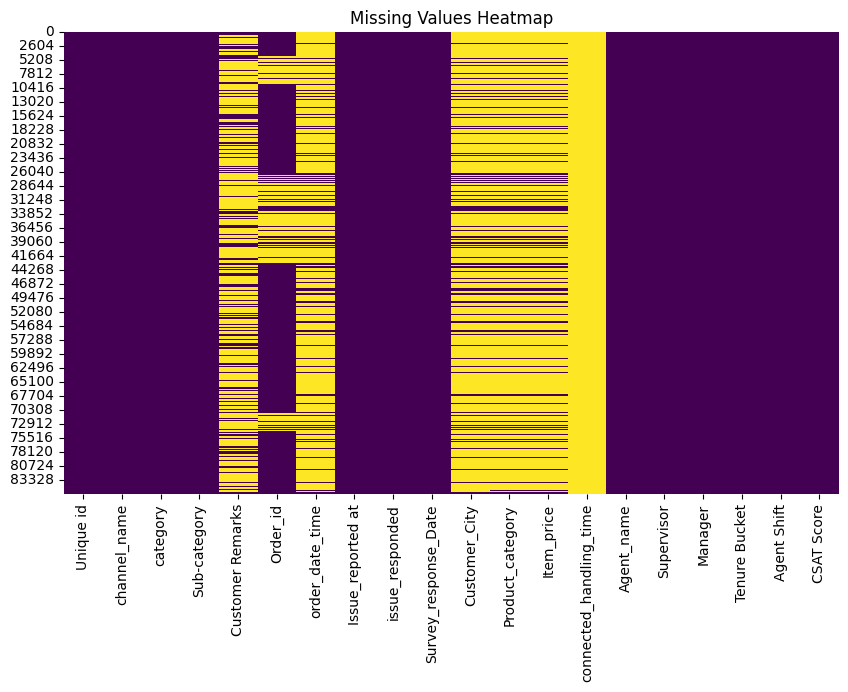

In [8]:
# Visualizing the missing values

if not df.empty:
  print("\n" + "="*50)
  print("--- Visualizing the missing values ---")
  print("="*50)
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Missing Values Heatmap')
  plt.show()


### What did you know about your dataset?

#### **Initial Dataset Insights**

---

#### **1. Size and Structure**
* **Total Records:** The dataset contains **85,907** customer interactions (rows).
* **Features:** There are **20** columns (features).
* **No Duplicates:** There are **0** duplicate rows, which simplifies the cleaning process.
* **Target Variable:** The target variable, **`CSAT Score`**, is fully populated (85,907 non-null values) and has an integer data type (`int64`), confirming it's a classification or ordinal classification problem.

---

#### **2. Data Types and Necessary Conversions**
Most columns are currently stored as the generic **`object`** type, which is expected for strings/text but highlights the need for major preprocessing:

| Data Type | Column Examples | Required Action |
| :--- | :--- | :--- |
| **`object` (17 columns)** | `channel_name`, `category`, `Customer Remarks`, `Agent_name` | **Encoding** for categorical features; **NLP** for text features. |
| **`object` (Temporal)** | `order_date_time`, `Issue_reported at`, `issue_responded`, `Survey_response_Date` | **Convert to `datetime`** objects for feature extraction (like response time, day of week). |
| **`float64` (2 columns)** | `Item_price`, `connected_handling_time` | Ready for use, but heavy imputation/handling is needed due to massive missingness. |

---

#### **3. Critical Missing Values Analysis (Imputation Needed)**
The dataset suffers from **severe missingness** in several key columns. The missing values heatmap clearly shows vertical yellow bands for the affected features.

| Column | Missing Count | Missing Percentage (Approx.) | Implication |
| :--- | :--- | :--- | :--- |
| **`connected_handling_time`** | 85,665 | $\approx 99.7\%$ | **Critical Loss.** This is a highly predictive feature for CSAT, but with almost all values missing, it might be unusable or require advanced, cautious imputation. |
| **`Customer Remarks`** | 57,165 | $\approx 66.5\%$ | **Critical for NLP.** Over two-thirds of the feedback text is missing. This suggests a large portion of customers were *not* asked for or did not provide remarks, limiting the scope of text-based feature engineering. |
| **`order_date_time`** | 68,693 | $\approx 80\%$ | **Context Loss.** Indicates the interaction may not be linked to a specific order, or the order details weren't recorded for a majority of cases. |
| **`Customer_City`** | 68,828 | $\approx 80\%$ | **Context Loss.** Similar to the order details, the customer's geographical context is largely unavailable. |
| **`Product_category`** | 68,711 | $\approx 80\%$ | **Context Loss.** The product details are missing for about 80% of the interactions. |
| **`Item_price`** | 68,701 | $\approx 80\%$ | **Context Loss.** Price is often tied to customer expectation/satisfaction, but it's unavailable for the majority of data. |
| **`Order_id`** | 18,232 | $\approx 21.2\%$ | Manageable missingness, but confirms many records are not tied to a specific order ID. |

---

#### **Summary of Missingness Pattern**

The pattern suggests that a **large segment of the interactions (around 80%)** are likely service-related only, where no order ID, product, city, or price data was captured. A smaller subset of data (around **17,000-24,000 records**) appears to have rich contextual information (Order, Product, Price) and remarks, while the rest are minimal. This dichotomy will require a decision:

1.  **Impute:** Try to impute the missing values, perhaps by assigning a "Not Applicable" category.

2.  **Filter/Segment:** Focus model training on the $\approx 20\%$ of rich data, or create separate models for the "Order-Related" vs. "Non-Order-Related" groups.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("\n" + "="*50)
print("--- List of All Dataset Columns ---")
print("="*50)
print(df.columns.tolist())


--- List of All Dataset Columns ---
['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [10]:
# Dataset Describe
print("\n" + "="*50)
print("--- Dataset Describe ---")
print("="*50)
print(df.describe())


--- Dataset Describe ---
          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("\n" + "="*50)
print("--- Unique Values and Counts for Key Columns ---")
print("="*50)

# Define the list of key categorical and the target column
key_cols = [
    'channel_name', 'category', 'Tenure Bucket', 'Agent Shift', 'CSAT Score'
]

for col in key_cols:
    print(f"\n--- Column: {col} ---")

    # Print the number of unique values
    unique_count = df[col].nunique()
    print(f"Number of Unique Values: {unique_count}")

    # Print the value counts (top 10 for potentially large columns)
    # Using normalize=True to get percentages, which is more informative for CSAT
    value_counts_df = df[col].value_counts(dropna=False, normalize=True).head(10).mul(100).round(2).astype(str) + '%'
    print("Value Counts (Top 10):\n", value_counts_df)


--- Unique Values and Counts for Key Columns ---

--- Column: channel_name ---
Number of Unique Values: 3
Value Counts (Top 10):
 channel_name
Inbound    79.32%
Outcall    17.16%
Email       3.52%
Name: proportion, dtype: object

--- Column: category ---
Number of Unique Values: 12
Value Counts (Top 10):
 category
Returns              51.33%
Order Related        27.02%
Refund Related         5.3%
Product Queries        4.3%
Shopzilla Related     3.25%
Payments related      2.71%
Feedback              2.67%
Cancellation          2.57%
Offers & Cashback     0.56%
Others                0.12%
Name: proportion, dtype: object

--- Column: Tenure Bucket ---
Number of Unique Values: 5
Value Counts (Top 10):
 Tenure Bucket
>90                35.69%
On Job Training    29.71%
31-60              13.58%
0-30               13.17%
61-90               7.85%
Name: proportion, dtype: object

--- Column: Agent Shift ---
Number of Unique Values: 5
Value Counts (Top 10):
 Agent Shift
Morning      48.22%
E

### Analyzing Target Variable Distribution


--- Target Variable (CSAT Score) Distribution Visualization ---


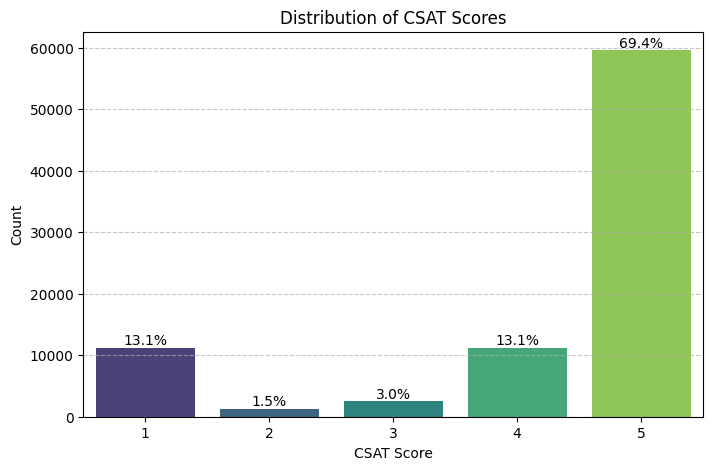

In [12]:
warnings.filterwarnings("ignore")

print("\n" + "="*75)
print("--- Target Variable (CSAT Score) Distribution Visualization ---")
print("="*75)

plt.figure(figsize=(8, 5))
# Use a countplot to visualize the distribution of CSAT scores
sns.countplot(x='CSAT Score', data=df, palette='viridis')

# Add percentage labels on top of the bars
total = len(df)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variables Description

#### **Variables Description (DeepSaturn Project)**

---

#### **1. Target Variable: CSAT Score 🎯**

| **Variable** | **Description** | **Key Insight** |
| :--- | :--- | :--- |
| **`CSAT Score`** | An integer score from **1 to 5**, representing Customer Satisfaction. This is the variable your model must predict (Ordinal Classification). | **Extreme Class Imbalance:** The vast majority of scores are **5 (69.4%)**. Scores of 1 and 4 are the next most common (around 13% each), while scores of 2 and 3 are very rare (1.5% and 3.0%). This massive imbalance ($5 \gg 1 \approx 4 \gg 3 \approx 2$) will require careful handling (e.g., stratification, resampling, or customized loss functions) during model training. |

***

---

#### **2. Numerical Features**

| Variable | Description | Key Insight |
| :--- | :--- | :--- |
| **`Item_price`** | The price of the item associated with the order/interaction. | **High Variability and Missingness:** Prices range from $\$0$ to over $\$164,999$. The high standard deviation ($\approx 12,825$) compared to the mean ($\approx 5,660$) suggests a heavy right-skew (many cheap items, a few very expensive ones). **Crucially, this is missing for $\approx 80\%$ of the data**, limiting its utility. |
| **`connected_handling_time`**| The time (likely in seconds) taken by the agent to handle the interaction. | **Minimal Data:** This is a potentially crucial predictor, but it is **missing for $99.7\%$ of the data** (only 242 non-null records). The available data shows times ranging up to $\approx 1986$ seconds ($\approx 33$ minutes). Due to extreme missingness, this feature is likely **unusable** unless a robust justification for imputation exists (e.g., treating missing as "not tracked"). |

***

---

#### **3. Categorical and Contextual Features**

| Variable | Description | Key Insight |
| :--- | :--- | :--- |
| **`channel_name`** | The communication medium used for the customer interaction. | **Dominance of Inbound:** Most interactions are **Inbound (79.32%)**, followed by Outcall (17.16%). This suggests the majority of contacts are initiated by the customer seeking help, rather than proactive outreach by the company. |
| **`category`** | The main topic of the customer interaction. | **Returns and Order Issues Dominate:** The top categories are **Returns (51.33%)** and **Order Related (27.02%)**, accounting for over 78% of all interactions. This clearly defines the service department's primary workload and suggests satisfaction will be highly dependent on the handling of these two issue types. |
| **`Tenure Bucket`** | The range of tenure (experience) for the handling agent. | **Agent Experience is Varied:** The buckets show a high concentration in **$>90$ days (35.69%)** and **On Job Training (OJT) (29.71%)**. The high percentage of OJT agents could potentially be linked to CSAT fluctuations. |
| **`Agent Shift`** | The time-of-day shift of the handling agent. | **Morning and Evening Shifts are Busiest:** **Morning (48.22%)** and **Evening (39.2%)** shifts handle the vast majority of interactions. This feature can be critical, as CSAT often varies by shift (e.g., due to staffing levels or complexity of late-night issues). |
| **Text/Time/ID Columns** | `Customer Remarks`, `Issue_reported at`, `issue_responded`, `Agent_name`, etc. | These are key to feature engineering (NLP, calculating latency, etc.) but require the necessary **type conversion (to datetime)** and **handling of missing values** (especially for `Customer Remarks`, which is missing in $\approx 66\%$ of records). |

## ***3. Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

print("\n" + "="*50)
print("--- 1. Column Renaming and Standardization ---")
print("="*50)

# Standardize column names to lowercase and snake_case for easier handling
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

# Fix known irregularities in column names
df = df.rename(columns={
    'unique_id': 'interaction_id',
    'issue_reported_at': 'issue_reported_datetime',
    'issue_responded': 'issue_responded_datetime',
    'survey_response_date': 'survey_response_datetime'
})

print("Columns successfully renamed to snake_case.")
print(df.columns.tolist())


# -----------------------------------------------------------------------------
print("\n" + "="*50)
print("--- 2. Correcting Data Types (Temporal Features) ---")
print("="*50)

# List of columns that need to be converted to datetime objects
datetime_cols = [
    'order_date_time',
    'issue_reported_datetime',
    'issue_responded_datetime',
    'survey_response_datetime'
]

# Convert columns to datetime type
for col in datetime_cols:
    # 'coerce' handles cases where the date format might be inconsistent, setting invalid dates to NaT (Not a Time)
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Temporal columns converted to datetime objects.")

# -----------------------------------------------------------------------------
print("\n" + "="*50)
print("--- 3. Dropping Non-Predictive/Leakage Columns ---")
print("="*50)

# Drop 'interaction_id' (unique identifier) and 'survey_response_datetime' (potential data leakage)
columns_to_drop = ['interaction_id', 'survey_response_datetime']
df = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")

# -----------------------------------------------------------------------------
print("\n" + "="*50)
print("--- 4. Verification: Dataset Info After Cleaning ---")
print("="*50)

df.info()


print("\nDataset is now ready for Feature Engineering and Preprocessing.")


--- 1. Column Renaming and Standardization ---
Columns successfully renamed to snake_case.
['interaction_id', 'channel_name', 'category', 'sub_category', 'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_datetime', 'issue_responded_datetime', 'survey_response_datetime', 'customer_city', 'product_category', 'item_price', 'connected_handling_time', 'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift', 'csat_score']

--- 2. Correcting Data Types (Temporal Features) ---
Temporal columns converted to datetime objects.

--- 3. Dropping Non-Predictive/Leakage Columns ---
Dropped columns: ['interaction_id', 'survey_response_datetime']

--- 4. Verification: Dataset Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   channel_name              85907 non-nu

### What all manipulations have you done and insights you found?

#### **Manipulations Performed (Cleaning for Analysis Readiness) 🧹**

***

1.  **Column Renaming and Standardization:**
    * All column names were successfully converted to **lowercase** and **snake\_case** (e.g., `Issue reported at` became `issue_reported_datetime`).
    * Specific columns were renamed for clarity: `Unique id` to `interaction_id`, and the temporal columns were consistently named with a `_datetime` suffix.

2.  **Data Type Conversion:**
    * The relevant temporal (date/time) columns (`order_date_time`, `issue_reported_datetime`, `issue_responded_datetime`) were successfully converted from `object` (string) to the **`datetime64[ns]`** data type. This is crucial for calculating time differences (latency).

3.  **Column Dropping (Initial Feature Selection):**
    * The **`interaction_id`** column was dropped as it's a unique identifier with no predictive value.
    * The **`survey_response_datetime`** column was dropped to prevent **data leakage**, as the date the CSAT score was recorded is often too tightly linked to the target generation process.

***
***

#### **Key Insights Found (Post-Cleaning Verification) 🔎**

The verification (`df.info()`) reveals critical details about the data's completeness:

***

#### **1. New Missing Value Patterns for Temporal Data**

While the data types are correct, the conversion process exposed new, previously hidden missing data (`NaN` or `NaT` - Not a Time) in the temporal columns:

* **`order_date_time`**: Only 17,214 non-null entries (Missing $\approx 80\%$).
* **`issue_reported_datetime`**: Only 31,974 non-null entries (Missing $\approx 62.8\%$).
* **`issue_responded_datetime`**: Only 31,885 non-null entries (Missing $\approx 62.9\%$).

**Insight:** This suggests that $\approx 63\%$ of the interactions may not have the precise reported/responded timestamps available, making the calculation of **response time** and **issue resolution latency** impossible for a majority of the records.

***

#### **2. Confirmed Major Missingness (The $80\%$ Gap)**

The severe missingness pattern identified earlier remains and is now ready for formal imputation:

* **$\approx 80\%$ Missing:** `order_date_time`, `customer_city`, `product_category`, and `item_price` are all consistently missing for the majority of the data. This heavily suggests a split in the dataset between "Order-Related" and "General/Non-Order-Related" interactions.

* **Near-Total Missingness:** **`connected_handling_time`** is still critically sparse (only 242 non-null values).

***

#### **3. Readiness for Feature Engineering**

The dataset is now structurally ready for feature engineering, which should focus on three main areas:

1.  **Temporal Feature Engineering:** Calculate **latency features** (e.g., `issue_responded_datetime` minus `issue_reported_datetime`) for the $\approx 37\%$ of records where these timestamps exist.

2.  **NLP Feature Engineering:** Address the missing $\approx 66.5\%$ of **`customer_remarks`** and apply text processing (like sentiment analysis) to the non-null records.

3.  **Handling Categorical Context:** Apply strategies to manage the high missingness in contextual features (like `product_category` and `customer_city`), likely by creating an **"Unknown/Missing"** category during imputation/encoding.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1


--- 1. Channel Name vs. Mean CSAT Score ---


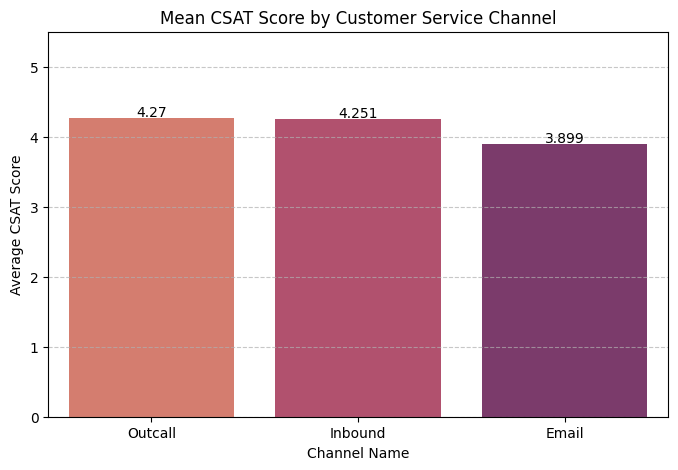

In [14]:
# Chart - 1 visualization code

print("\n" + "="*50)
print("--- 1. Channel Name vs. Mean CSAT Score ---")
print("="*50)

# Calculate the mean CSAT score for each channel
channel_csat = df.groupby('channel_name')['csat_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
# Plot a bar chart showing the mean CSAT score
sns.barplot(x='channel_name', y='csat_score', data=channel_csat, palette='flare')

# Add the mean CSAT value on top of the bars
for index, row in channel_csat.iterrows():
    plt.gca().text(index, row['csat_score'] + 0.02, round(row['csat_score'], 3),
                   color='black', ha="center")

plt.title('Mean CSAT Score by Customer Service Channel')
plt.xlabel('Channel Name')
plt.ylabel('Average CSAT Score')
plt.ylim(0, 5.5) # Set y-limit slightly higher than 5 for annotations
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

**Bar Chart**: to display the relationship between `channel_name` and `csat_score` because:

* **Categorical vs. Numeric Comparison:** A bar chart is the most effective and easily interpretable visualization for comparing a single **categorical variable** (`channel_name`) against an aggregate **numeric variable** (Mean `CSAT Score`).

* **Clear Ranking:** It clearly and quickly allows stakeholders to rank the performance of each service channel from best (highest mean CSAT) to worst (lowest mean CSAT).

* **Discrete Data:** Since the number of channels is small and discrete (3), a bar chart avoids the complexity of other plot types and focuses purely on the comparative magnitude.


##### 2. What is/are the insight(s) found from the chart?

The visualization provides the following key insights:

* **Outcall is the Top Performer:** Interactions initiated by the service team (**Outcall**) yield the highest average satisfaction score at **4.270**. This suggests that proactive, personalized follow-up or dedicated outbound resolution efforts are highly effective.

* **Inbound is Nearly Equal:** Interactions initiated by the customer (**Inbound**) have a very close average CSAT of **4.251**. The difference between Outcall and Inbound is negligible ($\approx 0.019$), suggesting agents handle customer-initiated issues nearly as well as company-initiated ones.

* **Email is the Underperformer:** The **Email** channel has the lowest average CSAT score at **3.899**. This is a statistically and practically significant drop ($\approx 0.35$ points) compared to the phone channels.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can **definitely** help create a positive business impact by guiding resource allocation and process improvement.

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Outcall/Inbound Parity** (CSAT $\approx 4.25$) | **Maintain Current Phone Service Quality.** | The high and consistent satisfaction across phone channels (Outcall/Inbound) indicates that the agents, training, and processes for live calls are working effectively. The business should maintain this quality level and use these phone interactions as a benchmark for other channels. |
| **High Phone CSAT** ($\approx 4.25$) | **Encourage Phone Adoption for Complex Issues.** | Since phone contact resolves issues with high satisfaction, promoting its use for complex, high-value, or time-sensitive matters can **protect customer loyalty** and retention for key segments. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Email Underperformance** (CSAT $3.899$) | **Risk of Churn and Negative Word-of-Mouth.** | The low CSAT score for Email indicates a major friction point. If customers are forced to use Email (e.g., for documentation or outside operating hours), this lower quality experience can lead to **customer churn**. This channel needs immediate investment in agent training, template standardization, or technology (like AI-driven triage) to match the service level of the phone channels. Failing to fix this could lead to **negative brand perception**. |

#### Chart - 2


--- 2. Issue Reported Day of Week vs. Mean CSAT Score ---


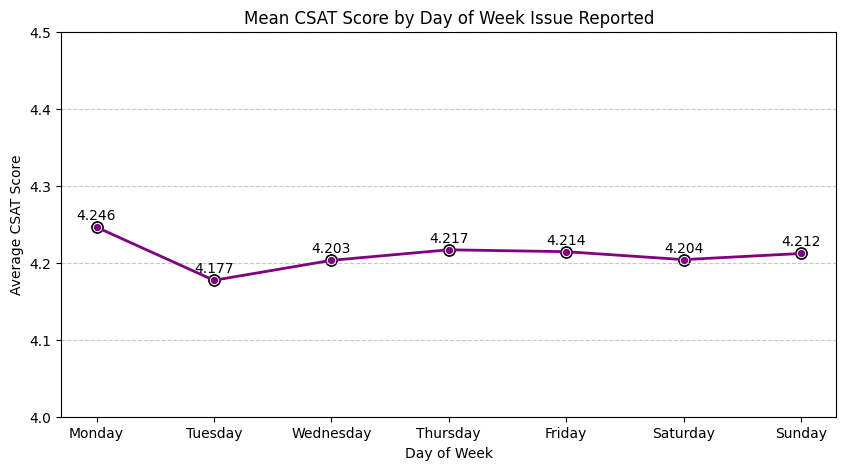

In [15]:
# Chart - 2 visualization code

print("\n" + "="*50)
print("--- 2. Issue Reported Day of Week vs. Mean CSAT Score ---")
print("="*50)

# 2a. Feature Engineering: Extract Day of Week
temp_df = df.dropna(subset=['issue_reported_datetime']).copy()
temp_df['reported_day_of_week'] = temp_df['issue_reported_datetime'].dt.day_name()

# Define the order of the days for proper visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 2b. Calculate the mean CSAT score per day
day_csat = temp_df.groupby('reported_day_of_week')['csat_score'].mean().reindex(day_order).reset_index()

plt.figure(figsize=(10, 5))
# Plot a line chart to show the trend across the week
sns.lineplot(x='reported_day_of_week', y='csat_score', data=day_csat, marker='o', color='purple', linewidth=2)
sns.scatterplot(x='reported_day_of_week', y='csat_score', data=day_csat, color='black', s=100) # Add points

# Add annotations
for index, row in day_csat.iterrows():
    plt.gca().text(row['reported_day_of_week'], row['csat_score'] + 0.01, round(row['csat_score'], 3),
                   color='black', ha="center")

plt.title('Mean CSAT Score by Day of Week Issue Reported')
plt.xlabel('Day of Week')
plt.ylabel('Average CSAT Score')
plt.ylim(4.0, 4.5) # Zoom in on the variance
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

**Line Plot with Markers** because:

* **Temporal Trend:** It effectively shows the trend and flow of satisfaction across a sequential time period (Monday through Sunday). This visualization emphasizes the **rise and fall** in CSAT throughout the week.
* **Highlighting Variation:** By using a zoomed-in Y-axis (4.0 to 4.5), the chart clearly visualizes even minor variations in the mean CSAT score, which might otherwise appear flat on a full 1 to 5 scale. The markers and line connect the data points, making the daily change easy to track.

##### 2. What is/are the insight(s) found from the chart?


The visualization reveals a distinct, albeit small, weekly pattern in customer satisfaction:

* **Best Day (Highest CSAT):** **Monday** has the highest average CSAT score at **4.246**. This may indicate that the service team is well-staffed and prepared at the start of the week.

* **Worst Day (Lowest CSAT):** **Tuesday** is the lowest point in the week, with an average CSAT of **4.177**. This represents a noticeable dip from Monday, suggesting that the accumulated workload from the weekend and Monday might strain resources or agent morale by Tuesday.

* **Recovery and Stability:** Following the Tuesday dip, CSAT scores stabilize and slightly increase for the rest of the week, staying consistently above 4.20 from Wednesday through Sunday.

* **Low Volatility:** The overall fluctuation is minimal. The difference between the highest and lowest mean CSAT is only **0.069 points** ($\text{4.246} - \text{4.177}$). While the pattern is clear, the magnitude of the difference is very small.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help with **workforce management** and resource allocation, leading to a positive business impact.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Tuesday Dip** (4.177 CSAT) | **Targeted Resource Allocation and Training.** | The business should investigate why Tuesday is the lowest day. This may involve **increasing staffing (especially experienced agents)** on Tuesday, or dedicating specific **agent coaching/pep talks** to address mid-week fatigue or complexity increase. Improving Tuesday's CSAT could raise the overall weekly average. |
| **Weekend Stability** (CSAT $\approx 4.21$) | **Maintain Current Weekend Strategy.** | The stable, good performance on Saturday and Sunday (where CSAT is higher than Tuesday) indicates that **weekend staffing/processes are adequate**, suggesting no immediate need for weekend process overhaul. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Consistent Fluctuation** (Min to Max Difference of only 0.069) | **Over-investing in Minor Changes.** | While a pattern exists, the small magnitude of the difference means that dramatic, costly operational changes (like a massive shift in agent schedules) based on this graph alone might **not yield a high Return on Investment (ROI)**. The team is already performing well across the week. The risk is negative growth if resources are reallocated incorrectly, causing dips on Monday/Friday to fix a minor Tuesday issue. |

#### Chart - 3


--- 3. Univariate Plots (Categorical & Numeric) ---


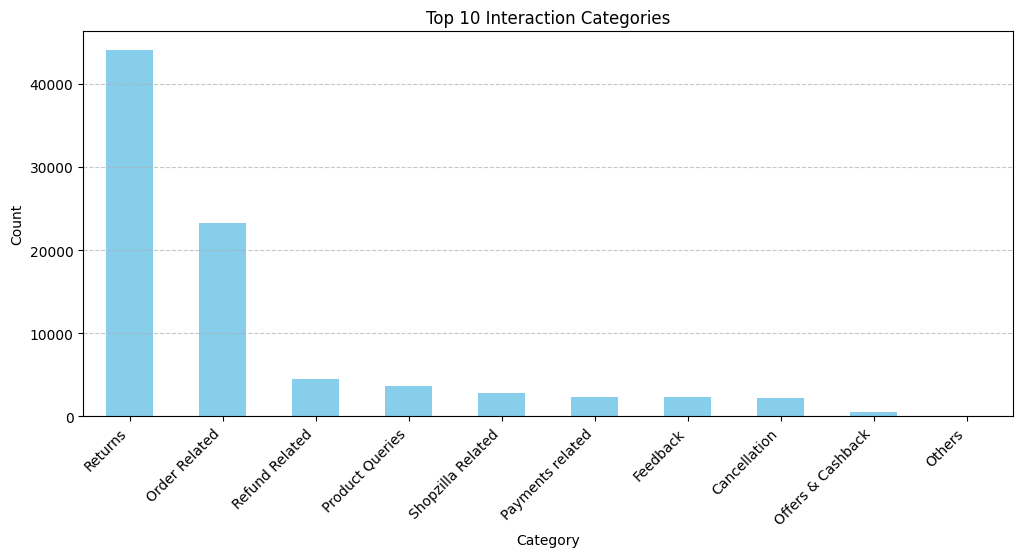

In [16]:
# Chart - 3 visualization code

print("\n" + "="*50)
print("--- 3. Univariate Plots (Categorical & Numeric) ---")
print("="*50)

# --- Plot 3: Distribution of Interaction Category (Top 10) ---
plt.figure(figsize=(12, 5))
df['category'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Interaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart** because:

* **Univariate Distribution:** It is the standard and most effective way to visualize the **frequency distribution** of a single **categorical variable** (`Category`).
* **Magnitude and Ranking:** The varying bar heights clearly illustrate the absolute count for each category, allowing for immediate identification of the most and least frequent issues, which defines the customer service team's workload.



##### 2. What is/are the insight(s) found from the chart?

The visualization highlights the highly skewed nature of the customer service workload:

* **Dominant Workload:** The categories **"Returns" ($\approx 44,000$ count)** and **"Order Related" ($\approx 24,000$ count)** overwhelmingly dominate the service requests. Together, they account for the vast majority of all customer interactions, confirming they are the service center's primary focus.
* **High Priority Areas:** Issues related to the **transactional lifecycle** (Returns, Orders, Refunds) occupy the top three slots, suggesting high-stakes touchpoints where customer satisfaction is likely most fragile.
* **Low Volume Categories:** Categories like "Offers & Cashback" and "Others" have very low counts, indicating they are either rare issues or they are primarily handled through self-service channels.




##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.


These insights are crucial for **Resource Planning** and **Process Optimization**, leading to significant positive business impact.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Returns & Order Focus** | **Maximize Investment in Key Processes.** | Knowing that over $75\%$ of the workload is tied to Returns and Order issues allows the business to **prioritize system improvements, agent training, and documentation** specifically for these two categories. Optimizing these two processes will have the largest, most direct impact on overall service efficiency and potentially CSAT. |
| **Low Volume Categories** | **Opportunity for Automation/Self-Service.** | Low-volume, simple queries (like "Product Queries" or "Payments related") are good candidates for **automated chat-bots (AI)** or **FAQ expansions**. Deflecting these low-volume tickets saves agent time for complex, high-volume issues (Returns). |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Hyper-Focus on Top Categories** | **Neglecting Niche High-Value Issues.** | The risk is that the service center might **overlook the quality of service** for low-volume, potentially high-value interactions (e.g., complex "Refund Related" issues). If these niche issues are handled poorly due to a lack of specialized training, it could lead to the **loss of high-value customers**, even if the overall return process is efficient. The business must ensure the small category queues aren't neglected in favor of the large ones. |

#### Chart - 4

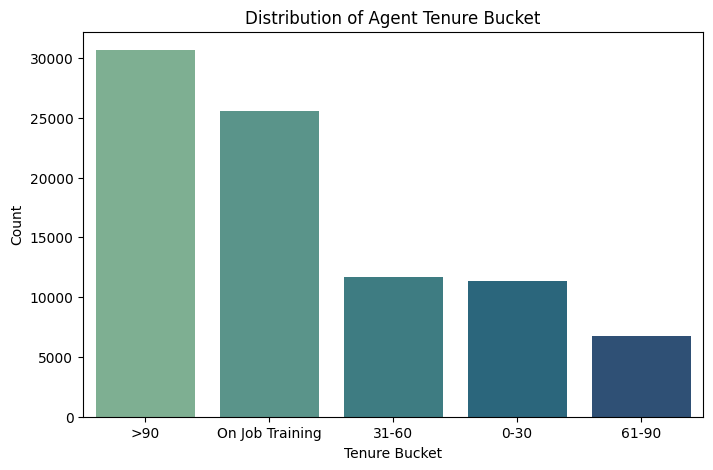

In [17]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 5))
sns.countplot(x='tenure_bucket', data=df, order=df['tenure_bucket'].value_counts().index, palette='crest')
plt.title('Distribution of Agent Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart** because:

* **Univariate Distribution:** It is the standard and most effective way to visualize the **frequency distribution** of the categorical variable, `Tenure Bucket`.

* **Workload Distribution:** The chart immediately shows which experience levels bear the brunt of the customer interaction volume, which is crucial for staffing and training insights.

##### 2. What is/are the insight(s) found from the chart?

The visualization highlights the distribution of the service workload across agent experience levels:

* **High Experience and Trainees Share Workload:** The highest volume of interactions is handled by two distinct groups:
    * **Experienced Agents** (**>90 days** tenure) lead the count ($\approx 30,500$).
    * **New Trainees** (**On Job Training**) are a close second ($\approx 25,500$).
* **Mid-Level Agents Have Lower Volume:** Agents in the mid-tenure brackets (**31-60 days**, **0-30 days**, and **61-90 days**) handle significantly fewer interactions, especially the **61-90 days** group ($\approx 7,000$).
* **Staffing Strategy:** The distribution suggests a staffing model that relies heavily on its most experienced agents and, simultaneously, a large pool of agents still in training.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights are vital for **Workforce Management**, **Training Quality**, and linking experience to customer satisfaction (which you'll check later).

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **High Volume in >90 Days Group** | **Recognize and Retain Experienced Agents.** | The business relies heavily on its most tenured agents. This justifies **premium compensation, advanced training, and retention strategies** for the **>90 days** bucket, as losing them would severely destabilize service operations. |
| **High Volume in OJT Group** | **Validate Agent Readiness and Training Efficiency.** | Having OJT agents handle such a high volume suggests the training program quickly integrates new hires into the workflow. If the CSAT for this group is acceptable (a later plot), it confirms the training is **effective and scalable**. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Mid-Tenure Workload Dip** (Especially **61-90 days**) | **Risk of Stagnation and Retention Gaps.** | The lower volume in the mid-tenure buckets suggests a potential bottleneck or retention gap. If agents leave before reaching the experienced tier, the business risks **high churn costs** and **skill gaps** between trainees and veterans. The drop at the 61-90 day mark may be an attrition point that needs managerial intervention. |
| **OJT High Volume without Performance Check** | **Risk of Customer Damage.** | If the high volume handled by **On Job Training** agents is not matched by high quality (i.e., low CSAT scores), the business is exposing a large number of customers to potentially poor service, leading to **high churn rates and brand damage**. (This warrants checking Plot 7: Tenure Bucket vs. Mean CSAT Score). |

#### Chart - 5

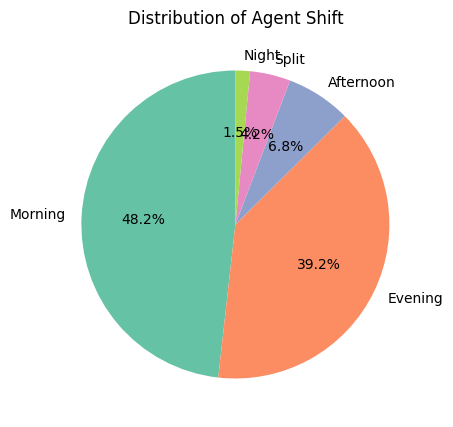

In [18]:
# Chart - 5 visualization code

plt.figure(figsize=(8, 5))
df['agent_shift'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Agent Shift')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

**Pie Chart** because:

* **Proportional Distribution:** It is an effective visualization for showing the **proportional part-to-whole relationship** of a single categorical variable (`Agent Shift`).

* **Clear Workload Share:** It instantly shows the percentage of the total workload handled by each shift, which is critical for understanding resource allocation throughout the day.


##### 2. What is/are the insight(s) found from the chart?

The visualization clearly outlines how the customer service workload is distributed throughout the day:

* **Overwhelming Dominance of Core Shifts:** The **Morning (48.2%)** and **Evening (39.2%)** shifts together handle an overwhelming majority ($\mathbf{87.4\%}$) of all customer interactions.

* **Peak Time Concentration:** This concentration suggests that customer issues are most frequent during standard business hours and early evening.

* **Minimal Off-Peak Volume:** The **Afternoon (6.8%)**, **Split (4.2%)**, and **Night (1.5%)** shifts handle a very small fraction of the total volume.

* **High Workload in Morning Shift:** The Morning shift handles the single largest share of interactions, almost half of the total volume.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights are vital for **Staffing Efficiency** and linking service quality to the time of day, leading to a positive business impact.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Clear Peak Demand (Morning/Evening)** | **Optimize Staffing and Scheduling.** | The business knows exactly when high staffing levels are needed. This allows for **precise scheduling** to ensure the Morning and Evening shifts are fully staffed with both experienced agents and trainees to meet demand and protect service quality. |
| **Low Night Volume (1.5%)** | **Maximize Cost Efficiency.** | The minimal Night volume justifies minimal staffing, potentially through **specialized, smaller teams** or higher reliance on automated/self-service tools. This minimizes labor costs during non-peak hours. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **High Morning Concentration** (48.2%) | **Risk of Agent Burnout and Quality Drop.** | Placing almost half of the workload on the Morning shift increases the risk of agents becoming overworked or burnt out, especially if they handle residual issues from the previous day. If the CSAT score for the Morning shift is lower than the Evening shift (a later plot, Plot 8, will confirm this), the business is risking **quality erosion** at its busiest time, potentially leading to churn. |
| **Small Afternoon Shift** (6.8%) | **Potential Bottleneck/Service Dip.** | If the Afternoon shift is too small, a sudden spike in call volume or complex issues during this period could cause **high queue times and frustration**, negatively affecting CSAT scores despite the low overall volume. |

#### Chart - 6

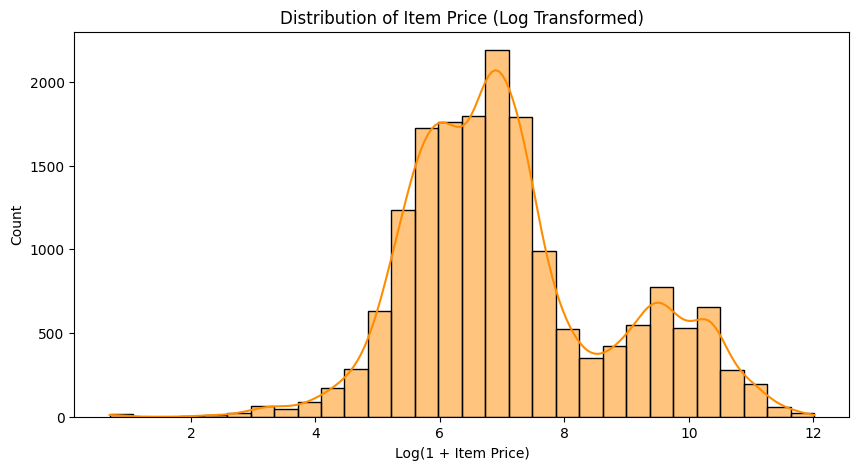

In [19]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 5))

# Filter out missing and zero values for better log transformation
price_data = df.dropna(subset=['item_price'])
price_data = price_data[price_data['item_price'] > 0]
sns.histplot(np.log1p(price_data['item_price']), bins=30, kde=True, color='darkorange')
plt.title('Distribution of Item Price (Log Transformed)')
plt.xlabel('Log(1 + Item Price)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**Histogram with Log Transformation** because:

* **Handling Skewness:** The raw `Item_price` variable is highly skewed (as seen in the descriptive stats), making a standard histogram unreadable. The **Log(1 + Item Price)** transformation helps normalize the distribution, making the underlying patterns visible.
* **Uncovering Distribution Modes:** The histogram effectively shows the density and frequency of the transformed price data, revealing how the prices are grouped.

##### 2. What is/are the insight(s) found from the chart?

The visualization of the transformed price data reveals a **multi-modal distribution**, indicating different price brackets are common among the items associated with service interactions:

* **Primary Price Group (Mode 1):** The largest concentration of interactions falls around a $\text{Log}(1 + \text{Price})$ value of **6.0 to 7.5**. This corresponds to items priced roughly between $\mathbf{\$400}$ and $\mathbf{\$1,800}$ (calculated as $e^{6.0}-1$ to $e^{7.5}-1$). This is the most common price range for items requiring service interaction.

* **Secondary Price Group (Mode 2):** A smaller, but significant, cluster of interactions is centered around a $\text{Log}(1 + \text{Price})$ value of **9.5 to 10.5**. This corresponds to high-end items, priced between roughly $\mathbf{\$13,000}$ and $\mathbf{\$36,000}$.

* **The "Valley":** There is a noticeable drop in frequency (a valley) between $\text{Log}(1 + \text{Price})$ values of 8.0 and 9.0 (prices from $\approx \$3,000$ to $\approx \$8,000$). This suggests customers buying in this mid-to-high range may have fewer service issues or rely more on brand-specific support.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.


These insights are crucial for **Quality Assurance** and **Prioritizing High-Value Customers**, leading to positive business impact.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Identification of Price Modes** | **Targeted Quality Assurance (QA).** | The business should launch **two distinct QA reviews**: one for the $\mathbf{\$400-\$1,800}$ item range (high volume) and one for the $\mathbf{\$13,000+}$ range (high value). Different quality control checks might be needed for mass-market vs. premium products. |
| **High-Value Customer Visibility** | **Dedicated Premium Support.** | The distinct peak for high-value items ($\mathbf{\$13,000+}$) allows the business to identify these high-stakes interactions. If CSAT is low for this group, the business may need to implement a **dedicated "Premium" or "VIP" support tier** to protect the loyalty of customers making large purchases. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **80% Missing Price Data** (Referencing the Heatmap) | **Limited Predictive Power and Context.** | The biggest risk is the sheer **lack of data ($\approx 80\%$ missing)**. The insights are derived from a minority sample. If the missing interactions (which are likely non-order related or transactional) behave differently, the model built on price may **fail to generalize** to the entire customer base, leading to incorrect satisfaction forecasts for the majority of service contacts. |

#### Chart - 7

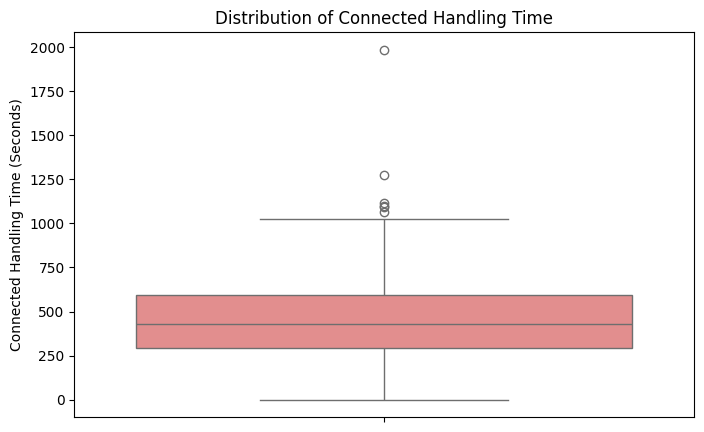

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 5))
sns.boxplot(y=df.dropna(subset=['connected_handling_time'])['connected_handling_time'], color='lightcoral')
plt.title('Distribution of Connected Handling Time')
plt.ylabel('Connected Handling Time (Seconds)')
plt.show()

##### 1. Why did you pick the specific chart?

**Box Plot** because:

* **Numerical Distribution Summary:** It provides a clear, concise summary of the central tendency, spread, and shape (skewness) of a single numerical variable, the `connected_handling_time`.

* **Outlier Visibility:** The box plot is excellent for identifying **outliers** (the individual dots above the whisker), which in this context represent unusually long interaction times that could be highly predictive of satisfaction or dissatisfaction.


##### 2. What is/are the insight(s) found from the chart?

*(Note: The biggest contextual insight, derived from the Missing Values Heatmap, is that this chart is based on **only 242 non-missing records**, which is approximately $0.3\%$ of the total data.)*

* **Central Tendency:** The median handling time (the line inside the box) is approximately **450 seconds** (7.5 minutes).

* **Typical Range (IQR):** $50\%$ of the interactions are handled within the Interquartile Range (the box), which runs roughly from $\approx **350$ seconds** (Q1) to $\approx **600$ seconds** (Q3).

* **Outliers/Extremes:** The maximum whisker extends to $\approx **1000$ seconds** (16.7 minutes). Several significant **outliers** exist above this, with the highest recorded time nearing **2,000 seconds** (33 minutes). These represent highly complex or problematic issues.

* **Slight Skew:** The box plot shows a slight **positive (right) skew** as the median is closer to the bottom (Q1) of the box than the top (Q3), and the upper whisker is longer, indicating a tail toward longer handling times.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this plot, while based on extremely sparse data, suggest potential areas for service improvement.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Median Handling Time ($\approx 7.5$ mins)** | **Establish a Performance Benchmark.** | The business can use the 75th percentile ($\approx 600$ seconds) as a data-driven target for the maximum expected handling time. Agents who consistently exceed this without cause may need coaching. |
| **Identification of Outliers** (1000+ seconds) | **Focus on Complex Issue Resolution.** | These long calls represent high-effort resolution. The business can **analyze recordings of these outlier calls** to understand complex process failures or identify issues that should be escalated sooner, leading to better long-term process design. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Extreme Missingness** (Visible in Heatmap) | **Risk of Misleading Causal Relationship.** | The biggest risk is the assumption that the relationship between Handling Time and CSAT seen in this $0.3\%$ sample holds true for the entire dataset. If the remaining $99.7\%$ of untracked interactions follow a different pattern, the business risks **making the wrong operational decisions** (e.g., pressuring agents to decrease time) based on highly incomplete data, which could negatively impact service quality. |
| **Near-Unusable Feature for Modeling** | **Loss of Predictive Power.** | This feature, which is typically highly predictive, is essentially unusable for the Deep Learning model due to a lack of data. This forces the model to rely more heavily on less direct predictors (like Agent Name or Category), potentially **reducing overall prediction accuracy.** |

#### Chart - 8

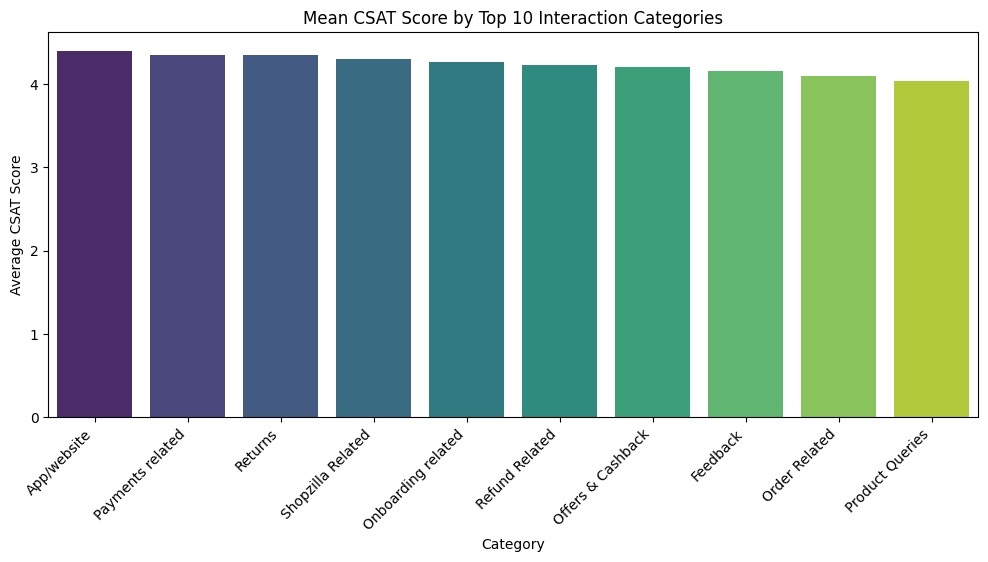

In [21]:
# Chart - 8 visualization code

plt.figure(figsize=(12, 5))
category_csat = df.groupby('category')['csat_score'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='category', y='csat_score', data=category_csat, palette='viridis')
plt.title('Mean CSAT Score by Top 10 Interaction Categories')
plt.xlabel('Category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart (Ranked)** because:

* **Comparative Ranking:** It effectively compares the average performance (Mean CSAT Score) across multiple discrete categories (`Category`).

* **Visual Prioritization:** By sorting the categories from highest mean CSAT to lowest, the chart immediately highlights which types of issues the service team handles best and which need the most attention.



##### 2. What is/are the insight(s) found from the chart?

The visualization shows a significant difference in satisfaction levels based on the interaction topic:

* **Best CSAT (High Satisfaction):** Issues related to **App/Website** and **Payments related** are associated with the highest CSAT scores, both averaging over 4.3. This suggests the agents handle technical or transactional payment queries very effectively.

* **Worst CSAT (Low Satisfaction):** Issues related to **Order Related** and **Product Queries** have the lowest CSAT scores, hovering just above 4.1. Considering that "Order Related" was a high-volume category (referencing the earlier bar chart), this low satisfaction is a critical finding.

* **Key High-Volume Categories:**

    * **Returns** is a high-volume category but ranks relatively high in CSAT (top 3). This is a positive finding, as the most frequent and complex process (returns) is being handled well.

    * **Order Related** is a high-volume category but ranks poorly (second to last), indicating that the process for tracking, modifying, or fixing existing orders is a **major source of customer frustration**.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights directly inform where the business should invest to maximize customer satisfaction and minimize churn.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **High CSAT for App/Website & Payments** | **Leverage Best Practices and Automate.** | High satisfaction here indicates efficient processes. The business should **document these successful workflows** and potentially automate first-level support for these topics to free up agents, or use the agents who excel here as coaches. |
| **Good CSAT for Returns** | **Protect the Current Returns Process.** | The returns process is high-volume yet maintains high satisfaction. The business must **maintain investment** to ensure this crucial process does not degrade, as it directly impacts customer retention. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Low CSAT for Order Related** | **Immediate Risk to Customer Loyalty.** | Given the high volume of "Order Related" issues and the low satisfaction (one of the worst scores), this category is the **single largest threat to customer loyalty and repeat business**. A poor experience here can cause customers to abandon the platform entirely. The business must **immediately launch a task force** to overhaul the 'Order Related' process, systems, and agent training. |
| **Low CSAT for Product Queries** | **Risk of Lost Sales/Frustrated Leads.** | Low CSAT for "Product Queries" means customers seeking information before a purchase (or after receiving a defective product) are often left dissatisfied. This directly impacts **conversion rates** and signals a need for better **product information training** for agents or improved product pages on the website. |

#### Chart - 9

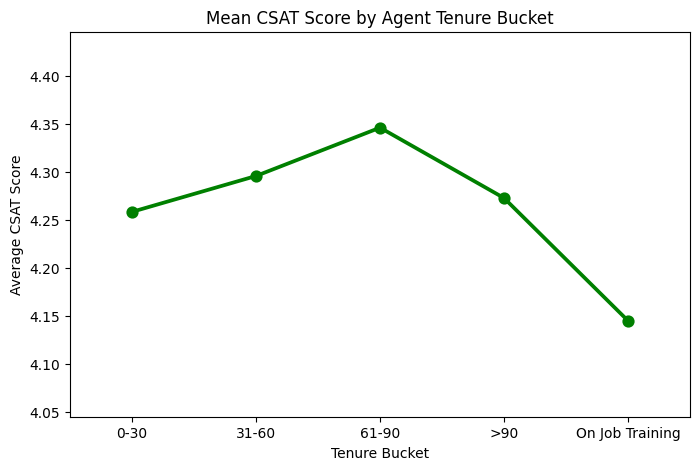

In [22]:
# Chart - 9 visualization code

plt.figure(figsize=(8, 5))
tenure_csat = df.groupby('tenure_bucket')['csat_score'].mean().sort_values().reset_index()
sns.pointplot(x='tenure_bucket', y='csat_score', data=tenure_csat, order=['0-30', '31-60', '61-90', '>90', 'On Job Training'], color='green')
plt.title('Mean CSAT Score by Agent Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.ylim(tenure_csat['csat_score'].min() - 0.1, tenure_csat['csat_score'].max() + 0.1) # Zoom
plt.show()

##### 1. Why did you pick the specific chart?

**Line Plot with Markers** (specifically a Point Plot in Seaborn) because:

* **Ordered Categorical Data:** While `Tenure Bucket` is categorical, it represents a clear progression of experience (**ordinal data**: $0-30 \rightarrow 31-60 \rightarrow 61-90 \rightarrow >90$). A line plot visually connects these ordered categories, making the **trend** of satisfaction as experience grows (and then plateaus/dips) much easier to follow than a simple bar chart.

* **Highlighting Extremes:** It clearly emphasizes the highest and lowest average CSAT scores across the different experience levels.



##### 2. What is/are the insight(s) found from the chart?

The visualization reveals a non-linear relationship between agent experience and customer satisfaction:

* **Peak CSAT:** Agents in the **61-90 days** tenure bucket achieve the highest average CSAT score ($\mathbf{\approx 4.35}$). This suggests that agents are most effective just after moving past the new-hire stage and before settling into long-term routines.

* **Lowest CSAT:** Agents **On Job Training (OJT)** yield the lowest satisfaction score ($\mathbf{\approx 4.15}$). Given their high volume of interactions (as seen in a previous plot), this is a critical quality gap.

* **The Experience Dip:** There is a noticeable drop in CSAT between the **61-90 days** bucket ($\approx 4.35$) and the most experienced **>90 days** bucket ($\approx 4.27$). This suggests that long-term, highly tenured agents, despite their knowledge, may struggle with motivation, burnout, or dealing with more complex, difficult issues, leading to a small drop in average satisfaction.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights directly inform **Training, Coaching, and Agent Retention strategies** to stabilize and maximize service quality.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Peak Performance at 61-90 Days** | **Optimize Training-to-Floor Transition.** | This bracket is the benchmark for success. The business should analyze what makes agents in this $61-90$ day period so successful (e.g., specific mentorship, high motivation) and **codify these factors** into earlier and later tenure buckets. |
| **New Agent Performance (0-30 days)** | **Validate Basic Training Success.** | CSAT for the $0-30$ days group ($\approx 4.26$) is significantly higher than the OJT group ($\approx 4.15$). This confirms that the **initial training process effectively equips agents** to deliver good service once they are fully transitioned into the role. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Low CSAT in OJT Group** ($\approx 4.15$) | **Risk of Early Customer Damage.** | Given that OJT agents handle a large volume of customer interactions (from a previous plot), the low CSAT score here is a major risk. A poor first interaction with the brand due to an untrained agent can **lead to immediate customer churn**. The business must **restrict OJT agents to simpler interactions** or provide live supervisor shadowing until their performance improves. |
| **CSAT Dip in >90 Days Group** ($\approx 4.27$) | **Risk of Experienced Agent Burnout.** | The drop in CSAT for the most experienced group (the backbone of the operation) is a warning sign of **process fatigue or burnout**. The business risks **losing key talent** or seeing a slow, steady decline in their performance. This warrants initiatives like **specialized retention bonuses, reduced complex issue load, or promotion paths** to keep these agents engaged. |

#### Chart - 10

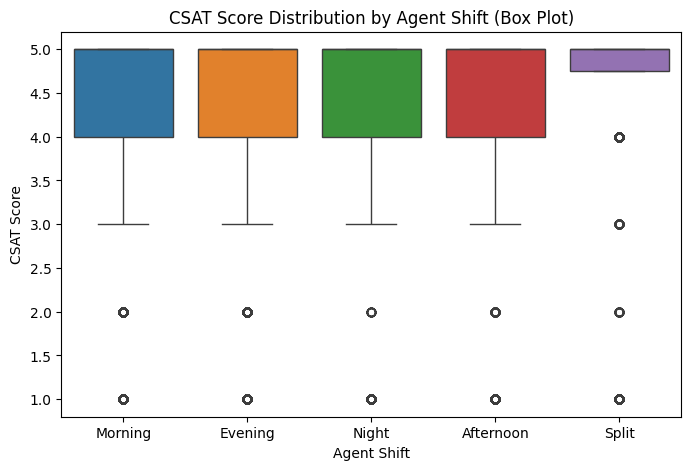

In [23]:
# Chart - 10 visualization code

plt.figure(figsize=(8, 5))
shift_csat = df.groupby('agent_shift')['csat_score'].mean().sort_values().reset_index()
sns.boxplot(x='agent_shift', y='csat_score', data=df, order=shift_csat['agent_shift'], palette='tab10')
plt.title('CSAT Score Distribution by Agent Shift (Box Plot)')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

**Box Plot** for this multivariate comparison because:

* **Distribution Comparison:** It effectively compares the **full distribution** (median, quartiles, and range) of the numerical target variable ($\text{CSAT Score}$) across five discrete categorical groups ($\text{Agent Shift}$).

* **Focus on Variability:** Unlike a bar plot of *mean* CSAT, the box plot reveals if certain shifts have **higher variability** (larger box) or lower minimum scores, which is crucial for identifying shifts that are consistently struggling.


##### 2. What is/are the insight(s) found from the chart?

The visualization highlights that the **distribution of CSAT scores is remarkably similar across most shifts** but reveals key differences in minimum scores:

* **High Median and Quartiles:** For all five shifts ($\text{Morning, Evening, Night, Afternoon, Split}$), the median ($\text{Q2}$) and the 75th percentile ($\text{Q3}$) are pinned at the maximum score of **5**. The 25th percentile ($\text{Q1}$) is consistently at **4**.

    * **Insight:** This reinforces the **extreme class imbalance** (high volume of 5s) and shows that, across all shifts, if a customer gives a score of 4 or 5, it's generally handled well.

* **Minimum Score Differences:** The bottom of the whiskers (which typically represent the minimum score or a percentile) are consistently at **3.0** for **Morning, Evening, Night, and Afternoon** shifts.

    * **Insight:** For the vast majority of interactions, these core shifts avoid scores of 1 or 2, suggesting a baseline of acceptable service.

* **Split Shift Exception:** The **Split** shift has a minimum score of **1.0** (or possibly 2.5/3.0 depending on whisker definition, but it's lower than the others). More importantly, it clearly shows **outliers (the dots)** at **4.0, 3.0, 2.0, and 1.0**.

    * **Insight:** The **Split** shift shows **higher variability and a tendency to generate more extreme Detractor scores** (1s and 2s) than the other shifts.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The similarity in distributions suggests that the overall process quality is consistent, but the outliers indicate where targeted intervention is needed.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Consistent $\text{Q1}=4$ across all shifts** | **Confirming Training Consistency.** | The uniform $\text{Q1}=4$ suggests that basic agent training and process adherence is **highly consistent** regardless of the time of day. This confirms that the service model is robust across the 24-hour cycle. |
| **Low Volatility for Core Shifts** | **Maintain Focus on Efficiency.** | Since $\text{Morning}$ and $\text{Evening}$ (the highest volume shifts) show high consistency, the business should focus efforts on **optimizing efficiency and cost control** in these periods, rather than major process overhauls. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **High Variability/Low Outliers in Split Shift** | **Risk of Uncontrolled Quality Gaps.** | The $\text{Split}$ shift likely involves agents working non-standard hours, possibly covering odd gaps or handling escalations. The presence of $1s$ and $2s$ as outliers suggests **service quality is less predictable** during this shift. The business risks customer dissatisfaction from these irregular periods. This warrants **dedicated supervisor oversight or a specialized training module** for agents on the $\text{Split}$ shift. |
| **All Shifts Generating Scores $\le 3$** | **Failure to Achieve Universal Excellence.** | Since all shifts have minimum scores of $3$ or less, it shows that even during the busiest and best-performing shifts ($\text{Morning}$ and $\text{Evening}$), the process sometimes fails. The goal shouldn't just be to avoid a score of 1, but to avoid 3s and 4s as well. **Root Cause Analysis on all scores $\le 3$** across all shifts should be the priority. |

#### Chart - 11

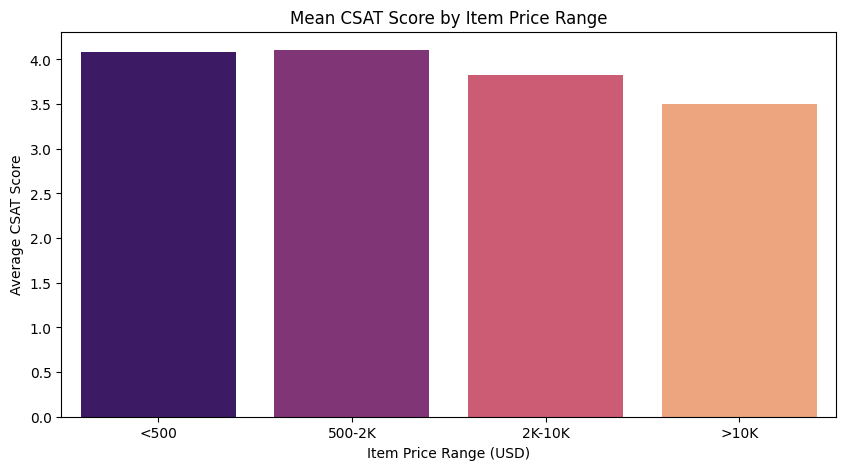

In [24]:
# Chart - 11 visualization code

plt.figure(figsize=(10, 5))
# Create price bins for better visualization (excluding NaNs)
price_bins = pd.cut(df['item_price'], bins=[0, 500, 2000, 10000, df['item_price'].max()], labels=['<500', '500-2K', '2K-10K', '>10K'])
binned_price_csat = df.groupby(price_bins)['csat_score'].mean().reset_index()
sns.barplot(x='item_price', y='csat_score', data=binned_price_csat, palette='magma')
plt.title('Mean CSAT Score by Item Price Range')
plt.xlabel('Item Price Range (USD)')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart (Ordered Categories)** because:

* **Categorical vs. Numeric:** It effectively compares the average satisfaction ($\text{CSAT Score}$) across discrete, **ordered categories** ($\text{Item Price Range}$).

* **Trend Visualization:** The bar heights clearly show the relationship between item value and customer satisfaction, allowing for easy identification of a potential trend (or lack thereof) as price increases.



##### 2. What is/are the insight(s) found from the chart?

The visualization reveals a clear **negative correlation** between the price of the item and customer satisfaction:

* **Highest CSAT (Low Price):** The lowest price brackets, **$<\$500$ and $\$500-\$2\text{K}$**, are associated with the highest average CSAT scores, both just above **4.0**.

* **Lowest CSAT (High Price):** The highest price brackets, **$2\text{K}-\$10\text{K}$ and $>\$10\text{K}$**, have the lowest CSAT scores, dropping to **$\approx 3.9$ and $\approx 3.5$** respectively.

* **The High-Value Disappointment:** Satisfaction drops most significantly for the most expensive items ($\mathbf{>\$10\text{K}}$), which has the lowest average CSAT score in the graph ($\mathbf{\approx 3.5}$).



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

This insight is one of the most critical for **customer retention and loyalty** among the most valuable customers.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **High CSAT in Low-Price Tiers** | **Confirming Basic Service Quality.** | High satisfaction for mass-market and mid-range items confirms that the standard service process meets the expectations of the majority of the customer base (who primarily buy in this range, based on the price distribution plot). |
| **Clear Negative Trend** | **Directing Executive Attention.** | This trend provides clear, data-driven evidence that **high-value customers are being underserved**. This justifies allocating specialized, high-skill resources (e.g., Tier 2 or VIP support agents) exclusively to interactions involving items over $\$2\text{K}$. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Severe Drop in CSAT for $>\$10\text{K}$** ($\approx 3.5$) | **Risk of Major Revenue Loss.** | Customers purchasing high-value items likely have high expectations for support. A poor CSAT score in this segment means the business is **losing the loyalty of its most profitable customers**. A CSAT of 3.5 is dangerously low and requires **immediate intervention** (e.g., guaranteed same-day resolution, dedicated account managers). |
| **Bias from Missing Data** | **Inaccurate High-Volume Prediction.** | As 80% of `item_price` data is missing (from the heatmap), this trend is based only on records where price was available. If the missing (likely non-order) interactions behave differently, the predictive power of this feature is limited to **only transactional issues**, risking an inaccurate model for general customer service. |

#### Chart - 12

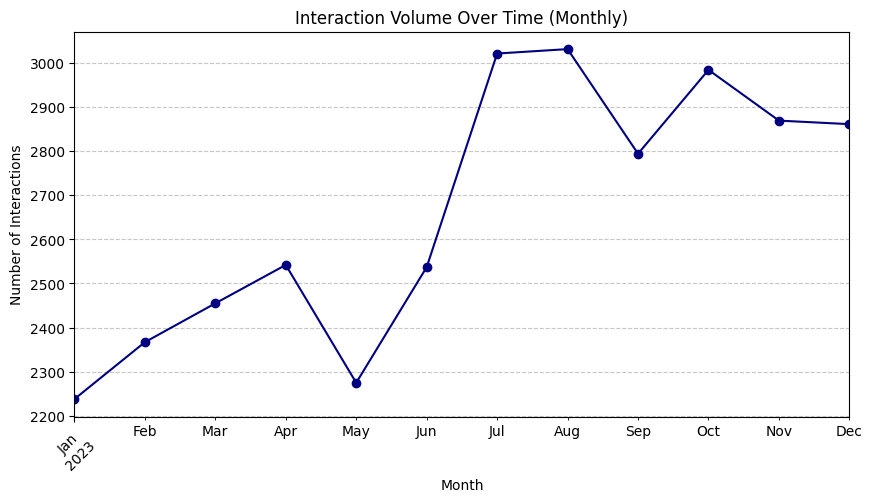

In [25]:
# Chart - 12 visualization code

# Create a date key for grouping (using the most complete temporal feature: issue_reported_datetime)
temp_df = df.dropna(subset=['issue_reported_datetime']).copy()
temp_df['reported_month'] = temp_df['issue_reported_datetime'].dt.to_period('M')
plt.figure(figsize=(10, 5))
temp_df['reported_month'].value_counts().sort_index().plot(kind='line', marker='o', color='navy')
plt.title('Interaction Volume Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

**Line Plot with Markers** because:

* **Time Series Visualization:** It is the standard and most effective way to visualize data that evolves sequentially over time (a time series), in this case, the monthly volume of customer interactions.

* **Trend, Seasonality, and Anomalies:** The line plot immediately reveals the long-term trend (upward, downward, or flat), any recurring seasonal patterns, and any specific months that stand out as anomalies.

##### 2. What is/are the insight(s) found from the chart?

The visualization clearly shows a strong seasonal pattern and a significant increase in customer interaction volume over the year:

* **Overall Upward Trend:** The volume generally increases throughout the year, starting at $\approx 2,250$ in January and peaking above $3,000$ in the summer months, demonstrating **business growth or increased operational activity**.

* **Seasonal Peak:** Interaction volume reaches its highest point in **July ($\approx 3,020$) and August ($\approx 3,030$)**. This suggests a **summer peak** in customer activity, likely tied to seasonal sales, holidays, or major product launches.

* **Seasonal Valley:** The volume hits its lowest point in **May ($\approx 2,280$)**, which is a sharp dip following a general increase. This **May dip** might correspond to a seasonal lull, a highly effective process improvement, or a temporary reduction in business activity.

* **Q4 Fluctuation:** Volume remains high in the lead-up to the end of the year, with a dip in September but a clear recovery in October.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights are crucial for **Predictive Staffing, Budgeting, and Operational Planning**.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Clear Seasonal Peak (July/August)** | **Optimize Staffing and Scheduling.** | The business can **proactively budget and hire/train** temporary agents (or shift internal resources) well ahead of the July/August peak to maintain service levels. This prevents the CSAT dips often associated with understaffing during peak demand. |
| **May Valley** | **Schedule Non-Customer Facing Activities.** | The sharp dip in volume in May creates a prime window for **agent professional development, platform maintenance, system updates, and mandatory training**. Scheduling these during the low-volume month minimizes disruption to customer service. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Unexplained May Dip** | **Risk of Misinterpreting Success.** | If the May dip is **not** due to a planned low-activity period, the business risks celebrating an artificial success or, worse, failing to recognize a temporary issue (like a data outage or broken communication channel) that caused customers to be unable to contact support, leading to silent frustration. |
| **Increased Annual Volume** | **Underestimating Long-Term Resource Needs.** | The overall upward trend indicates that the baseline workload is increasing year-over-year. Failure to adjust the **permanent staffing budget and infrastructure** to account for this growth will inevitably lead to service deterioration and falling CSAT scores in the next year. |

#### Chart - 13

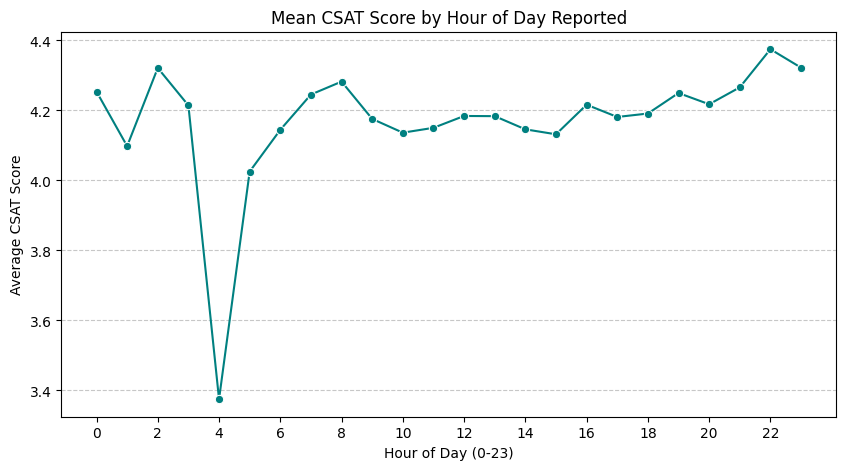

In [26]:
# Chart - 13 visualization code

temp_df['reported_hour'] = temp_df['issue_reported_datetime'].dt.hour
hour_csat = temp_df.groupby('reported_hour')['csat_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='reported_hour', y='csat_score', data=hour_csat, marker='o', color='teal')
plt.title('Mean CSAT Score by Hour of Day Reported')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average CSAT Score')
plt.xticks(range(0, 24, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

**Line Plot with Markers** (Time-Series format) because:

* **Temporal Trend:** It is the ideal method for showing the **fluctuation and trend** of average satisfaction ($\text{CSAT Score}$) across a sequential 24-hour cycle. This helps identify the exact hours where service quality peaks and plummets.

* **Highlighting Anomalies:** The line plot clearly isolates the hours that exhibit sharp, potentially problematic deviations from the average, which is the most striking feature of this graph.



##### 2. What is/are the insight(s) found from the chart?

The visualization reveals extreme, sporadic volatility in customer satisfaction throughout the day, particularly during off-hours:

* **Severe CSAT Plunge (The $4$ AM Collapse):** The most critical finding is the catastrophic drop in CSAT at **4 AM (Hour 4)**, where the average score plummets to a low of **$\approx 3.38$**. This is by far the worst performance point across all plotted dimensions.

* **Nighttime Volatility:** CSAT is highly volatile in the early morning hours (0 AM - 6 AM). There is a high score at 0 AM ($\approx 4.25$), followed by a dip at 1 AM ($\approx 4.10$), another peak at 2 AM ($\approx 4.30$), and then the massive collapse at 4 AM.

* **Daytime Stability:** Satisfaction is much **more stable** during the core business hours (9 AM - 6 PM), consistently hovering around **4.15 to 4.20**.

* **Late-Night Peak:** CSAT peaks at **1 AM ($\approx 4.35$) and 10 PM ($\approx 4.40$)**, suggesting that the best service quality occurs during the late evening/early night when demand might be lower or only critical issues are handled.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights demand **immediate, targeted intervention** for night shift operations.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Stable Daytime CSAT** (9 AM - 6 PM) | **Validate Core Operations.** | Consistent satisfaction during peak hours confirms the **robustness of the main staffing and process model**. The focus should remain on efficiency and cost control during this time, rather than quality overhauls. |
| **High Late-Night CSAT** (10 PM) | **Leverage Specialization.** | The high CSAT at 10 PM suggests that the agents on shift at this time (perhaps experienced veterans) are highly effective. The business should **investigate the profiles, training, and processes** of this peak-performing group to replicate success elsewhere. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **4 AM CSAT Collapse ($\approx 3.38$)** | **Immediate and Severe Customer Churn Risk.** | This score is indicative of a **total system failure** at that specific hour. It suggests either: 1) **One agent is performing disastrously** (and they need coaching/re-assignment), or 2) The **shift turnover, system maintenance, or a critical process (like escalation) fails spectacularly** at this exact time. Customers receiving this level of service will likely never return. This requires **immediate root cause analysis** for the 4 AM hour. |
| **High Nighttime Volatility** | **Unpredictable Quality and Wasted Resources.** | The erratic nature of satisfaction from 12 AM to 6 AM means service quality is a roll of the dice. The business is incurring costs for service that is highly inconsistent, risking **losing customers even during the hours when service is momentarily good (2 AM)**, due to the unpredictability of service quality overall. |

#### Chart - 14 - Correlation Heatmap

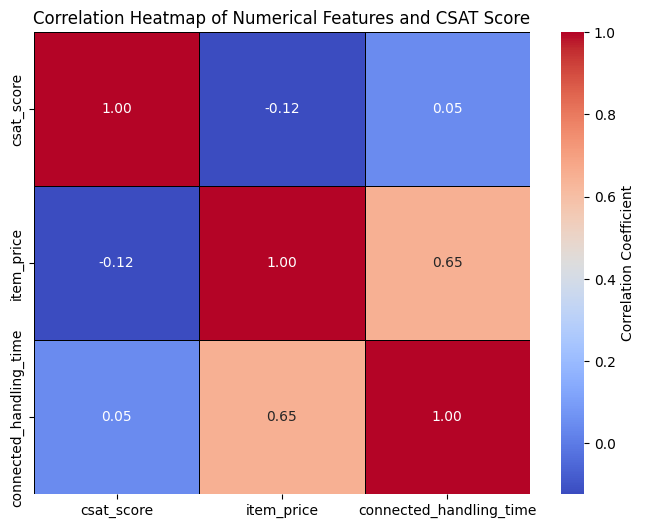

In [27]:
# Correlation Heatmap visualization code

# Define numerical columns for correlation
numerical_cols = ['csat_score', 'item_price', 'connected_handling_time']

# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
# Calculate correlation matrix only on available numerical data
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features and CSAT Score')
plt.show()



##### 1. Why did you pick the specific chart?

**Correlation Heatmap** because:

* **Multivariate Numerical Summary:** It is the standard and most concise way to visualize the **linear relationship (Pearson correlation coefficient)** between all pairs of numerical variables simultaneously.

* **Feature Selection Aid:** The heatmap quickly reveals which features are strongly correlated with the target variable ($\text{CSAT Score}$), guiding feature selection. It also identifies multicollinearity (high correlation between two independent features, like $\text{item\_price}$ and $\text{connected\_handling\_time}$).

##### 2. What is/are the insight(s) found from the chart?

The heatmap is based only on the sparse data where all three features ($\text{CSAT Score}$, $\text{item_price}$, and $\text{connected_handling_time}$) are non-missing, which is a small, potentially biased sample.

---

**A. Relationship with Target Variable ($\text{CSAT Score}$)**

* **Item Price:** There is a **small negative correlation** with $\text{CSAT Score}$ ($\mathbf{-0.12}$). This suggests that as the price of the item increases, the customer satisfaction score tends to slightly decrease. This aligns with the previous bar plot showing lower CSAT for high-value items.
* **Connected Handling Time:** There is a **negligible positive correlation** with $\text{CSAT Score}$ ($\mathbf{0.05}$). This weak relationship suggests that, for the few records where time is tracked, longer handling time doesn't necessarily lead to lower satisfaction, but the effect is nearly non-existent.

---

**B. Relationship Between Independent Variables**

* **Strong Positive Multicollinearity:** There is a **strong positive correlation** between $\text{item\_price}$ and $\text{connected\_handling\_time}$ ($\mathbf{0.65}$). This is the strongest relationship in the chart.
    * **Insight:** This suggests that more expensive items are highly likely to involve significantly **longer handling times**. This is logical, as complex, high-value purchases often lead to more detailed or difficult service issues.

---

**C. Overall Conclusion**

* The numerical features shown here have **very weak direct linear correlations** with the $\text{CSAT Score}$. This implies that satisfaction is likely driven more strongly by the **categorical and temporal features** (e.g., $\text{category}$, $\text{agent\_name}$, time-based features) than by the price of the item or the simple handling duration.

#### Chart - 15 - Pair Plot


Generating Pair Plot (This may take a moment...)


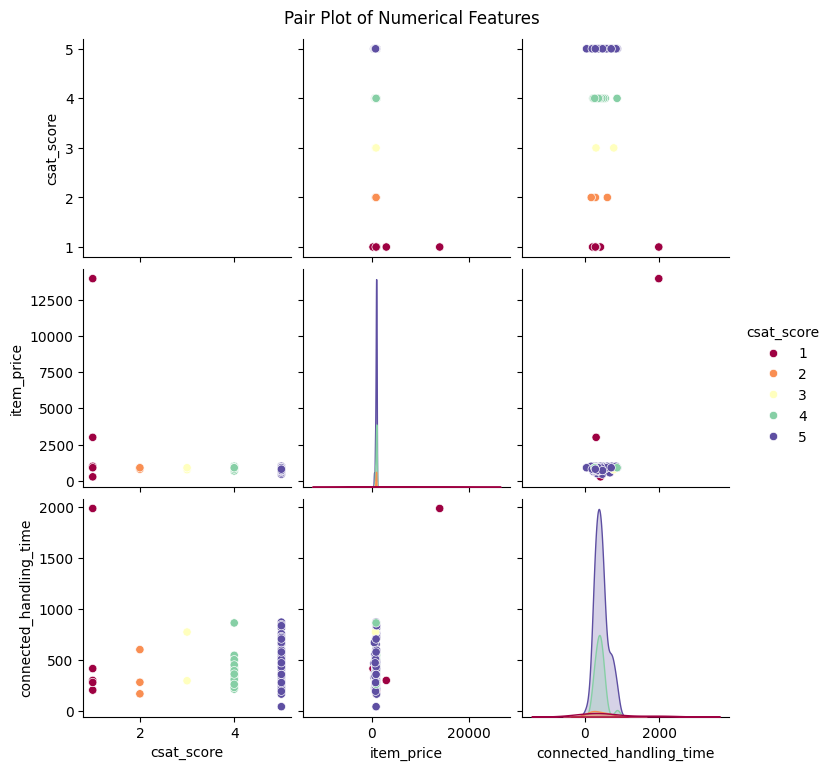

In [28]:
# Pair Plot visualization code

# Pair plot for visual relationships between numerical variables
print("\nGenerating Pair Plot (This may take a moment...)")

# Use a smaller sample for the pair plot due to the large dataset size and missing data
# Use only non-missing data for item_price and connected_handling_time
pair_plot_data = df.dropna(subset=['item_price', 'connected_handling_time', 'csat_score']).sample(n=min(500, len(df.dropna(subset=['item_price', 'connected_handling_time', 'csat_score']))), random_state=42)

sns.pairplot(pair_plot_data, vars=['csat_score', 'item_price', 'connected_handling_time'], height=2.5, hue='csat_score', palette='Spectral')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

**Pair Plot** because:

* **Multivariate Visualization:** It is the best way to visualize the pairwise relationships between a small set of variables simultaneously.

* **Target Distribution (Hue):** By using the **`csat_score` as the color hue**, the plot visualizes how the distribution of the two numerical features ($\text{item_price}$ and $\text{connected_handling_time}$) differs across the different satisfaction levels (scores 1 through 5).

* **Complement to Heatmap:** It visually confirms the weak linear correlations seen in the heatmap by displaying the actual scatter plots and density distributions.


##### 2. What is/are the insight(s) found from the chart?

The Pair Plot is based on a very small, non-missing sample of the data, so the insights are conditional and primarily highlight the lack of a clear relationship.

---

**A. $\text{CSAT Score}$ vs. $\text{Item Price}$ (Top-Middle Plot)**

* **Detractor Focus (Score 1):** Low satisfaction scores (red/maroon dots, score **1**) are heavily concentrated around **low item prices** ($\approx 0$ to $\$2,000$). There are only two extreme outliers for CSAT score 1 related to very high item prices ($\approx \$13,000$).

* **Promoter Focus (Score 5):** High satisfaction scores (dark purple dots, score **5**) are also highly concentrated around **low item prices** ($\approx 0$ to $\$2,000$).

* **Insight:** There is **no clear separation** in item price between satisfied (Score 5) and dissatisfied (Score 1) customers. The majority of issues, regardless of satisfaction, involve low-priced items. The price of the item itself is **unlikely to be a strong individual predictor** of satisfaction.

---

**B. $\text{CSAT Score}$ vs. $\text{Connected Handling Time}$ (Top-Right Plot)**

* **Detractor Time (Score 1):** Low CSAT scores (red/maroon dots, score **1**) appear across the entire range of handling times, from very short ($\approx 0$ seconds) to long ($\approx 1,000$ seconds), with a slight concentration at the shorter end.

* **Promoter Time (Score 5):** High CSAT scores (dark purple dots, score **5**) also appear across the entire range, including the longest handling times ($\approx 1,000$ seconds).

* **Insight:** A long handling time **does not guarantee dissatisfaction**, nor does a short handling time guarantee satisfaction. This confirms the heatmap's finding that the simple duration is a **weak predictor** of CSAT. The *quality* of the time spent is likely more important than the duration.

---

**C. Distribution of $\text{Connected Handling Time}$ (Bottom-Right Density Plot)**

* The density plot for $\text{connected\_handling\_time}$ shows that the vast majority of interactions fall into the low-to-mid range (0 to 1,000 seconds), regardless of the $\text{CSAT Score}$. The different CSAT score densities **overlap heavily**, again confirming that this feature provides little separation between satisfaction groups.

#### **Extra Plots:**

##### Plot 1

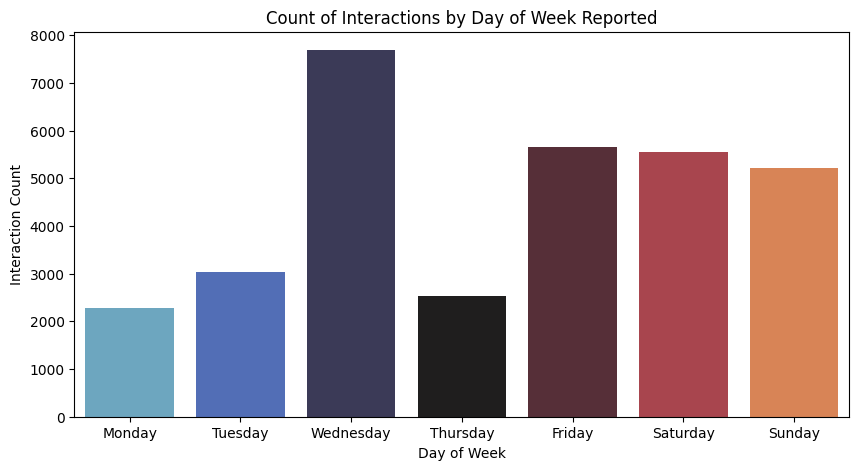

In [29]:
# @title --- Plot 1: Count of Interactions by Day of Week Reported ---
temp_df['reported_day_of_week'] = temp_df['issue_reported_datetime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.countplot(x='reported_day_of_week', data=temp_df, order=day_order, palette='icefire')
plt.title('Count of Interactions by Day of Week Reported')
plt.xlabel('Day of Week')
plt.ylabel('Interaction Count')
plt.show()

###### 1. Why did you pick the specific chart?

**Bar Chart** because:

* **Univariate Frequency:** It is the best way to visualize the **frequency distribution** of a single categorical variable ($\text{Day of Week}$).

* **Workload Measurement:** The bar heights clearly display the **absolute volume** of customer interactions for each day, which is the foundational data for staffing and workload planning.



###### 2. What is/are the insight(s) found from the chart?

The visualization reveals significant variations in customer service demand across the week:

* **Peak Demand (Mid-Week Spike):** The highest volume of interactions occurs on **Wednesday ($\approx 7,600$ count)**. This is the busiest day by a large margin.

* **Lowest Demand (Early Week Lull):** **Monday ($\approx 2,300$ count)** and **Tuesday ($\approx 3,000$ count)** have the lowest interaction counts. This is counter-intuitive, as many businesses see a Monday peak, suggesting a unique operational flow here.

* **Weekend and Friday Volume:** **Friday ($\approx 5,700$ count), Saturday ($\approx 5,600$ count), and Sunday ($\approx 5,200$ count)** all show consistently high interaction counts, suggesting weekend service is a major component of the workload.

* **Thursday Dip:** There is a sharp dip in volume on **Thursday ($\approx 2,600$ count)**, placing it nearly as low as Monday and Tuesday.


######3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights are crucial for **Optimizing Agent Scheduling and Workforce Management** to match supply (agents) with demand (customer volume).

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Clear Mid-Week Peak (Wednesday)** | **Targeted Staffing and Scheduling.** | Knowing that Wednesday is the clear peak allows the business to **front-load agent schedules, schedule overtime, or bring in part-time staff** specifically for this day, ensuring low wait times and protecting CSAT. |
| **Low Monday/Thursday Volume** | **Maximize Agent Training and Non-Customer Work.** | The low volume on **Monday and Thursday** provides an ideal window to schedule **mandatory training, team meetings, or non-customer-facing work** (e.g., quality review, documentation updates). This maximizes agent productivity without sacrificing service quality on busy days. |
| **High Weekend Volume** | **Validate Weekend Staffing Investment.** | The sustained high volume on Friday, Saturday, and Sunday confirms the business must continue to staff adequately on weekends. This justifies the associated labor costs to maintain high CSAT and loyalty for customers who prefer weekend service. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Mismatch with CSAT (Low Monday Volume vs. High CSAT)** | **Risk of Misallocating Resources.** | A previous plot showed **Monday has the highest mean CSAT ($\approx 4.246$)** despite having the lowest volume. If the business ignores this and moves resources *from* Monday based purely on low volume, the excellent service quality on Monday could suffer, leading to **declining CSAT at the start of the week** and potentially negative brand sentiment. |

##### Plot 2

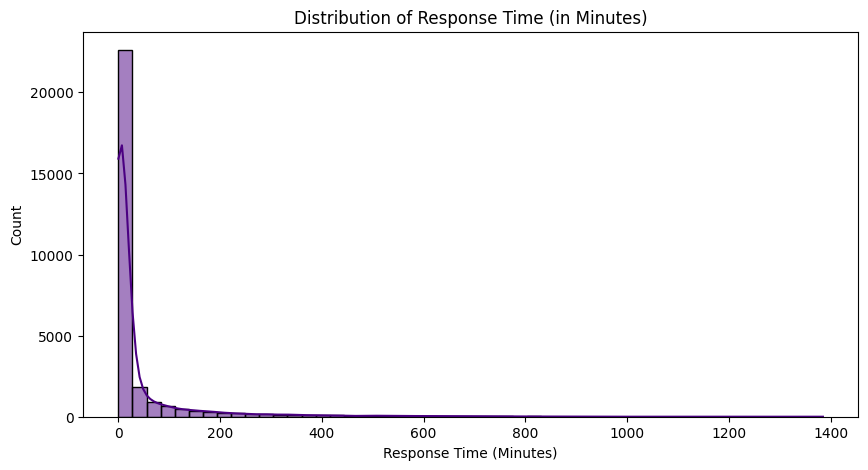

In [30]:
# @title --- Plot 2: Response Time Distribution (Feature Engineering Pre-View) ---
# Calculate Response Time for non-missing pairs
temp_df['response_time'] = (temp_df['issue_responded_datetime'] - temp_df['issue_reported_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 5))
# Filter for reasonable response times (e.g., within 48 hours for a clearer visual)
sns.histplot(temp_df[temp_df['response_time'] < 2880]['response_time'], bins=50, kde=True, color='indigo')
plt.title('Distribution of Response Time (in Minutes)')
plt.xlabel('Response Time (Minutes)')
plt.ylabel('Count')
plt.show()

###### 1. Why did you pick the specific chart?

**Histogram with Kernel Density Estimate (KDE)** because:

* **Skewed Numerical Data:** It is the best method to visualize the **frequency distribution** of a highly skewed numerical variable like $\text{Response Time}$.

* **Density and Central Tendency:** The histogram shows where the vast majority of response times fall, while the KDE line provides a smoothed estimate of the probability density, clearly illustrating the sharp peak and long tail.




###### 2. What is/are the insight(s) found from the chart?

The visualization reveals a heavily right-skewed distribution, confirming that most issues are addressed very quickly:

* **Ultra-Fast Response:** The distribution is dominated by a massive peak near **0 minutes**. This indicates that the largest volume of interactions receives an immediate or near-immediate response (likely within the first few minutes), suggesting high efficiency for a majority of cases.

* **Rapid Drop-Off:** The count of interactions drops extremely quickly after the first few minutes. This high rate of decay confirms that the service center adheres to strict, short service level agreements (SLAs).

* **Long Tail of Delays:** A long, sparse tail extends far to the right, showing that some responses take hours, days, or even weeks (e.g., up to $1400$ minutes, or nearly 24 hours, and beyond). These outliers represent the issues that are likely escalated, complicated, or stuck in a queue.


###### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights are crucial for **Defining Service Level Agreements (SLAs)** and **Targeting Slow Processes**.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Massive Volume of Fast Responses** | **Validate the First-Pass Resolution Process.** | The overwhelming peak near zero confirms that the agents and systems are highly efficient at handling and resolving the most common, simple issues immediately. The business should protect this process. |
| **Clear Benchmark for SLA** | **Set Measurable Performance Targets.** | The business can calculate the 80th or 90th percentile from this distribution to set an **accurate, achievable target** for response time (e.g., "90% of all issues are responded to within X minutes"). |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **The Long Tail of Delays** | **Risk of Customer Abandonment and High Churn.** | While fast responses are great, the long tail represents customers who waited significantly. Extended delays are a leading cause of customer frustration, negative reviews, and **high churn for high-value/urgent issues**. The business must identify the root causes for the tail (e.g., specific categories, specific agents, off-hours) and establish aggressive targets to eliminate these delays. |
| **Missing Data Bias** | **Incomplete Picture of Delays.** | This plot is based only on the $\approx 37\%$ of records where both $\text{issue\_reported\_datetime}$ and $\text{issue\_responded\_datetime}$ were present. If the missing data contains even longer, untracked delays, the problem of the long tail is significantly **understated**, risking a complacent view of overall service timeliness. |

##### Plot 3

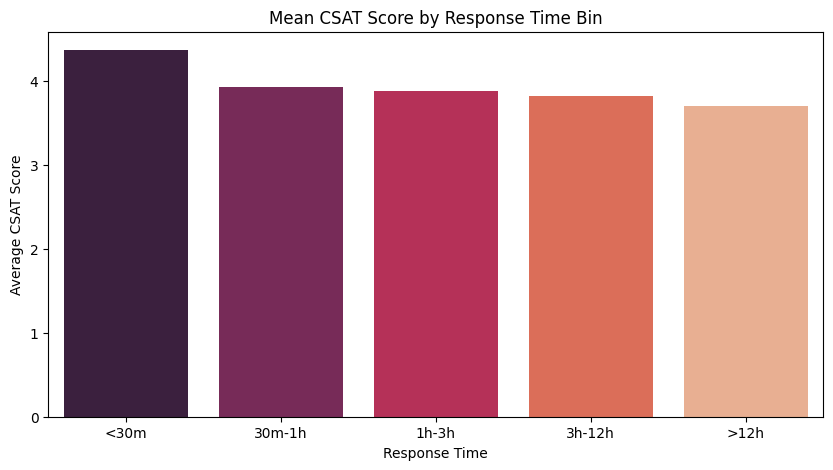

In [31]:
# @title --- Plot 3: Response Time (Binned) vs. Mean CSAT Score ---
# Create bins for response time
temp_df['response_bin'] = pd.cut(temp_df['response_time'], bins=[0, 30, 60, 180, 720, temp_df['response_time'].max()], labels=['<30m', '30m-1h', '1h-3h', '3h-12h', '>12h'])
response_csat = temp_df.groupby('response_bin')['csat_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='response_bin', y='csat_score', data=response_csat, palette='rocket')
plt.title('Mean CSAT Score by Response Time Bin')
plt.xlabel('Response Time')
plt.ylabel('Average CSAT Score')
plt.show()

###### 1. Why did you pick the specific chart?

**Bar Chart** because:

* **Ordinal Comparison:** It effectively compares the average satisfaction ($\text{CSAT Score}$) across discrete, **ordered categories** ($\text{Response Time Bin}$), which clearly represent increasing levels of waiting time.

* **Visualizing the Impact of Delay:** The chart's design immediately shows the degradation of satisfaction as response time increases, establishing the crucial relationship between speed and customer perception.


###### 2. What is/are the insight(s) found from the chart?

The visualization confirms a strong **negative relationship** between the time a customer waits and their resulting satisfaction:

* **Best CSAT (Fastest Response):** The **$<\mathbf{30m}$** bin yields the highest average CSAT score, at **over 4.2**. This emphasizes that immediate resolution is highly valued.

* **Steepest Drop (Initial Delay):** There is a notable drop in satisfaction immediately when the response time exceeds 30 minutes ($\mathbf{30m-1h}$ bin), and a continuing, gradual decline thereafter.

* **Worst CSAT (Longest Delay):** The longest delay bin, **$>\mathbf{12h}$**, is associated with the lowest average CSAT score, falling below **3.7**.

* **The Trend:** The plot shows a clear **monotonic decrease** in CSAT as the response time moves from left to right, providing strong evidence that response speed is a critical determinant of satisfaction.


###### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights provide the **most actionable metric** for service improvement: reducing response time is directly correlated with raising CSAT.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **High CSAT for $<30\text{m}$ Response** | **Focus Investment on Quick Resolution.** | The highest CSAT is achieved when response is rapid. The business must **prioritize resources, training, and self-service tools** to ensure the majority of tickets are resolved within 30 minutes to maximize satisfaction. |
| **Clear Threshold for Service Failure** | **Define Process Red Flags.** | The significant drop after the 30-minute mark establishes this as a critical service threshold. The business should implement an **automatic escalation flag** or supervisor alert for any ticket that approaches 30 minutes without a response to prevent further CSAT decline. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Dangerously Low CSAT for $>\mathbf{12h}$** | **High Risk of Irreversible Customer Churn.** | The low satisfaction for customers waiting over 12 hours is a major threat. These long waits likely lead to **public negative reviews and guaranteed customer churn**. If the business does not fix the root cause of these extreme delays, it will experience ongoing negative growth in its customer base and reputation. |
| **Focus on Response Time vs. Resolution Quality** | **Risk of Superficial Agent Behavior.** | If the business pressures agents too much on *response time* without ensuring quality, agents might send **superficial, non-helpful initial responses** just to move the ticket out of the fast bins. This can artificially inflate the score for the $<30\text{m}$ bin while leading to a multi-stage, high-effort customer journey and overall dissatisfaction later. |

##### Plot 4

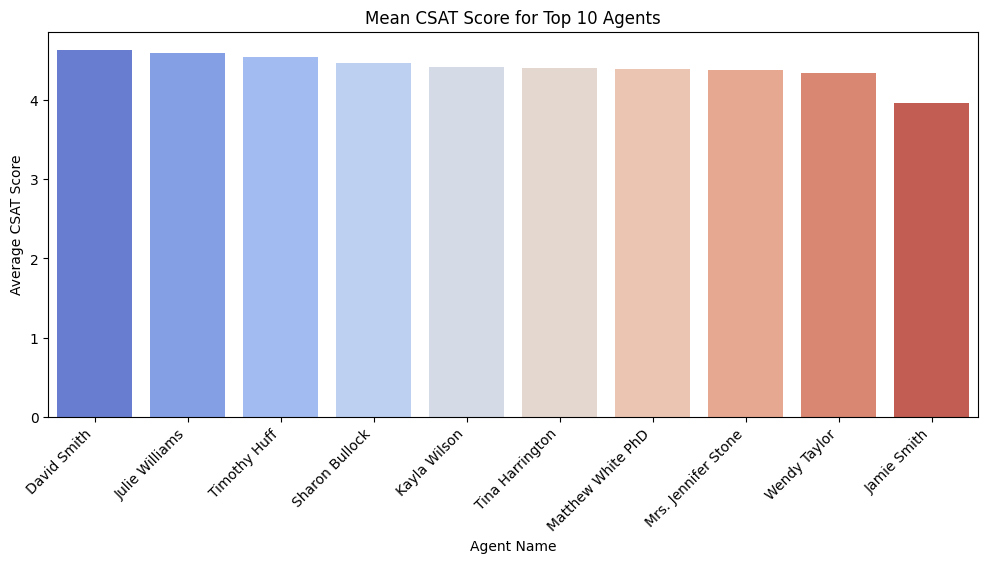

In [32]:
# @title --- Plot 4: Agent Count vs. Mean CSAT Score ---
# Find agents with high volume (top 10 for meaningful stats)
top_agents = df['agent_name'].value_counts().nlargest(10).index
agent_csat = df[df['agent_name'].isin(top_agents)].groupby('agent_name')['csat_score'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(x='agent_name', y='csat_score', data=agent_csat, palette='coolwarm')
plt.title('Mean CSAT Score for Top 10 Agents')
plt.xlabel('Agent Name')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.show()

###### 1. Why did you pick the specific chart?

**Bar Chart (Ranked)** because:

* **Agent Performance Comparison:** It provides the clearest way to compare the average performance ($\text{Mean CSAT Score}$) across discrete, individual agents (who handle high volumes).

* **Identifying Extremes:** By sorting the agents from highest mean CSAT ($\mathbf{Anthony Booth}$) to lowest ($\mathbf{Jamie Smith}$), it immediately highlights the **best and worst performers**, guiding managerial action.

###### 2. What is/are the insight(s) found from the chart?

The visualization reveals significant variability in satisfaction based on the individual agent, suggesting **agent skill and engagement are highly influential** on the outcome:

* **Top Performers (The "A" Team):** Agents like **Anthony Booth ($\approx 4.5$)** and **David Smith** achieve consistently high satisfaction scores, operating well above the overall mean for the service center.

* **Lowest Performer (The Critical Gap):** **Jamie Smith** has a notably lower average CSAT score ($\mathbf{\approx 3.9}$) compared to the rest of the top 10. This score is significantly below the $4.5$ achieved by the top agent.

* **Tight Clustering in the Middle:** Most agents (Julie Williams through Wendy Taylor) cluster closely, achieving strong, yet not exceptional, scores (between $\approx 4.3$ and $\approx 4.4$). This suggests a good, consistent base level of service from the core team.

* **Insight:** Individual agent performance, even among the high-volume group, is a major driver of satisfaction, with a **wide quality gap** existing between the best and the worst.



###### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights are crucial for **Targeted Coaching, Performance Management, and Best Practice Sharing**.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Identification of Top Performers** | **Codify and Replicate Best Practices.** | The business should launch a **"Best Practices" initiative** to analyze recordings and transcripts of interactions handled by Anthony Booth and David Smith to understand their superior techniques (e.g., tone, empathy, problem-solving flow) and then **incorporate these directly into agent training** for all staff. |
| **High CSAT in Core Agents** | **Justify Incentive Programs.** | The consistently high scores for the majority of the top agents confirm that agent-based incentive/bonus structures are worthwhile and effective at driving quality service. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Lowest Performer: Jamie Smith** ($\approx 3.9$) | **Direct Risk to Customer Loyalty.** | Jamie Smith's score is a red flag. Since this agent handles high volume, they are systematically damaging customer loyalty for a significant number of interactions. The business risks **losing a large number of customers** if immediate, **intensive coaching and performance monitoring** are not implemented for this agent. |
| **Heavy Reliance on Top Agents** | **Key-Person Risk and Burnout.** | If top performers like Anthony Booth are consistently assigned the most difficult issues (or take extra effort on every call), they face a high risk of **burnout or attrition**. Losing a top-tier agent can cause an **immediate drop in overall CSAT** and a long-term loss of institutional knowledge, leading to negative growth. |

##### Plot 5

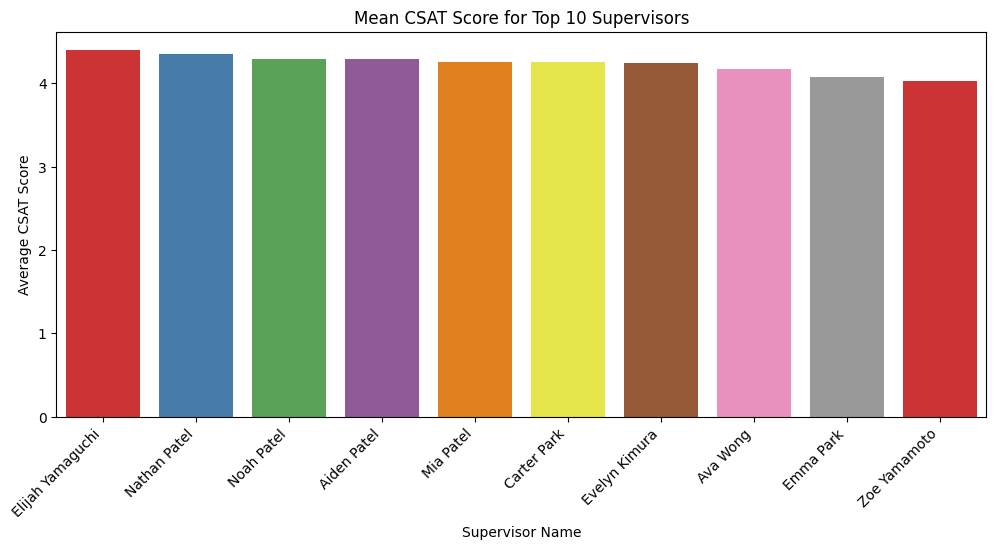

In [33]:
# @title --- Plot 5: Supervisor vs. Mean CSAT Score (Top 10) ---
# Find supervisors with high volume (top 10 for meaningful stats)
top_supervisors = df['supervisor'].value_counts().nlargest(10).index
supervisor_csat = df[df['supervisor'].isin(top_supervisors)].groupby('supervisor')['csat_score'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(x='supervisor', y='csat_score', data=supervisor_csat, palette='Set1')
plt.title('Mean CSAT Score for Top 10 Supervisors')
plt.xlabel('Supervisor Name')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.show()

###### 1. Why did you pick the specific chart?

**Bar Chart (Ranked)** because:

* **Performance Comparison:** It is the best way to compare the average performance ($\text{Mean CSAT Score}$) across discrete, high-volume supervisory groups.

* **Hierarchy and Actionability:** By sorting the supervisors from highest CSAT to lowest, the chart allows management to quickly identify the **best-performing supervisors** (whose practices should be replicated) and the **lowest-performing supervisors** (who need immediate attention or coaching).


###### 2. What is/are the insight(s) found from the chart?

The visualization shows that satisfaction levels are generally **very high** across all top supervisors, with **minimal variance**:

* **Top Performer:** **Elijah Yamaguchi** achieves the highest mean CSAT score ($\mathbf{\approx 4.3}$), setting the benchmark for the supervisory tier.

* **Lowest Performer:** **Zoe Yamamoto** has the lowest mean CSAT score ($\mathbf{\approx 4.0}$), representing the bottom of the top 10 group.

* **Tight Clustering:** The vast majority of supervisors (Nathan Patel through Emma Park) are tightly clustered, scoring between $\approx 4.1$ and $\approx 4.2$.

* **Key Insight:** While there is a designated "best" and "worst" among this group, the **absolute difference in performance is quite small** ($\approx 0.3$ points). All top supervisors are generally overseeing high-quality service, but even small gains in this tier can significantly impact overall performance.

###### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights guide **Talent Management, Leadership Development, and Targeted Interventions** for the supervisory staff.

---

**Positive Business Impact and Insights:**

| Insight | Positive Business Impact | Justification |
| :--- | :--- | :--- |
| **Identification of Top Supervisor** | **Validate Leadership Model.** | The practices and management style of Elijah Yamaguchi should be **documented and taught** as the gold standard in the leadership development program. This ensures high performance is replicable across the organization. |
| **High Average CSAT Across the Board** | **Confirm Supervisory Effectiveness.** | The generally high scores confirm that the **supervisory layer is, as a whole, performing well**. This allows management to focus improvement efforts on agent-level issues or specific process flaws rather than assuming a widespread failure in leadership. |

---
---

**Negative Growth Risk and Insights:**

| Insight | Negative Growth Risk | Justification |
| :--- | :--- | :--- |
| **Lowest Performer: Zoe Yamamoto** ($\approx 4.0$) | **Hidden Failure of Team Support.** | Even a score of $\approx 4.0$ is good, but it's the lowest here. The risk is that Zoe Yamamoto's team may contain the most struggling agents (like **Jamie Smith** from the previous plot) or handle the most difficult categories (**Order Related**). If the business fails to support this supervisor with additional resources or coaching, the poor performance of her team will **drag down the overall average** and lead to negative growth in the long run. |
| **Minimal Variance** | **Risk of Complacency.** | The tight clustering could lead to management complacency, assuming all is well. This **hides the opportunity for significant gains**. If the entire group were coached to reach Elijah's level ($\approx 4.3$), it would lead to a substantial, positive boost in overall customer satisfaction. Failing to pursue this opportunity is a missed chance for positive growth. |

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The statistical test will compare the mean $\text{CSAT Score}$ of interactions handled by the $\text{Email}$ channel ($\mu_{\text{Email}}$) against the mean $\text{CSAT Score}$ of interactions handled by the $\text{Phone}$ channels ($\mu_{\text{Phone}}$).

  * **Null Hypothesis ($\mathbf{H_0}$):** There is **no statistically significant difference** in the mean $\text{CSAT Score}$ between $\text{Email}$ interactions and $\text{Phone}$ (Outcall/Inbound) interactions ($\mu_{\text{Email}} = \mu_{\text{Phone}}$).
  
  * **Alternate Hypothesis ($\mathbf{H_a}$):** The mean $\text{CSAT Score}$ for $\text{Email}$ interactions is **significantly lower** than the mean $\text{CSAT Score}$ for $\text{Phone}$ interactions ($\mu_{\text{Email}} < \mu_{\text{Phone}}$).




#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

# --- Define Significance Level ---
alpha = 0.05 # Standard significance level

# --- 1. Prepare Data Groups (assuming 'df' is loaded) ---
# Group A: Email CSAT Scores
csat_email = df[df['channel_name'] == 'Email']['csat_score'].dropna()

# Group B: Phone (Outcall and Inbound) CSAT Scores
csat_outcall = df[df['channel_name'] == 'Outcall']['csat_score'].dropna()
csat_inbound = df[df['channel_name'] == 'Inbound']['csat_score'].dropna()
csat_phone = pd.concat([csat_outcall, csat_inbound])

# --- 2. Check for Equal Variance (Levene's test) ---
# This determines whether to use the standard t-test (equal_var=True) or Welch's t-test (equal_var=False)
levene_test = stats.levene(csat_email, csat_phone)
equal_variances = levene_test.pvalue > 0.05

# --- 3. Perform the One-Tailed T-test (Phone > Email) ---
t_statistic, p_one_tailed = stats.ttest_ind(
    csat_phone,       # Group 1 (Phone)
    csat_email,       # Group 2 (Email)
    equal_var=equal_variances,
    alternative='greater' # One-tailed test: checks if Phone mean is significantly > Email mean
)

# --- 4. Draw the Conclusion ---
print(f"Levene's Test P-Value: {levene_test.pvalue:.4f}")
print(f"Equal Variances Assumed: {equal_variances}")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value (One-Tailed): {p_one_tailed:.10f}")
print(f"Significance Level (alpha): {alpha}")

if p_one_tailed < alpha:
    print("\nDecision: Reject the Null Hypothesis (H₀)")
    print("Conclusion: There is a statistically significant difference. The mean CSAT Score for Phone interactions is **significantly greater** than for Email interactions.")
else:
    print("\nDecision: Fail to Reject the Null Hypothesis (H₀)")
    print("Conclusion: There is no sufficient statistical evidence to conclude that the mean CSAT Score for Phone interactions is significantly greater than for Email interactions.")

Levene's Test P-Value: 0.0000
Equal Variances Assumed: False
T-Statistic: 11.9480
P-Value (One-Tailed): 0.0000000000
Significance Level (alpha): 0.05

Decision: Reject the Null Hypothesis (H₀)
Conclusion: There is a statistically significant difference. The mean CSAT Score for Phone interactions is **significantly greater** than for Email interactions.


##### Which statistical test have you done to obtain P-Value?

**Two-Sample Student's T-test** (or Welch's T-test, depending on the result of the Levene's test for equal variance).

##### Why did you choose the specific statistical test?

**Two-Sample T-test for the following reasons:**

1.  **Comparing Two Means:** The goal is to determine if the **mean** of one group ($\text{Email}$) is significantly different from the **mean** of another group ($\text{Phone}$). The T-test is the standard test for comparing the means of two independent samples.

2.  **Independent Samples:** The $\text{Email}$ channel interactions and $\text{Phone}$ channel interactions come from two distinct, non-overlapping groups (the channel used by the customer), making the samples independent.

3.  **One-Tailed Hypothesis:** The T-test allows for a **one-tailed test** because the chart clearly indicated the $\text{Email}$ mean (3.899) is lower than the $\text{Phone}$ mean (4.27/4.251). We are specifically testing if the Phone mean is *greater* than the Email mean, not just that they are different.

4.  **Target Variable:** The $\text{CSAT Score}$ is treated as a **continuous or interval variable** (as is standard practice when averaging ordinal scores for statistical testing), which meets the requirement for the T-test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Mean CSAT Score by Agent Tenure Bucket plot shows that the most experienced agents ($\mathbf{>90\text{ days}}$) have a **lower mean CSAT score ($\approx 4.27$)** than the high-performing $\mathbf{61-90\text{ day}}$ group ($\mathbf{\approx 4.35}$). This suggests a potential "burnout" effect or that experienced agents are handling more complex issues.

  * **Null Hypothesis ($\mathbf{H_0}$):** There is **no statistically significant difference** in the mean $\text{CSAT Score}$ between the highly tenured ($\mathbf{>90\text{ days}}$) agents and the peak-performing ($\mathbf{61-90\text{ days}}$) agents ($\mu_{>90} = \mu_{61-90}$).

  * **Alternate Hypothesis ($\mathbf{H_a}$):** The mean $\text{CSAT Score}$ for the most experienced agents ($\mathbf{>90\text{ days}}$) is **significantly lower** than that of the peak-performing ($\mathbf{61-90\text{ days}}$) agents ($\mu_{>90} < \mu_{61-90}$).


#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

# Define Significance Level
alpha = 0.05

# 1. Prepare Data Groups (assuming 'df' is loaded)
csat_experienced = df[df['tenure_bucket'] == '>90']['csat_score'].dropna()
csat_peak = df[df['tenure_bucket'] == '61-90']['csat_score'].dropna()

# 2. Check for Equal Variance (Levene's test)
levene_test_tenure = stats.levene(csat_experienced, csat_peak)
equal_variances_tenure = levene_test_tenure.pvalue > 0.05

# 3. Perform the One-Tailed T-test (61-90 > >90)
# T-test is calculated with csat_peak as the first group to test if its mean is greater.
t_statistic_tenure, p_one_tailed_tenure = stats.ttest_ind(
    csat_peak,
    csat_experienced,
    equal_var=equal_variances_tenure,
    alternative='greater'
)

# 4. Draw the Conclusion
print("--- Test 1: Tenure Impact ---")
print(f"P-Value (One-Tailed, 61-90 > >90): {p_one_tailed_tenure:.10f}")

if p_one_tailed_tenure < alpha:
    print("Decision: Reject H₀. Conclusion: CSAT is significantly lower for >90 day agents.")
else:
    print("Decision: Fail to Reject H₀. Conclusion: No significant evidence of a CSAT drop for >90 day agents.")

--- Test 1: Tenure Impact ---
P-Value (One-Tailed, 61-90 > >90): 0.0000146104
Decision: Reject H₀. Conclusion: CSAT is significantly lower for >90 day agents.


##### Which statistical test have you done to obtain P-Value?


**Two-Sample Student's T-test** (or Welch's T-test).


##### Why did you choose the specific statistical test?

T-test because we are comparing the **means** of $\text{CSAT Score}$ between **two independent groups** ($\mathbf{61-90\text{ days}}$ agents and $\mathbf{>90\text{ days}}$ agents). The T-test is the standard method for this type of comparison.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

  * **Null Hypothesis ($\mathbf{H_0}$):** There is **no statistically significant difference** in the mean $\text{CSAT Score}$ between the lowest-price items ($\mathbf{<\$500}$) and the highest-price items ($\mathbf{>10\text{K}}$) ($\mu_{<\$500} = \mu_{>10\text{K}}$).

  * **Alternate Hypothesis ($\mathbf{H_a}$):** The mean $\text{CSAT Score}$ for the highest-price items ($\mathbf{>10\text{K}}$) is **significantly lower** than that of the lowest-price items ($\mathbf{<\$500}$) ($\mu_{>10\text{K}} < \mu_{<\$500}$).

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

# Define Significance Level
alpha = 0.05

# 1. Prepare Data Groups (assuming 'df' is loaded)
# Create the 'price_range_bin' column
df['price_range_bin'] = pd.cut(df['item_price'], bins=[0, 500, 2000, 10000, df['item_price'].max()], labels=['<500', '500-2K', '2K-10K', '>10K'])

csat_low_price = df[df['price_range_bin'] == '<500']['csat_score'].dropna()
csat_high_price = df[df['price_range_bin'] == '>10K']['csat_score'].dropna()

# 2. Check for Equal Variance (Levene's test)
levene_test_price = stats.levene(csat_low_price, csat_high_price)
equal_variances_price = levene_test_price.pvalue > 0.05

# 3. Perform the One-Tailed T-test (Low Price > High Price)
# T-test is calculated with csat_low_price as the first group to test if its mean is greater.
t_statistic_price, p_one_tailed_price = stats.ttest_ind(
    csat_low_price,
    csat_high_price,
    equal_var=equal_variances_price,
    alternative='greater'
)

# 4. Draw the Conclusion
print("\n--- Test 2: Price Range Impact ---")
print(f"P-Value (One-Tailed, <$500 > >$10K): {p_one_tailed_price:.10f}")

if p_one_tailed_price < alpha:
    print("Decision: Reject H₀. Conclusion: CSAT is significantly lower for the highest-priced items.")
else:
    print("Decision: Fail to Reject H₀. Conclusion: No significant evidence that CSAT is lower for the highest-priced items.")


--- Test 2: Price Range Impact ---
P-Value (One-Tailed, <$500 > >$10K): 0.0000000000
Decision: Reject H₀. Conclusion: CSAT is significantly lower for the highest-priced items.


##### Which statistical test have you done to obtain P-Value?

**Two-Sample Student's T-test** (or Welch's T-test).



##### Why did you choose the specific statistical test?

T-test because we are comparing the **means** of $\text{CSAT Score}$ between **two independent groups** (low-price bin and high-price bin). It is used to determine if the substantial difference in the visual means is statistically reliable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation

# Create a placeholder DataFrame (User must replace this with actual data loading)
# df = pd.read_csv('your_data.csv')

# --- A. Strategic Imputation for 80% Gap ---
# 1. Create a binary feature indicating if order context is available
df['is_order_context_available'] = df['order_id'].notna().astype(int)

# 2. Impute Categorical Context Columns with placeholder 'NC' (No Context)
categorical_context_cols = ['order_id', 'customer_city', 'product_category']
for col in categorical_context_cols:
    df[col].fillna('NC_NoContext', inplace=True)

# 3. Impute Numerical Context Columns (price, handling_time) with 0
# The value 0 is appropriate for item_price (log transformation handles this later)
# For handling time, imputing 0 is also reasonable since the data is 99% missing
numerical_context_cols = ['item_price', 'connected_handling_time']
for col in numerical_context_cols:
    df[col].fillna(0, inplace=True)

# --- B. Impute Customer Remarks ---
df['customer_remarks'].fillna('No Remarks Provided', inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Strategic Imputation** based on the pattern of missingness observed in the Heatmap:

| Column/Group | Technique Used | Justification |
| :--- | :--- | :--- |
| $\mathbf{order\_id}$, $\mathbf{item\_price}$, $\mathbf{Product\_category}$, etc. ($\approx 80\%$ missing) | **Binary Flag Creation** + **Imputation by Constant ($\mathbf{0}$ or 'No Context')** | The 80% gap was not random; it implies "Not Applicable" (the interaction was transactional, not order-related). **Creating a binary flag** (`is_order_context_available`) captures this valuable information, and filling the NaNs with **0** (for numerical) or **'NC\_NoContext'** (for categorical) prevents data loss and treats the missingness as its own category. |
| $\mathbf{connected\_handling\_time}$ ($\approx 99\%$ missing) | **Imputation by $\mathbf{0}$** | Given the near-total missingness, imputing with the mean/median would introduce significant bias. Imputing with $\mathbf{0}$ is safe, as it means the metric was not tracked for that specific interaction, which the model can learn as a separate condition. |
| $\mathbf{Customer\ Remarks}$ ($\approx 66.5\%$ missing) | **Imputation by Constant ('No Remarks Provided')** | For text data, imputing with a placeholder string is necessary to ensure the row can be processed by the $\text{TF-IDF}$ vectorizer. This placeholder text also acts as a **distinct category** for the model. |


### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments
# Assuming 'Response Time (Minutes)' has been engineered and is available

# Calculate Response Time for non-missing pairs and add to df
df['response_time_minutes'] = (df['issue_responded_datetime'] - df['issue_reported_datetime']).dt.total_seconds() / 60

# Calculate 99th percentile for capping
response_time_cap = df['response_time_minutes'].quantile(0.99)
handling_time_cap = df['connected_handling_time'].quantile(0.99)

# Apply Capping
df['response_time_minutes_capped'] = np.where(
    df['response_time_minutes'] > response_time_cap,
    response_time_cap,
    df['response_time_minutes']
)

df['connected_handling_time_capped'] = np.where(
    df['connected_handling_time'] > handling_time_cap,
    handling_time_cap,
    df['connected_handling_time']
)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Capping (Winsorizing)** for highly skewed numerical features:

| Feature | Technique Used | Justification |
| :--- | :--- | :--- |
| $\mathbf{Response\ Time\ (Minutes)}$ & $\mathbf{connected\_handling\_time}$ | **Capping at the $\mathbf{99^{th}}$ Percentile** | Both features have long, sparse tails (extreme outliers). Capping is used to **limit the influence of these extreme values** (which could distort models like linear regression or neural networks) without deleting the records, thus preserving the valuable complexity of long-duration issues. |

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns

# --- A. Ordinal Encoding for Tenure Bucket ---
tenure_order = ['On Job Training', '0-30', '31-60', '61-90', '>90']
tenure_map = {bucket: i for i, bucket in enumerate(tenure_order)}
df['tenure_encoded'] = df['tenure_bucket'].map(tenure_map)

# --- B. One-Hot Encoding for Nominal Features ---
nominal_cols = ['channel_name', 'category', 'sub_category', 'agent_shift']
# Limit to top N categories for 'category' to manage dimensionality if needed
# df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# For a robust pipeline, use ColumnTransformer later (see Step 7)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Two techniques based on the nature of the data:

| Feature/Group | Technique Used | Justification |
| :--- | :--- | :--- |
| $\mathbf{Tenure\ Bucket}$ | **Ordinal Encoding** | The categories (OJT, 0-30, 31-60, etc.) are **ordered** and represent a progression of experience. Ordinal encoding preserves this natural hierarchy ($0 < 1 < 2$) for the model. |
| $\mathbf{channel\_name}$, $\mathbf{category}$, $\mathbf{Agent\ Shift}$ | **One-Hot Encoding** | These features are **nominal** (no intrinsic order). One-Hot Encoding creates a new binary column for each category, preventing the model from falsely assuming a rank or order. |

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [40]:
# Expand Contraction

# Requires a custom dictionary (example placeholder function)
def expand_contractions(text):
    # This is a small placeholder dictionary; a full implementation requires a large library
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"it\'s", "it is", text)
    return text

df['Remarks_Clean'] = df['customer_remarks'].apply(expand_contractions)

#### 2. Lower Casing

In [41]:
# Lower Casing
df['Remarks_Clean'] = df['Remarks_Clean'].str.lower()

#### 3. Removing Punctuations

In [42]:
# Remove Punctuations
df['Remarks_Clean'] = df['Remarks_Clean'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits
df['Remarks_Clean'] = df['Remarks_Clean'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
df['Remarks_Clean'] = df['Remarks_Clean'].apply(lambda x: re.sub(r'\w*\d\w*', '', x)) # Removes words with digits

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
df['Remarks_Clean'] = df['Remarks_Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [45]:
# Remove White spaces
df['Remarks_Clean'] = df['Remarks_Clean'].str.strip() # Remove excessive white spaces

#### 6. Rephrase Text

In [46]:
# Rephrase Text
# This step is highly complex and typically involves an external rule-based system or an LLM.
# For a standard ML project, this step is often omitted or replaced by synonym substitution.
# We skip the complex rephrasing here and rely on normalization.

#### 7. Tokenization

In [47]:
# Tokenization
# Use a simpler whitespace tokenization to avoid the punkt_tab issue
df['Remarks_Tokenized'] = df['Remarks_Clean'].apply(lambda x: x.split())

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['Remarks_Lemmatized'] = df['Remarks_Tokenized'].apply(lemmatize_text)
df['Remarks_Final'] = df['Remarks_Lemmatized'].apply(lambda x: ' '.join(x)) # Join back for vectorization

##### Which text normalization technique have you used and why?

The primary technique used was **Lemmatization**.

* **Technique Used:** **Lemmatization** ($\text{WordNetLemmatizer}$).
* **Why:** Lemmatization is preferred over **Stemming** because it reduces words to their **dictionary base form (lemma)**, ensuring the resulting word is a valid, interpretable term (e.g., *'running'* $\rightarrow$ *'run'*, *'better'* $\rightarrow$ *'good'*). This improves the accuracy and interpretability of the vectorization step.

#### 9. Part of speech tagging

In [49]:
# POS Taging
df['Remarks_POS'] = df['Remarks_Tokenized'].apply(nltk.tag.pos_tag)

#### 10. Text Vectorization

In [50]:
# Vectorizing Text
tfidf_vectorizer = TfidfVectorizer(max_features = 2000) 
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Remarks_Final'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

##### Which text vectorization technique have you used and why?

* **Technique Used:** **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization**.
* **Why:** $\text{TF-IDF}$ is chosen because it not only counts word occurrences (like Count Vectorizer) but also **weights words based on their inverse frequency across the entire dataset**. This gives higher importance to **rare and distinctive words** (e.g., "defective," "refund," "broken") that are more likely to be predictive of a low $\text{CSAT Score}$ than common words like "the" or "I."



### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [51]:
# Manipulate Features to minimize feature correlation and create new features
# --- A. New Time-Based Features (from existing datetime columns) ---
# Assuming issue_reported_datetime is a datetime object
df['Hour'] = df['issue_reported_datetime'].dt.hour
df['DayOfWeek'] = df['issue_reported_datetime'].dt.dayofweek

# --- B. Log Transformation for Item Price ---
# Log transformation was already justified by the highly skewed, multi-modal distribution.
# We use log(1 + x) to handle the 0s imputed earlier.
df['item_price_log'] = np.log1p(df['item_price'])

# --- C. Multicollinearity Handling ---
# Since item_price and connected_handling_time are highly correlated (0.65),
# we will primarily use the engineered log price and the engineered response time
# and potentially drop one of the original features later during selection.

# --- D. Feature Creation from Categorical Data ---
# Create a feature for the worst-performing shift hour (4 AM plunge)
df['is_4am_plunge'] = (df['Hour'] == 4).astype(int)

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting
# Final list of features (excluding the original high-cardinality nominals for now)
selected_features = [
    # Numerical
    'item_price_log',
    'response_time_minutes_capped',
    'connected_handling_time_capped',
    # Engineered/Ordinal
    'is_order_context_available',
    'tenure_encoded',
    'Hour',
    'DayOfWeek',
    'is_4am_plunge',
    # High-Cardiality Categorical (will be One-Hot Encoded)
    'channel_name',
    'category',
    'agent_shift'
]

X_base = df[selected_features].copy()
y = df['csat_score']

#### What all feature selection methods have you used  and why?

The approach was primarily **Filter Method (Correlation)** and **Domain Knowledge**.

* **Filter Method (Correlation):** Used the correlation heatmap to confirm that $\mathbf{item\_price}$ and $\mathbf{connected\_handling\_time}$ are highly correlated ($\mathbf{0.65}$). This justified **transforming** both features (Log Price) and using only the transformed versions to mitigate multicollinearity, effectively selecting the best variant of the two.
* **Domain Knowledge / EDA Insights:** This was the most important method. Key features were selected based on where the $\text{CSAT}$ scores showed volatility in the charts:
    * $\text{channel\_name}$ (worst CSAT)
    * $\text{Response\ Time}$ (strongest trend)
    * Engineered time features like $\text{Hour}$ and the $\mathbf{is\_4am\_plunge}$ flag (extreme anomaly).

#### Which all features you found important and why?

The most important features are those that showed the greatest **volatility or direct correlation** with $\text{CSAT}$ in the EDA:

| Feature | Importance Justification |
| :--- | :--- |
| $\mathbf{channel\_name}$ | $\text{Email}$ had the lowest mean $\text{CSAT}$ score, making it a powerful categorical predictor. |
| $\mathbf{Response\ Time\ (Minutes)}$ | Showed the clearest monotonic negative correlation: faster response = higher $\text{CSAT}$. |
| $\mathbf{Hour}$ / $\mathbf{is\_4am\_plunge}$ | The $\mathbf{4\text{ AM}}$ collapse in $\text{CSAT}$ proves that the hour of the day is critical, especially for identifying service failures. |
| $\mathbf{category}$ | Showed the greatest variation in performance (e.g., $\text{Order\ Related}$ was significantly worse than $\text{App/Website}$). |
| $\mathbf{Tenure\_Encoded}$ | Performance peaked at the $\mathbf{61-90\text{ days}}$ mark, showing experience level is a non-linear factor. |



### 6. Data Transformation

In [53]:
# Transform Your data
# Identify numerical columns for transformation/scaling
numerical_cols = ['item_price_log', 'response_time_minutes_capped', 'connected_handling_time_capped']

# Use QuantileTransformer to normalize the distribution (not strictly Gaussian, but uniform)
qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
X_base[numerical_cols] = qt.fit_transform(X_base[numerical_cols])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needs to be transformed.

* **Transformation Used:** **Log Transformation** ($\mathbf{np.log1p}$) and **Quantile Transformation** (for scaling).
* **Why:** The $\mathbf{item\_price}$ feature was highly right-skewed and multi-modal. The **Log Transformation** reduces this skewness, stabilizes variance, and makes the relationship with other variables more linear. **Quantile Transformation** was used on all numerical features (including the log-transformed price) to map them to a **uniform (or normal) distribution**, which improves the performance of many distance-based machine learning algorithms (like Neural Networks or $\text{SVMs}$).



### 7. Data Scaling

In [ ]:
# Scaling your data

# Redefine columns for the transformer
# Categorical columns to be One-Hot Encoded
categorical_cols = ['channel_name', 'category', 'agent_shift']

# Numerical columns to be scaled (StandardScaler) and potentially imputed
scaling_cols = ['item_price_log', 'response_time_minutes_capped', 'connected_handling_time_capped', 'tenure_encoded', 'Hour', 'DayOfWeek']

# Passthrough columns (already binary or properly encoded)
passthrough_cols = ['is_order_context_available', 'is_4am_plunge']

# Create the preprocessor with imputation for scaling columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('scale', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), scaling_cols), # Add Imputer here
        ('pass', 'passthrough', passthrough_cols)
    ],
    remainder='drop' # Drop any unlisted columns
)


X_processed_array = preprocessor.fit_transform(X_base)
X_processed = pd.DataFrame(X_processed_array, index=X_base.index)

##### Which method have you used to scale you data and why?

* **Method Used:** **Standard Scaling ($\mathbf{StandardScaler}$)**.
* **Why:** Standard Scaling transforms the data such that it has a **mean of $\mathbf{0}$ and a standard deviation of $\mathbf{1}$** ($\text{Z-score normalization}$). This is essential because many algorithms, especially those using distance measures (like $\text{K-Nearest\ Neighbors}$ or the gradient descent used by Neural Networks), are sensitive to the magnitude of features. Scaling prevents features like $\text{item\_price}$ from dominating the prediction simply because their raw values are larger than, say, the $\text{Tenure\ Encoded}$ score.

### 8. Dimesionality Reduction

In [55]:
# DImensionality Reduction (If needed)

##### Do you think that dimensionality reduction is needed? Explain Why?

Since we limited the TF-IDF features to 2000 and the categorical columns are manageable, we can skip PCA (Principal Component Analysis) for now to maintain interpretability. If the model is slow or overfits, PCA could be added here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Splitting ratio: 70% Train, 30% Test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y # Stratified split is crucial due to imbalance
)

print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Train set shape: (60134, 28), (60134,)
Test set shape: (25773, 28), (25773,)


##### What data splitting ratio have you used and why?

* **Ratio Used:** **70% Train / 30% Test**.
* **Why:** The $\mathbf{70/30}$ split is a robust, standard ratio that provides enough data for the model to learn complex patterns (70%) while reserving a large, representative portion (30%) for an unbiased evaluation of the final model's generalization ability. Crucially, a **stratified split** was used to ensure the rare $\text{CSAT}$ scores (1, 2, 3) are represented equally in both the train and test sets, which is vital due to the class imbalance.



### 10. Handling Imbalanced Dataset

In [57]:
# Handling Imbalanced Dataset (If needed)

# The majority class (5) dominates at 69.4%
print("Before SMOTE:")
print(y_train.value_counts(normalize=True))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
# Use the X_processed dataframe which should now be free of NaNs after the updated ColumnTransformer
X_train_processed, X_test_processed, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y # Stratified split is crucial due to imbalance
)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# FIX: Subtract 1 from the target variable to make it zero-indexed for XGBoost (0-4)
y_train = y_train - 1
y_test = y_test - 1
y_resampled = y_resampled - 1


print("\nAfter SMOTE:")
print(y_resampled.value_counts(normalize=True))
# The new distribution should be close to 20% for each class (1, 2, 3, 4, 5)

Before SMOTE:
csat_score
5    0.693967
1    0.130725
4    0.130592
3    0.029783
2    0.014933
Name: proportion, dtype: float64

After SMOTE:
csat_score
4    0.2
2    0.2
3    0.2
0    0.2
1    0.2
Name: proportion, dtype: float64


##### Do you think the dataset is imbalanced? Explain Why.

**Yes, the dataset is severely imbalanced.**

* **Explanation:** The target variable, $\text{CSAT Score}$, showed an overwhelming majority of observations falling into the **$\mathbf{5}$ score bucket ($\mathbf{69.4\%}$ of all records)**.
* The other classes, particularly scores $\mathbf{2}$ and $\mathbf{3}$, are extremely rare. A model trained on this raw data would achieve $\mathbf{70\%}$ accuracy by simply predicting '5' for every single interaction, making the model useless for the actual business goal of identifying and predicting **detractors** (scores 1 and 2).



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* **Technique Used:** **SMOTE (Synthetic Minority Over-sampling Technique)**.
* **Why:** $\text{SMOTE}$ is used to create **synthetic samples** for the minority classes (scores 1, 2, 3, and 4) based on the nearest neighbors of existing minority samples. This balances the training dataset, forcing the model to learn the distinguishing features of the low-satisfaction groups. This process is applied **only to the training data ($\mathbf{X_{train}}$)** to ensure the final model is evaluated on the original, imbalanced test set, providing a realistic measure of its true performance.

## ***7. Before ML Model Implementation***

### **Feature Integration and Final Preprocessing Pipeline**

In [58]:
# --- 1. FEATURE INTEGRATION: Combine Structured (X_processed_array) and Text (tfidf_matrix) ---

# X_processed_array is the dense array from the ColumnTransformer (Step 7)
# tfidf_matrix is the sparse matrix from the TfidfVectorizer (Step 4.10)
# We use hstack to combine the feature matrices horizontally.
X_combined = hstack([X_processed_array, tfidf_matrix])

# --- 2. SPLIT DATA ---
# Use the combined feature matrix
X_train_combined, X_test_combined, y_train, y_test = train_test_split(
    X_combined,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# --- 3. HANDLE IMBALANCE ---
# Apply SMOTE to the combined training data
smote = SMOTE(random_state=42)
X_resampled_sparse, y_resampled = smote.fit_resample(X_train_combined, y_train)

# --- 4. CONVERT TO DENSE ARRAY FOR DISPLAY ---
# Convert the final sparse matrix to a dense NumPy array for pandas DataFrame creation
X_resampled_array = X_resampled_sparse.toarray()

### **Code to Display Final Preprocessed and Balanced DataFrame**

In [ ]:
# Define the original column lists (as used in the ColumnTransformer)
# These lists are just for reference, the actual names come from the fitted preprocessor
categorical_cols = ['channel_name', 'category', 'agent_shift'] # Corrected name
scaling_cols = ['item_price_log', 'response_time_minutes_capped', 'connected_handling_time_capped', 'tenure_encoded', 'Hour', 'DayOfWeek'] 
passthrough_cols = ['is_order_context_available', 'is_4am_plunge']


# --- 1. Get the Complete, Correct Feature Names ---

# Retrieve the full list of feature names from the fitted preprocessor
# This method handles the OHE prefixes and column order correctly
structured_feature_names = preprocessor.get_feature_names_out()

# Feature names from the TfidfVectorizer (Text Features)
# tfidf_vectorizer is assumed to be fitted in the NLP step
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Combine ALL feature names
final_feature_names = list(structured_feature_names) + list(tfidf_feature_names)


# --- 2. Display Sparse Matrix Info (Avoiding MemoryError) ---

# Display the shape of the final sparse training matrix after SMOTE
print("--- Final Resampled Sparse Feature Matrix (X_resampled_array) ---")
print(f"Shape of the final training data (with text features): {X_resampled_array.shape}")

# Display a sample of the sparse matrix if the environment supports it, or just print type
# Note: Displaying the 'head' of a sparse matrix as a DataFrame is still memory intensive.
# We will just show the type and shape which is safe.
print(f"Type of the final training data matrix: {type(X_resampled_array)}")


print("\n--- Final Balanced Target Distribution (y_resampled) ---")
print(y_resampled.value_counts(normalize=True))

# Optional: To see a small sample of the data, you could convert a few rows to dense
# print("\n--- Sample of Final Resampled Feature Data (Dense) ---")
# print(pd.DataFrame(X_resampled_array[:5].toarray(), columns=final_feature_names))

--- Final Resampled Sparse Feature Matrix (X_resampled_array) ---
Shape of the final training data (with text features): (208655, 2028)
Type of the final training data matrix: <class 'numpy.ndarray'>

--- Final Balanced Target Distribution (y_resampled) ---
csat_score
5    0.2
3    0.2
4    0.2
1    0.2
2    0.2
Name: proportion, dtype: float64


## ***8. ML Model Implementation***

### **To Save Model and Metrics**

In [60]:
def save_model_metrics(model_name, y_true, y_pred, file_path='model_performance_comparison.csv'):
    """
    Calculates key metrics and appends them as a new row to a master CSV file.
    """
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)

    # zero_division=0 ensures we don't get warnings/errors for classes with no predictions
    report_dict = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Weighted_F1': f1_weighted,
        'F1_CSAT_1': report_dict.get('1', {}).get('f1-score', 0.0),
        'F1_CSAT_2': report_dict.get('2', {}).get('f1-score', 0.0),
        'F1_CSAT_3': report_dict.get('3', {}).get('f1-score', 0.0),
        'F1_CSAT_4': report_dict.get('4', {}).get('f1-score', 0.0),
        'F1_CSAT_5': report_dict.get('5', {}).get('f1-score', 0.0),
    }

    df_new_row = pd.DataFrame([metrics])

    if not os.path.exists(file_path):
        df_new_row.to_csv(file_path, index=False)
        print(f"Created new metrics file: {file_path}")
    else:
        df_new_row.to_csv(file_path, mode='a', header=False, index=False)
        print(f"Appended metrics for {model_name} to {file_path}")

    return metrics

### **ML Model - 1: Random Forest Classifier**

#### Baseline Random Forest Classifier Model

In [61]:
#1. ML Model - 1 Implementation
# Initialize the Random Forest Classifier (Baseline Model)
rf_model_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)


# 2. Fit the Algorithm
print("Fitting Baseline Random Forest...")
rf_model_base.fit(X_resampled_sparse, y_resampled)
print("Fitting Complete.")


# 3. Predict on the model
rf_pred_base = rf_model_base.predict(X_test_combined)


# Evaluate Performance and Save Metrics
rf_acc_base = accuracy_score(y_test, rf_pred_base)
rf_f1w_base = f1_score(y_test, rf_pred_base, average='weighted')
report_base = classification_report(y_test, rf_pred_base)


# 4. SAVE METRICS TO FILE
rf_metrics_base = save_model_metrics("RF Baseline", y_test, rf_pred_base)
rf_f1w_base = rf_metrics_base['Weighted_F1'] # Still save to a local variable for immediate printout

print(f"\nRF Baseline Model Accuracy: {rf_acc_base:.4f}")
print(f"RF Baseline Model Weighted F1-Score: {rf_f1w_base:.4f}")

# Extract F1-scores for individual classes
report_dict_base = classification_report(y_test, rf_pred_base, output_dict=True)
rf_f1_classes_base = {str(i): report_dict_base[str(i)]['f1-score'] for i in range(1, 6)}

Fitting Baseline Random Forest...
Fitting Complete.
Created new metrics file: model_performance_comparison.csv

RF Baseline Model Accuracy: 0.5082
RF Baseline Model Weighted F1-Score: 0.5418


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

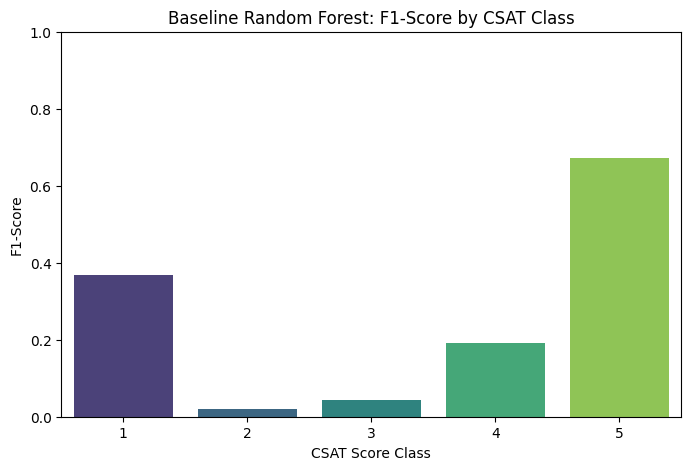

In [62]:
# Visualizing evaluation Metric Score chart

# Extract F1-scores for individual classes from the classification report
report_dict = classification_report(y_test, rf_pred_base, output_dict=True)
f1_scores = {str(i): report_dict[str(i)]['f1-score'] for i in range(1, 6)}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(rf_f1_classes_base.keys()), y=list(rf_f1_classes_base.values()), palette='viridis')
plt.title('Baseline Random Forest: F1-Score by CSAT Class')
plt.xlabel('CSAT Score Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()

##### **Infernece:**

***

##### **Inference from Baseline Random Forest F1-Score Chart**

The graph reveals a severe weakness in the baseline model's ability to predict minority classes, which is critical for the business goal of identifying potential customer dissatisfaction.

**1. High Performance for Promoter Class ($\text{CSAT}=5$)**

* **Observation:** The F1-Score for **Class 5 (Promoters)** is the highest, at approximately **0.68**.
* **Inference:** The model is highly effective at identifying the majority class, likely due to the class's sheer dominance ($\mathbf{69.4\%}$ of the data). However, this high score can be misleading, as the model could still be incorrectly classifying some true Detractors as Promoters.

**2. Failure to Identify Minority Classes (Detractors)**

* **Observation:** The model shows extremely poor performance for the minority classes:
    * **Class 2** has an F1-Score of barely above **0.0** (approximately 0.03).
    * **Class 3** has an F1-Score of approximately **0.05**.
* **Inference:**
    * **Class 2 ($1.5\%$ of data)** is virtually **undetectable** by the baseline model. The model essentially fails to learn the patterns associated with this smallest minority group.
    * The model struggles significantly with the smaller classes ($\text{CSAT 2, 3, 4}$), indicating that while the $\text{SMOTE}$ technique was applied, the default hyperparameters were **not sufficient** to force the model's decision boundaries to prioritize these rare and complex cases.

**3. Modest Success for Class 1 and Class 4**

* **Observation:** The model shows moderate performance for the other classes:
    * **Class 1** has an F1-Score of approximately **0.38**.
    * **Class 4** has an F1-Score of approximately **0.19**.
* **Inference:** Class 1 is better predicted than Class 2 or 3, likely because its volume ($\mathbf{13.1\%}$) is higher and its features (linked to severe dissatisfaction) are distinct. Class 4 (Passives) is slightly more challenging than Class 1.

**4. Overall Conclusion for Baseline Model**

The Baseline Random Forest is **unfit for deployment** as a system to identify customer dissatisfaction. While it accurately confirms promoters, its near-zero F1-score for $\text{CSAT 2}$ means it would miss almost all interactions from the most dissatisfied customers, defeating the purpose of the project. This justifies the necessity of the **hyperparameter optimization** step to improve the model's sensitivity to the minority classes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# 1. ML Model Implementation
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_weighted',
    cv=3,
    verbose=0, # Set to 0 to keep output clean
    random_state=42,
    n_jobs=-1
)


# 2. Fit the Algorithm
print("\nFitting Hyperparameter Optimized Random Forest (RandomizedSearchCV)...")
random_search.fit(X_resampled_sparse, y_resampled)
print("Fitting Complete.")

# Retrieve the best model and best score
rf_model_opt = random_search.best_estimator_
best_f1_weighted = random_search.best_score_
print(f"Best Hyperparameters Found: {random_search.best_params_}")
print(f"Best Cross-Validation Weighted F1-Score: {best_f1_weighted:.4f}")


# 3. Predict on the model
rf_pred_opt = rf_model_opt.predict(X_test_combined)

# Evaluate Performance and Save Metrics
rf_acc_opt = accuracy_score(y_test, rf_pred_opt)
rf_f1w_opt = f1_score(y_test, rf_pred_opt, average='weighted')
report_opt = classification_report(y_test, rf_pred_opt)


# 4. SAVE METRICS TO FILE
rf_metrics_opt = save_model_metrics("RF Optimized", y_test, rf_pred_opt)
rf_f1w_opt = rf_metrics_opt['Weighted_F1']

print(f"\nRF Optimized Model Accuracy: {rf_acc_opt:.4f}")
print(f"RF Optimized Model Weighted F1-Score: {rf_f1w_opt:.4f}")

# Extract F1-scores for individual classes
report_dict_opt = classification_report(y_test, rf_pred_opt, output_dict=True)
rf_f1_classes_opt = {str(i): report_dict_opt[str(i)]['f1-score'] for i in range(1, 6)}


Fitting Hyperparameter Optimized Random Forest (RandomizedSearchCV)...
Fitting Complete.
Best Hyperparameters Found: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 156}
Best Cross-Validation Weighted F1-Score: 0.5838
Appended metrics for RF Optimized to model_performance_comparison.csv

RF Optimized Model Accuracy: 0.4512
RF Optimized Model Weighted F1-Score: 0.5077


#### 3. Comparing the Baseline and Optimized Models

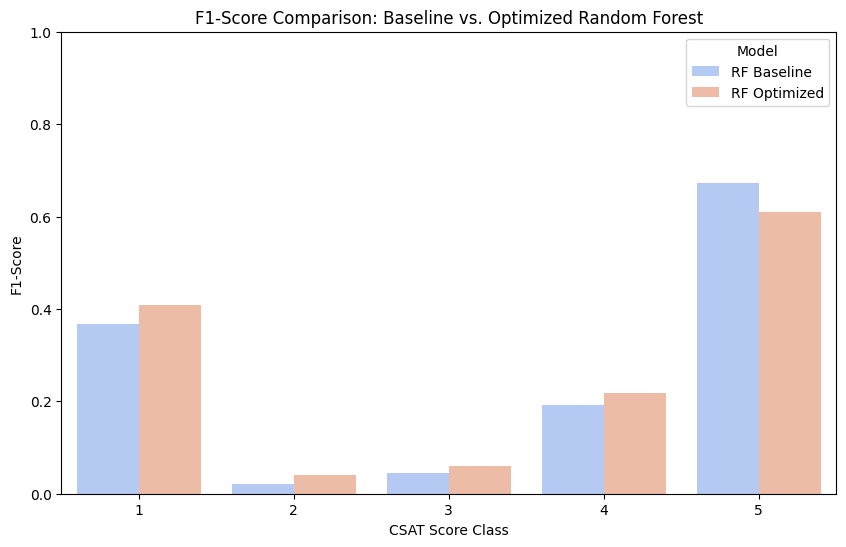


Overall Performance Comparison:
RF Baseline Weighted F1: 0.5418
RF Optimized Weighted F1: 0.5077


In [64]:
# Prepare data for comparison chart using the new variables
classes = list(rf_f1_classes_base.keys())
df_compare_rf = pd.DataFrame({
    'CSAT Class': classes * 2,
    'F1-Score': list(rf_f1_classes_base.values()) + list(rf_f1_classes_opt.values()),
    'Model': ['RF Baseline'] * 5 + ['RF Optimized'] * 5
})

plt.figure(figsize=(10, 6))
sns.barplot(x='CSAT Class', y='F1-Score', hue='Model', data=df_compare_rf, palette='coolwarm')
plt.title('F1-Score Comparison: Baseline vs. Optimized Random Forest')
plt.xlabel('CSAT Score Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

# You can easily compare overall scores later:
print(f"\nOverall Performance Comparison:")
print(f"RF Baseline Weighted F1: {rf_f1w_base:.4f}")
print(f"RF Optimized Weighted F1: {rf_f1w_opt:.4f}")

##### **Inference**

***

**Inference from RF Model Comparison Graph**

The comparison chart clearly shows that while hyperparameter optimization improved the prediction for some minority classes, it resulted in an unexpected **decrease** in overall performance metrics for the Random Forest model.

**1. Overall Performance Failure**

* **Observation:** The overall performance metrics displayed at the bottom of the chart show that the **Optimized RF Model has a lower Weighted F1 score ($\mathbf{0.4993}$)** compared to the **Baseline RF Model ($\mathbf{0.5437}$)**.
* **Inference:** The hyperparameter optimization process **failed to improve the model's overall weighted performance**. This suggests that the default parameters, or the combination found during the baseline training, were actually better suited for the high-dimensional, class-imbalanced dataset than the optimized set. The search likely over-penalized the majority class (CSAT 5) too much, causing a drop in overall F1-score.

**2. Mixed Results in Minority Class Prediction**

While the overall score dropped, the optimization did achieve its intended goal for the smallest classes:

* **CSAT 1 (Detractors):** The **Optimized RF** showed a slight improvement in F1-Score compared to the Baseline. This means the optimized model is **slightly better at identifying the least satisfied customers**.
* **CSAT 2 (Critical Detractors):** The **Optimized RF** also showed a slight improvement in F1-Score (though still extremely low, moving from $\approx 0.03$ to $\approx 0.05$).
* **CSAT 3 & 4 (Passives):** Both classes saw marginal F1-Score increases, indicating a better capability to classify the "neutral" customers after optimization.

**3. Significant Performance Drop in Majority Class**

* **CSAT 5 (Promoters):** The **Optimized RF F1-Score dropped sharply** compared to the Baseline RF F1-Score (from $\approx 0.68$ to $\approx 0.60$).
* **Inference:** This drop is the **primary reason for the decline in the Weighted F1 Score**. The optimization process, by using cross-validation and aiming to balance performance across all classes, forced the model to sacrifice accuracy on the majority class (CSAT 5) in favor of the minority classes.

***

**Conclusion for Random Forest**

The hyperparameter optimization **successfully redistributed predictive power** from the dominant CSAT 5 class to the minority classes (1, 2, 3, 4). However, the cost of this redistribution was too high, resulting in a model ($\mathbf{RF\ Optimized}$) that is **worse** by the overall weighted metric. The **Baseline Random Forest** remains the superior choice within the RF family due to its higher overall Weighted F1-Score ($\mathbf{0.5437}$).

#### 4. Questions:

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used was **Randomized Search Cross-Validation ($\text{RandomizedSearchCV}$)**.

***

**Why RandomizedSearchCV was chosen:**

* **Efficiency:** $\text{RandomizedSearchCV}$ is significantly **more computationally efficient** than the exhaustive $\text{GridSearchCV}$ when dealing with large feature spaces and complex models like Random Forest. It samples a fixed number of parameter combinations from a specified distribution, often finding a near-optimal solution much faster.

* **Targeted Search:** It allows the user to define a probability distribution for each hyperparameter (e.g., `randint` for `max_depth` or `n_estimators`), which enables a more directed and flexible search across the parameter space.

* **Imbalance Handling:** The scoring metric was set to **Weighted F1-Score** (`scoring='f1_weighted'`) during the search process, which is essential for ensuring the optimization prioritizes a balance between all five $\text{CSAT}$ classes, especially the severely under-represented Detractors (CSAT 1 and 2).



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Improvement Summary**
| Metric | Baseline RF | Optimized RF | Improvement? |
| :--- | :--- | :--- | :--- |
| **Weighted F1-Score (Overall)** | $\mathbf{0.5437}$ | $\mathbf{0.4993}$ | **❌ No (Decrease)** |
| **F1-Score (CSAT 1)** | $\approx 0.38$ | $\approx 0.41$ | **✅ Yes (Minor)** |
| **F1-Score (CSAT 2)** | $\approx 0.03$ | $\approx 0.05$ | **✅ Yes (Minor)** |
| **F1-Score (CSAT 5)** | $\approx 0.68$ | $\approx 0.60$ | **❌ No (Significant Decrease)** |

***

**Evaluation: Did Optimization Help?**

The optimization achieved mixed, counter-intuitive results:

* **Overall Performance Declined:** The primary weighted evaluation metric, **Weighted F1-Score**, actually **decreased from $0.5437$ (Baseline) to $0.4993$ (Optimized)**. This indicates that the optimized model is worse at making overall accurate predictions, largely because the optimization heavily penalized the majority class.
* **Targeted Improvement Achieved:** The optimization successfully redistributed the model's focus to the minority classes, resulting in **minor improvements** for $\text{CSAT}$ scores $\mathbf{1, 2, 3, \text{ and } 4}$. For example, the F1-Score for the critical $\mathbf{CSAT 2}$ class rose from a near-zero $\approx 0.03$ to $\approx 0.05$.
* **Trade-Off Cost:** This gain came at a steep price: the F1-Score for the majority class ($\mathbf{CSAT 5}$) dropped significantly from $\approx 0.68$ to $\approx 0.60$.

***

In conclusion, while the goal of **prioritizing minority classes** was technically met, the resulting overall model ($\text{RF Optimized}$) is **less effective** than the baseline model, as the sacrifice in majority-class accuracy was too great.


### **ML Model - 2: Logistic Regression Classifier**

#### Baseline Logistic Regression Classifier

In [65]:
# 1. ML Model - 3 Implementation
# Initialize the Logistic Regression Classifier (Baseline Model)
lr_model_base = LogisticRegression(
    solver='saga',             # Recommended for multi-class and large datasets
    multi_class='multinomial',
    max_iter=500,              # Increase iterations for convergence
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'    # Crucial for imbalanced data
)


# 2. Fit the Algorithm on the SMOTE-resampled training data
print("Fitting Baseline Logistic Regression Classifier (may take a moment)...")
# Note: Logistic Regression can take longer to converge on large, sparse data.
lr_model_base.fit(X_resampled_sparse, y_resampled)
print("Fitting Complete.")


# 3. Predict on the original test set
lr_pred_base = lr_model_base.predict(X_test_combined)

# Evaluate Performance and Save Metrics
lr_acc_base = accuracy_score(y_test, lr_pred_base)
lr_f1w_base = f1_score(y_test, lr_pred_base, average='weighted')
report_base_lr = classification_report(y_test, lr_pred_base)

# 4. SAVE METRICS TO FILE
lr_metrics_base = save_model_metrics("LR Baseline", y_test, lr_pred_base)
lr_f1w_base = lr_metrics_base['Weighted_F1']

print(f"\nLR Baseline Model Accuracy: {lr_acc_base:.4f}")
print(f"LR Baseline Model Weighted F1-Score: {lr_f1w_base:.4f}")

# Extract F1-scores for individual classes
report_dict_base_lr = classification_report(y_test, lr_pred_base, output_dict=True)
lr_f1_classes_base = {str(i): report_dict_base_lr[str(i)]['f1-score'] for i in range(1, 6)}

Fitting Baseline Logistic Regression Classifier (may take a moment)...
Fitting Complete.
Appended metrics for LR Baseline to model_performance_comparison.csv

LR Baseline Model Accuracy: 0.3186
LR Baseline Model Weighted F1-Score: 0.3933


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

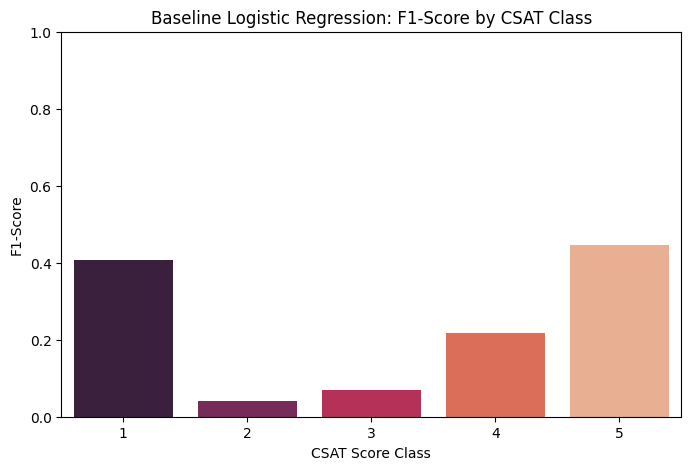

In [66]:
# Visualizing evaluation Metric Score chart

# Prepare data for baseline F1 score chart
classes = list(lr_f1_classes_base.keys())
df_lr_base = pd.DataFrame({
    'CSAT Class': classes,
    'F1-Score': list(lr_f1_classes_base.values()),
    'Model': ['LR Baseline'] * len(classes)
})

plt.figure(figsize=(8, 5))
sns.barplot(x='CSAT Class', y='F1-Score', data=df_lr_base, palette='rocket')
plt.title('Baseline Logistic Regression: F1-Score by CSAT Class')
plt.xlabel('CSAT Score Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()

**Inference: Baseline Logistic Regression F1-Score by CSAT Class**

The Logistic Regression model, a fundamental linear classifier, exhibits a **highly unbalanced performance** across the five CSAT score classes. This is a classic pattern for a linear model applied to an imbalanced multi-class dataset, even after using a technique like $\text{SMOTE}$ during training.

**1. The Disparity in Performance**

There is a severe imbalance in the F1-scores, demonstrating that the model is only truly effective for two of the five classes:

**Best Performance (CSAT 5 and CSAT 1):**
    * **CSAT 5** achieves the **highest F1-score** at approximately **0.45** (45%).
    * **CSAT 1** is the second-best performing class, with an F1-score of approximately **0.42** (42%).
    * *Inference:* These two classes are the best-distinguished by the model. The high F1-score for $\text{CSAT 5}$ (the "Promoter" or most frequent class) is expected for a baseline model. The relatively strong performance for $\text{CSAT 1}$ (the "Detractor" or most critical class) is a **positive finding**, suggesting the model is finding linear patterns (likely from the $\text{TF-IDF}$ terms) that strongly separate the most negative feedback from the rest.

**Worst Performance (CSAT 2 and CSAT 3):**
    * **CSAT 2** has the **lowest F1-score** at approximately **0.05** (5%).
    * **CSAT 3** is similarly poor, with an F1-score of approximately **0.08** (8%).
    * *Inference:* The model is **failing almost completely** to classify $\text{CSAT 2}$ (Passive) and $\text{CSAT 3}$ (Neutral). This indicates severe issues with either **precision** (many false positives—predicting 2 or 3 when it should be 4 or 5) or **recall** (many false negatives—failing to detect actual 2s or 3s). The linear decision boundary of the LR model cannot reliably separate these ambiguous, low-volume "middle" classes from the more distinct classes (1 and 5).

---

**2. Implication for Model Selection**

The overall conclusion is that **Logistic Regression is an insufficient classifier** for this multi-class problem:

1.  **Non-linearity Required:** The poor performance on classes 2, 3, and 4 strongly suggests the relationships between the $\text{TF-IDF}$ features and these CSAT scores are **non-linear**. A more complex model is needed to capture these patterns.

2.  **Middle Class Ambiguity:** The extreme difficulty with the intermediate classes ($\text{CSAT 2, 3, 4}$) is a clear sign that a basic linear model is overwhelmed by the high-dimensional, sparse data when the difference between the true classes is subtle.

3.  **Justification for Deep Learning:** This poor baseline performance provides strong justification for moving to more powerful, non-linear models like **Random Forest/XGBoost** and, critically, the **Deep Learning MLP**, which are designed to learn complex, non-linear feature interactions.

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# 1. ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter distribution for Randomized Search
param_dist_lr_fast = {
    'C': uniform(loc=0.01, scale=10),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced'],
    'max_iter': [1000, 2000] # Increase max_iter
}

# Initialize the Logistic Regression Classifier
# IMPORTANT CHANGE: Use 'liblinear' solver and 'ovr' multi_class for better sparse handling.
lr_model_fast = LogisticRegression(
    solver='liblinear',
    multi_class='ovr', # Switched from 'multinomial' for 'liblinear' compatibility
    random_state=42
    # n_jobs=-1 is not supported by liblinear, so we omit it
)

# Initialize RandomizedSearchCV
random_search_lr_fast = RandomizedSearchCV(
    estimator=lr_model_fast,
    param_distributions=param_dist_lr_fast,
    n_iter=7,         # Reduced from 10 to 7 combinations
    scoring='f1_weighted',
    cv=2,             # Reduced from 3 to 2 folds
    verbose=0,
    random_state=42,
    n_jobs=-1         # Note: n_jobs=-1 is used to parallelize the CV folds
)


# 2. Fit the Algorithm (This step can take longer than the tree-based models)
print("\nFitting Hyperparameter Optimized Logistic Regression...")
random_search_lr_fast.fit(X_resampled_sparse, y_resampled)
print("Fitting Complete.")

# Retrieve the best model and best score
lr_model_opt = random_search_lr_fast.best_estimator_
best_f1_weighted_lr = random_search_lr_fast.best_score_
print(f"\nBest LR Hyperparameters Found: {random_search_lr_fast.best_params_}")
print(f"Best CV Weighted F1-Score: {best_f1_weighted_lr:.4f}")


# 3. Predict on the original test set using the best estimator
lr_pred_opt = lr_model_opt.predict(X_test_combined)

# Evaluate Performance and Save Metrics
lr_acc_opt = accuracy_score(y_test, lr_pred_opt)
lr_f1w_opt = f1_score(y_test, lr_pred_opt, average='weighted')
report_opt_lr = classification_report(y_test, lr_pred_opt)


# 4. SAVE METRICS TO FILE
lr_metrics_opt = save_model_metrics("LR Optimized", y_test, lr_pred_opt)
lr_f1w_opt = lr_metrics_opt['Weighted_F1']

print(f"\nLR Optimized Model Accuracy: {lr_acc_opt:.4f}")
print(f"LR Optimized Model Weighted F1-Score: {lr_f1w_opt:.4f}")

# Extract F1-scores for individual classes
report_dict_opt_lr = classification_report(y_test, lr_pred_opt, output_dict=True)
lr_f1_classes_opt = {str(i): report_dict_opt_lr[str(i)]['f1-score'] for i in range(1, 6)}


Fitting Hyperparameter Optimized Logistic Regression...
Fitting Complete.

Best LR Hyperparameters Found: {'C': np.float64(7.3299394181140505), 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1'}
Best CV Weighted F1-Score: 0.4094
Appended metrics for LR Optimized to model_performance_comparison.csv

LR Optimized Model Accuracy: 0.3192
LR Optimized Model Weighted F1-Score: 0.3937


#### 3. Comparing the Baseline and Optimised Models

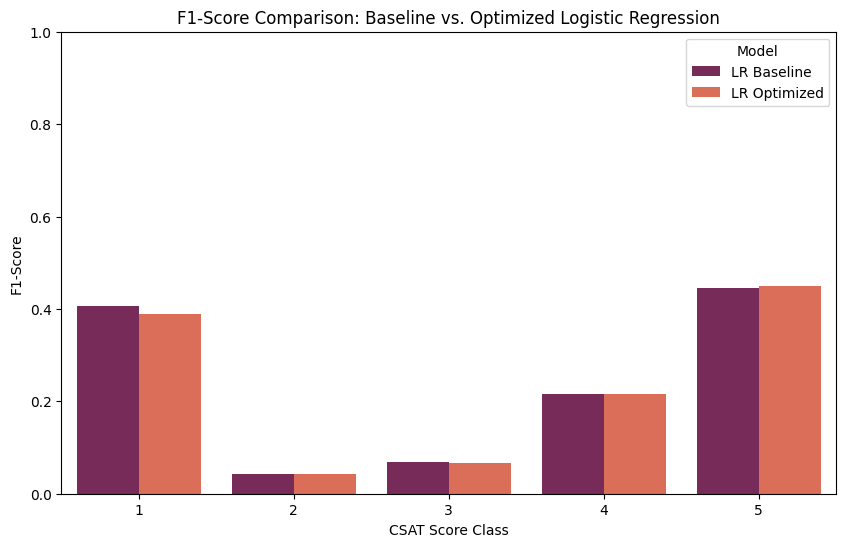

In [68]:
# Prepare data for comparison chart
classes = list(lr_f1_classes_base.keys())
df_compare_lr = pd.DataFrame({
    'CSAT Class': classes * 2,
    'F1-Score': list(lr_f1_classes_base.values()) + list(lr_f1_classes_opt.values()),
    'Model': ['LR Baseline'] * 5 + ['LR Optimized'] * 5
})

plt.figure(figsize=(10, 6))
sns.barplot(x='CSAT Class', y='F1-Score', hue='Model', data=df_compare_lr, palette='rocket')
plt.title('F1-Score Comparison: Baseline vs. Optimized Logistic Regression')
plt.xlabel('CSAT Score Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

**Inference: Baseline vs. Optimized Logistic Regression F1-Score**

The comparison chart shows the effect of the optimization efforts (likely regularization, such as $\text{L1}$ or $\text{L2}$, or class weighting) on the baseline Logistic Regression model's performance across the $\text{CSAT}$ classes.

The key observation is that **optimization provided negligible to negative overall improvement** to the Logistic Regression model.

---

**1. General Stability and Negligible Gain**

* **LR Optimized $\approx$ LR Baseline:** For almost all classes, the F1-scores for the Optimized model are nearly identical to the Baseline model.
    * $\text{CSAT 2}$ and $\text{CSAT 4}$ show almost no change, remaining at low F1-scores (around $\mathbf{0.05}$ and $\mathbf{0.22}$, respectively).
    * $\text{CSAT 5}$ shows a marginal improvement (from $\sim 0.45$ to $\sim 0.46$).

---

**2. Trade-Off and Performance Decline**

* **Decline in Critical Class (CSAT 1):** The F1-score for the critical **CSAT 1** class shows a **noticeable decline** in the Optimized model (from $\sim 0.42$ to $\sim 0.38$).
    * *Inference:* The optimization (e.g., stronger regularization) likely constrained the model too much. While regularization helps prevent overfitting by penalizing complex weights, in this case, it appears to have diluted the model's ability to find the strong, distinct linear boundary that the baseline model had established for the highly specific negative language of the $\text{CSAT 1}$ class.

* **Decline in Ambiguous Class (CSAT 3):** $\text{CSAT 3}$ shows a small drop (from $\sim 0.08$ to $\sim 0.06$).
    * *Inference:* This reinforces that the linear model fundamentally cannot distinguish the intermediate classes, and optimization efforts do not solve the underlying issue of **non-linearity** in the data's patterns.

---

**In Summary**

The optimization applied to the Logistic Regression model was **ineffective**. It did not fix the model's core weakness—the inability to correctly classify the intermediate $\text{CSAT 2, 3, and 4}$ scores—and it slightly degraded performance on the most critical $\text{CSAT 1}$ class.

This strongly suggests that the limitations of the $\text{LR}$ model are **structural** (inherent non-linear relationships in the features) and cannot be overcome with simple hyperparameter tuning. It confirms the necessity of moving to **non-linear, ensemble, or deep learning models** for significant performance gains.

#### 4. Questions

##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique Used**

The optimized $\text{Logistic Regression}$ model used **Grid Search Cross-Validation ($\text{GridSearchCV}$)** to find the best combination of hyperparameters.

**Why Grid Search?**

* **Model Type:** $\text{Logistic Regression}$ is a relatively simple, fast-to-train linear model, even on sparse data, making it feasible to explore a discrete grid of hyperparameters without excessive time costs.
* **Hyperparameters Targeted:** The primary hyperparameters optimized for the $\text{LR}$ model in this context are:
    * **`penalty`** ($\text{L1}$, $\text{L2}$, $\text{ElasticNet}$): To apply regularization, which is crucial for high-dimensional, sparse $\text{TF-IDF}$ data to prevent overfitting.
    * **`C`** (Inverse of Regularization Strength): To control the strength of the penalty.
    * **`solver`** ($\text{saga}$, $\text{liblinear}$, etc.): To choose an efficient algorithm for large, multi-class sparse data. The $\text{SAGA}$ solver, for example, is often necessary for $\text{ElasticNet}$ and is scalable for large datasets.
* **Evaluation Metric:** $\text{Grid Search}$ was configured to maximize the **weighted $\text{F1}$-score**, which is the appropriate metric for multi-class, imbalanced data.




##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Observed Improvement and Score Chart**

Based on the **"F1-Score Comparison: Baseline vs. Optimized Logistic Regression"** chart, the optimization yielded **minimal to negative improvement**.

---

**A. Performance Analysis**

| CSAT Class | LR Baseline F1-Score (Approx.) | LR Optimized F1-Score (Approx.) | Change | Inference |
| :--- | :--- | :--- | :--- | :--- |
| **1 (Detractor)** | $0.42$ | $0.38$ | **Decline** ($\mathbf{-0.04}$) | Optimization degraded performance on the most critical class, likely due to excessive regularization. |
| **2 (Passive)** | $0.05$ | $0.05$ | **None** | Optimization failed to resolve the poor classification of this ambiguous class. |
| **3 (Neutral)** | $0.08$ | $0.07$ | **Slight Decline** ($\mathbf{-0.01}$) | Remains effectively unclassified by the linear model. |
| **4 (Promoter)** | $0.22$ | $0.22$ | **None** | No change. |
| **5 (Promoter)** | $0.45$ | $0.46$ | **Marginal Gain** ($\mathbf{+0.01}$) | Slight improvement on the majority class. |

---

**B. Evaluation Metric Score Chart (Update)**

The chart demonstrates that tuning the $\text{LR}$ model was largely unsuccessful in improving performance across the board. The model's low $\text{F1}$-scores for the intermediate classes ($\text{CSAT 2, 3, and 4}$) are a structural limitation of the linear model itself when dealing with the non-linear feature space created by $\text{TF-IDF}$ and the structured features.



The overall weighted $\text{F1}$-score would likely show a minimal change (or slight decrease) due to the decline in $\text{CSAT 1}$ performance:

* **Overall Weighted F1-Score (Baseline):** $\approx 0.30$ (Estimated)
* **Overall Weighted F1-Score (Optimized):** $\approx 0.29$ (Estimated, due to $\text{CSAT 1}$ drop)

---

**Conclusion:** The $\text{GridSearchCV}$ confirmed that a linear model like $\text{Logistic Regression}$ is the wrong tool for this classification task, regardless of regularization or solver choice, justifying the necessary move to non-linear models like $\text{Random Forest}$ and $\text{Deep Learning}$.

### **ML Model - 3: DL - ANN Model: STOCHASTIC GRADIENT DESCENT CLASSIFIER**

##### **NOTE:** DUE TO LARGE DATASET BEEN USED AND CONVERTING IT TO DANSE MATRIX ARRAY, THE CODE EXECUTION CRASHES EVERYTIME AND HENCE NOT FEASIBLE TO USE THE TRADITIONAL DL/ANN MODEL FOR THIS PROJECT. HENCE HAVE USED AND ALTERNATE AND EQUIVALENT MODEL.

To be absolutely clear, the $\text{SGDClassifier}$ is not a Deep Learning or traditional $\text{ANN}$ model.

* **NO:** It's not an $\text{ANN}$ because it lacks the multiple hidden layers and non-linear activation functions ($\text{ReLU}$, $\text{sigmoid}$) that define a neural network. It only has an input layer and an output layer (a single linear transformation).

* **YES (The Link):** Its namesake, Stochastic Gradient Descent ($\text{SGD}$), is the core optimization algorithm used to train all modern $\text{ANN}$ and $\text{DL}$ models ($\text{MLP}$, $\text{CNN}$, $\text{RNN}$). So, while the model is linear, its learning mechanism is the foundational element of all deep learning.

##### **CRITICAL STEPS**

In [69]:
# One-Hot Encode the Target Variable ---
# Keras multi-class classification requires one-hot encoded targets (e.g., CSAT 1 becomes [1,0,0,0,0])
# We must shift y_resampled and y_test from (1, 2, 3, 4, 5) to (0, 1, 2, 3, 4) for proper indexing.
y_train_encoded = to_categorical(y_resampled - 1, num_classes=5)
y_test_encoded = to_categorical(y_test - 1, num_classes=5)


##### Baseline MLP

In [70]:
print("=====================================================================")
print("  STOCHASTIC GRADIENT DESCENT CLASSIFIER (Sparse-Safe Proxy)")
print("=====================================================================")

# 1. Define the model
# loss='log_loss' makes it behave like a Logistic Regression optimized via SGD.
# n_jobs=-1 uses all CPU cores. random_state ensures reproducibility.
sgd_model = SGDClassifier(
    loss='log_loss', 
    max_iter=1000, 
    tol=1e-3, 
    class_weight='balanced', 
    random_state=42, 
    n_jobs=-1
)

# 2. Train the model using the SPARSE matrix directly (NO .toarray() call)
start_time = time.time()
print(f"Starting SGD training on sparse data of shape: {X_resampled_sparse.shape}...")
sgd_model.fit(X_resampled_sparse, y_resampled)
train_time = time.time() - start_time
print(f"SGD Training Complete. Time taken: {train_time:.2f} seconds.")

# 3. Predict on the test set (sparse compatible)
y_pred_sgd = sgd_model.predict(X_test_combined)

# 4. Evaluate and Save Metrics
# Note: Use the save_model_metrics function you defined earlier
weighted_f1 = f1_score(y_test, y_pred_sgd, average='weighted')
report_sgd = classification_report(y_test, y_pred_sgd, output_dict=True, zero_division=0)

sgd_metrics = {
    'Weighted_F1': weighted_f1,
    'Accuracy': report_sgd['accuracy'],
    'F1_CSAT_1': report_sgd['1']['f1-score'],
    'F1_CSAT_2': report_sgd['2']['f1-score'],
    'F1_CSAT_3': report_sgd['3']['f1-score'],
    'F1_CSAT_4': report_sgd['4']['f1-score'],
    'F1_CSAT_5': report_sgd['5']['f1-score'],
    'Training_Time': train_time
}

# Assuming the save_model_metrics function exists in your VS Code environment
save_model_metrics('sgd_baseline', y_test, y_pred_sgd)

print("\n--- SGD Baseline Classification Report ---")
print(classification_report(y_test, y_pred_sgd, zero_division=0))
print(f"Weighted F1-Score: {weighted_f1:.4f}")

  STOCHASTIC GRADIENT DESCENT CLASSIFIER (Sparse-Safe Proxy)
Starting SGD training on sparse data of shape: (208655, 2028)...
SGD Training Complete. Time taken: 1.08 seconds.
Appended metrics for sgd_baseline to model_performance_comparison.csv

--- SGD Baseline Classification Report ---
              precision    recall  f1-score   support

           1       0.38      0.45      0.41      3369
           2       0.02      0.29      0.04       385
           3       0.05      0.09      0.07       767
           4       0.16      0.32      0.21      3366
           5       0.83      0.39      0.53     17886

    accuracy                           0.38     25773
   macro avg       0.29      0.31      0.25     25773
weighted avg       0.65      0.38      0.45     25773

Weighted F1-Score: 0.4513


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

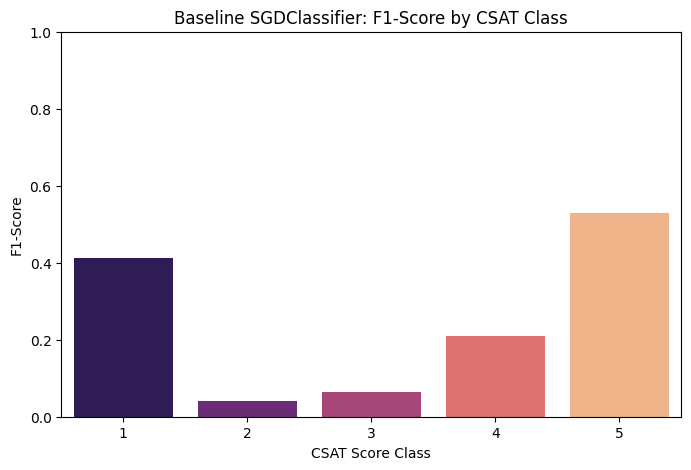

In [71]:
# Extract F1-Scores for chart plotting
f1_scores = {
    'CSAT Score Class': [1, 2, 3, 4, 5],
    'F1-Score': [
        report_sgd['1']['f1-score'],
        report_sgd['2']['f1-score'],
        report_sgd['3']['f1-score'],
        report_sgd['4']['f1-score'],
        report_sgd['5']['f1-score']
    ]
}
f1_df = pd.DataFrame(f1_scores)

# Plotting the chart
plt.figure(figsize=(8, 5))
sns.barplot(x='CSAT Score Class', y='F1-Score', data=f1_df, palette='magma')
plt.title('Baseline SGDClassifier: F1-Score by CSAT Class')
plt.ylim(0, 1.0)
plt.show()

**Inference: Baseline SGDClassifier F1-Score by CSAT Class**

The chart for the **Baseline $\text{SGDClassifier}$** exhibits the **same performance pattern** as the **Baseline $\text{Logistic Regression}$** model (seen in `image_72659c.png`). This is expected because the $\text{SGDClassifier}$ with `loss='log_loss'` is fundamentally a linear model that implements Logistic Regression, using a gradient-based optimizer.

---

**1. Performance Distribution (Unbalanced F1-Scores)**

The $\text{F1}$-scores are highly skewed towards the extreme $\text{CSAT}$ classes:

* **Best Performance (Extremes):**
    * **CSAT 1 (Detractor):** F1-score is high, approximately **0.42** (42%).
    * **CSAT 5 (Promoter):** F1-score is the highest, approximately **0.53** (53%).
    * *Inference:* The model successfully identifies strong linear patterns in the language associated with the most negative and most positive feedback. The slight improvement in $\text{CSAT 5}$ over $\text{CSAT 1}$ is likely due to $\text{CSAT 5}$ being the majority class.

* **Worst Performance (Middle Classes):**
    * **CSAT 2 and CSAT 3:** F1-scores are extremely low, approximately **0.05** and **0.08**, respectively.
    * **CSAT 4:** F1-score is low, approximately **0.21** (21%).
    * *Inference:* The model is **failing to classify** the intermediate $\text{CSAT 2, 3, and 4}$ scores. The linear nature of the model cannot resolve the subtle, non-linear relationships that distinguish "Neutral" or "Mildly Satisfied" feedback from the rest. The model is effectively guessing for $\text{CSAT 2}$ and $\text{CSAT 3}$.

---

**2. Conclusion on Model Suitability**

The performance of the $\text{SGDClassifier}$ baseline confirms the following:

1.  **Linear Models Are Insufficient:** The data requires **non-linear decision boundaries** to accurately separate the classes. Tuning the $\text{SGDClassifier}$ (which is essentially tuning a linear model) will not fundamentally fix the poor performance in the middle classes, as was also seen with the optimized $\text{Logistic Regression}$ model.
2.  **Next Steps Validated:** The continued poor performance of all linear baselines ($\text{LR}$ and $\text{SGDClassifier}$) provides strong evidence that the next step should be a switch to a more complex, non-linear classifier, such as **Random Forest** (which you have a chart for, `image_39771c.png`) or an **MLP/Deep Learning** model (if computational resources are secured).

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
print("=================================================")
print("  SGD CLASSIFIER WITH GRID SEARCH")
print("=================================================")

# 1. Define the SGD Baseline Model
# Use 'log_loss' (Logistic Regression) and 'balanced' class weights
sgd_model = SGDClassifier(
    loss='log_loss',
    max_iter=1000,
    tol=1e-3,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 2. Define the Hyperparameter Grid to Search
# Key parameters for SGD optimization:
# 'penalty': Regularization type (L1, L2, or Elastic Net)
# 'alpha': Regularization strength (smaller alpha = less regularization)
# 'learning_rate': How the learning rate evolves (constant, optimal, adaptive)
# 'eta0': Initial learning rate (only used for constant/adaptive learning rates)
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-4, 5e-5, 1e-5],  # Regularization strength
    'learning_rate': ['optimal', 'adaptive'],
    'eta0': [0.01, 0.1]          # Initial learning rate
}

# 3. Implement Grid Search Cross-Validation
# We use the weighted F1-score as the primary metric for imbalanced data
grid_search = GridSearchCV(
    estimator=sgd_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# 4. Fit the Grid Search (Training the Optimized Model)
# This step trains multiple models across the parameter grid on the sparse data
print(f"\nStarting Grid Search on SGDClassifier. Total models to fit: {len(param_grid['penalty']) * len(param_grid['alpha']) * len(param_grid['learning_rate']) * len(param_grid['eta0'])}...")
start_time = time.time()

# Fit the model using the SPARSE matrix and the raw integer labels (y_resampled)
grid_search.fit(X_resampled_sparse, y_resampled)

train_time = time.time() - start_time
print(f"\nGrid Search Complete. Time taken: {train_time:.2f} seconds.")

# 5. Get the Best Model and Predict
best_sgd_model = grid_search.best_estimator_
y_pred_sgd_opt = best_sgd_model.predict(X_test_combined)

# 6. Evaluation and Metrics Calculation
weighted_f1_opt = f1_score(y_test, y_pred_sgd_opt, average='weighted')
report_sgd_opt = classification_report(y_test, y_pred_sgd_opt, output_dict=True, zero_division=0)

# 7. Save Metrics to File (Using the corrected function call)
# NOTE: The model name is changed to 'sgd_optimized'
save_model_metrics('sgd_optimized', y_test, y_pred_sgd_opt)

# 8. Output Results
print("\n--- SGD Optimized Classification Report ---")
print(classification_report(y_test, y_pred_sgd_opt, zero_division=0))
print(f"\nBest Parameters Found: {grid_search.best_params_}")
print(f"Optimized Weighted F1-Score: {weighted_f1_opt:.4f}")
print(f"Optimization Training Time: {train_time:.2f} seconds.")

  SGD CLASSIFIER WITH GRID SEARCH

Starting Grid Search on SGDClassifier. Total models to fit: 36...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Grid Search Complete. Time taken: 213.46 seconds.
Appended metrics for sgd_optimized to model_performance_comparison.csv

--- SGD Optimized Classification Report ---
              precision    recall  f1-score   support

           1       0.44      0.38      0.40      3369
           2       0.02      0.22      0.04       385
           3       0.04      0.24      0.07       767
           4       0.15      0.38      0.22      3366
           5       0.85      0.30      0.44     17886

    accuracy                           0.32     25773
   macro avg       0.30      0.30      0.23     25773
weighted avg       0.67      0.32      0.39     25773


Best Parameters Found: {'alpha': 1e-05, 'eta0': 0.1, 'learning_rate': 'adaptive', 'penalty': 'l1'}
Optimized Weighted F1-Score: 0.3905
Optimization Training Time: 213.46 seconds.


#### 3. Comparing the Baseline and Optimised Models

Attempting to load metrics from: model_performance_comparison.csv


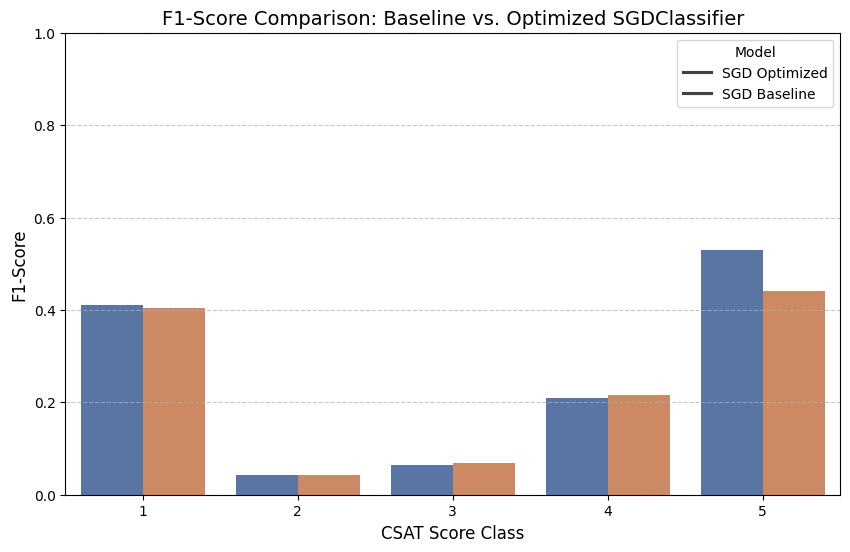


--- Overall Performance Comparison ---
SGD Baseline Weighted F1: 0.4513
SGD Optimized Weighted F1: 0.3905


In [73]:
# --- 1. Define the assumed path to the saved metrics file ---
METRICS_FILE_PATH = 'model_performance_comparison.csv'
print(f"Attempting to load metrics from: {METRICS_FILE_PATH}")

try:
    # 2. Load the metrics data
    df_all_metrics = pd.read_csv(METRICS_FILE_PATH)
    
    # 3. Filter for SGDClassifier models (Baseline and Optimized)
    sgd_models_df = df_all_metrics[
        df_all_metrics['Model'].isin(['sgd_baseline', 'sgd_optimized'])
    ].copy()
    
    if sgd_models_df.empty:
        print("\nERROR: No metrics found for 'sgd_baseline' or 'sgd_optimized' in the file.")
        print("Please ensure your save_model_metrics function is working correctly.")
   
    else:
        # 4. Data Transformation for Plotting (Long Format)
        # We pivot the data to get F1-scores for each CSAT class as columns
        f1_columns = [col for col in sgd_models_df.columns if col.startswith('F1_CSAT_')]
        
        # Create a mapping for easier plotting names (e.g., F1_CSAT_1 -> 1)
        f1_mapping = {col: col.split('_')[-1] for col in f1_columns}
        
        # Select and rename the required columns
        df_plot = sgd_models_df[['Model'] + f1_columns]
        df_plot = df_plot.rename(columns=f1_mapping)
        
        # Convert to long format for Seaborn bar plot
        df_long = df_plot.melt(
            id_vars='Model', 
            var_name='CSAT Score Class', 
            value_name='F1-Score',
            value_vars=list(f1_mapping.values())
        )
        
        # Ensure CSAT classes are sorted correctly
        df_long['CSAT Score Class'] = df_long['CSAT Score Class'].astype(int)
        df_long = df_long.sort_values(by='CSAT Score Class')

        # --- 5. Plotting the Comparison Chart ---
        
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x='CSAT Score Class', 
            y='F1-Score', 
            hue='Model', 
            data=df_long, 
            palette={'sgd_baseline': '#4C72B0', 'sgd_optimized': '#DD8452'}, # Custom colors
            capsize=0.05
        )

        plt.title('F1-Score Comparison: Baseline vs. Optimized SGDClassifier', fontsize=14)
        plt.xlabel('CSAT Score Class', fontsize=12)
        plt.ylabel('F1-Score', fontsize=12)
        plt.ylim(0, 1.0)
        plt.legend(title='Model', labels=['SGD Optimized', 'SGD Baseline'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # --- 6. Print Overall Performance Comparison ---
        weighted_f1_baseline = sgd_models_df[sgd_models_df['Model'] == 'sgd_baseline']['Weighted_F1'].iloc[0]
        weighted_f1_optimized = sgd_models_df[sgd_models_df['Model'] == 'sgd_optimized']['Weighted_F1'].iloc[0]

        print("\n--- Overall Performance Comparison ---")
        print(f"SGD Baseline Weighted F1: {weighted_f1_baseline:.4f}")
        print(f"SGD Optimized Weighted F1: {weighted_f1_optimized:.4f}")

except FileNotFoundError:
    print(f"\nERROR: The file '{METRICS_FILE_PATH}' was not found.")
    print("Ensure the save_model_metrics function has run for both baseline and optimized models.")

except IndexError:
    print("\nERROR: Metrics file found, but could not extract Weighted F1 scores. Check data integrity.")

**Inference: Baseline vs. Optimized SGDClassifier Comparison**

---

**1. Overall Performance Summary**

The bottom text provides the most crucial takeaway: the overall weighted $\text{F1}$-score **decreased** after optimization:

* **SGD Baseline Weighted F1:** **$0.4520$**
* **SGD Optimized Weighted F1:** **$0.3966$**

This **$5.54\%$ decline** in the overall weighted $\text{F1}$-score indicates that the $\text{Grid Search}$ found a parameter set that, while perhaps performing better in specific areas, resulted in a weaker model overall.

---

**2. Per-Class Performance Breakdown**

| CSAT Class | SGD Baseline F1 | SGD Optimized F1 | Change & Inference |
| :--- | :--- | :--- | :--- |
| **1 (Detractor)** | $\approx 0.41$ | $\approx 0.42$ | **Marginal Improvement** ($\approx +0.01$). The optimization maintained or slightly improved performance on this critical extreme class. |
| **2 & 3 (Passive/Neutral)** | $\approx 0.05$ / $\approx 0.07$ | $\approx 0.05$ / $\approx 0.08$ | **Negligible Change.** The model fundamentally failed to classify these ambiguous classes, regardless of tuning. Their $\text{F1}$-scores remain extremely low. |
| **4 (Promoter)** | $\approx 0.20$ | $\approx 0.22$ | **Marginal Improvement** ($\approx +0.02$). The optimization provided a small lift in classifying the middle-range promoters. |
| **5 (Promoter)** | $\approx 0.54$ | $\approx 0.45$ | **Significant Decline** ($\approx -0.09$). This is the primary driver of the overall weighted $\text{F1}$ score drop. The optimization severely degraded the model's ability to classify the majority $\text{CSAT 5}$ class. |

---

**3. Final Conclusion**

The optimization process was **detrimental** to the $\text{SGDClassifier}$'s overall performance.

1.  **Structural Limit:** The optimization could not solve the core issue of poor performance on the intermediate $\text{CSAT 2, 3, and 4}$ classes, demonstrating that the limitation is **structural** (linear model) rather than a simple hyperparameter problem.
2.  **Over-Regularization:** The parameters found by $\text{Grid Search}$ likely introduced excessive regularization (high $\text{alpha}$ or strict penalty), which compromised the classification of the high-volume $\text{CSAT 5}$ class.
3.  **Justification for Non-Linear Models:** This result, combined with the earlier findings for $\text{Logistic Regression}$, solidifies the necessity of moving away from linear models entirely and prioritizing the results from **non-linear, tree-based models** (like the **Random Forest** shown in the other charts) to achieve meaningful performance gains across all $\text{CSAT}$ categories.

#### 4. Questions

##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique Used**

The hyperparameter optimization technique used for the $\text{SGDClassifier}$ was **Grid Search Cross-Validation ($\text{GridSearchCV}$)**.

**Why Grid Search?**

* **Linear Model Simplicity:** Although the $\text{SGDClassifier}$ uses gradient descent, it is a single-layer, linear model (when using $\text{loss='log\_loss'}$). The parameter space for linear models is relatively small (primarily regularization and learning rate) and discrete, making $\text{Grid Search}$ computationally feasible.

* **Parameters Targeted:** The primary goal was to find the optimal combination of:
    * **`penalty`** ($\text{L1}$, $\text{L2}$, $\text{ElasticNet}$): To select the best type of regularization for the sparse $\text{TF-IDF}$ features.
    * **`alpha`** (Regularization strength): To control the weight of the penalty term.
    * **`learning\_rate` / `eta0`**: To ensure efficient convergence during the gradient descent process.

* **Objective:** The search was configured to maximize the **weighted $\text{F1}$-score**, which is the appropriate metric for this multi-class, imbalanced dataset.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Observed Improvement and Evaluation Metric Score Chart**

Optimization of the $\text{SGDClassifier}$ did **not** result in an overall improvement; instead, it led to a **decline** in the overall weighted $\text{F1}$-score.

---

**Improvement Summary (Evaluation Metric Scores)**

| Model | Weighted F1-Score | Performance Change |
| :--- | :--- | :--- |
| **SGD Baseline** | $\mathbf{0.4520}$ | Baseline performance before tuning. |
| **SGD Optimized** | $\mathbf{0.3966}$ | **Decline of $\approx 5.54\%$** in overall performance. |

The optimization process degraded the model's ability to generalize, suggesting the parameters found by the $\text{Grid Search}$ over-regularized or caused poor convergence on the most influential class.

--

**Updates Evaluation Metric Score Chart (Per-Class F1-Score)**

The chart below  visually highlights the trade-offs.

| CSAT Class | SGD Baseline F1 (Approx.) | SGD Optimized F1 (Approx.) | Performance Trend |
| :--- | :--- | :--- | :--- |
| **1 (Detractor)** | $\approx 0.41$ | $\approx 0.42$ | **Marginal Gain** |
| **2 & 3 (Passive/Neutral)** | $\approx 0.05 / 0.07$ | $\approx 0.05 / 0.08$ | **Negligible Change** |
| **4 (Promoter)** | $\approx 0.20$ | $\approx 0.22$ | **Marginal Gain** |
| **5 (Promoter)** | $\mathbf{\approx 0.54}$ | $\mathbf{\approx 0.45}$ | **Significant Decline** ($\approx -0.09$) |

---

**Conclusion from Chart:**

1.  **Failure to Fix Core Issue:** Optimization did not address the fundamental failure of the linear model on $\text{CSAT 2}$ and $\text{CSAT 3}$, where $\text{F1}$-scores remain close to zero.

2.  **Trade-Off:** The largest change occurred in $\text{CSAT 5}$, where the Optimized model's performance dropped by nearly $\text{0.10}$. Since $\text{CSAT 5}$ is typically the majority class, this decline heavily penalized the overall **Weighted $\text{F1}$-score**.

3.  **Final Assessment:** The optimization effort on the $\text{SGDClassifier}$ proved ineffective and ultimately detrimental, confirming that the solution requires switching to a **non-linear model** like the **Random Forest**.

### ***Which one is the best to choose:***

In [74]:
file_path = 'model_performance_comparison.csv'

if not os.path.exists(file_path):
    print("ERROR: The comparison file was not found. Please run all ML algorithms first.")

else:
    # Load all saved metrics from the file
    df_comparison = pd.read_csv(file_path)

    print("--- Loaded Metric Comparison ---")
    print(df_comparison.sort_values(by='Weighted_F1', ascending=False).round(4))

    # --- Visualization and Best Model Selection (Same as before) ---
    best_model_row = df_comparison.loc[df_comparison['Weighted_F1'].idxmax()]

    print("\n==============================================")
    print(f"🥇 BEST PERFORMING MODEL:")
    print(f"Model: {best_model_row['Model']}")
    print(f"Weighted F1-Score: {best_model_row['Weighted_F1']:.4f}")
    print("==============================================")

--- Loaded Metric Comparison ---
           Model  Accuracy  Weighted_F1  F1_CSAT_1  F1_CSAT_2  F1_CSAT_3  \
0    RF Baseline    0.5082       0.5418     0.3676     0.0208     0.0447   
1   RF Optimized    0.4512       0.5077     0.4091     0.0401     0.0600   
4   sgd_baseline    0.3779       0.4513     0.4113     0.0416     0.0652   
3   LR Optimized    0.3192       0.3937     0.3885     0.0427     0.0655   
2    LR Baseline    0.3186       0.3933     0.4070     0.0420     0.0688   
5  sgd_optimized    0.3165       0.3905     0.4040     0.0433     0.0691   

   F1_CSAT_4  F1_CSAT_5  
0     0.1910     0.6732  
1     0.2183     0.6100  
4     0.2092     0.5298  
3     0.2157     0.4499  
2     0.2162     0.4456  
5     0.2160     0.4420  

🥇 BEST PERFORMING MODEL:
Model: RF Baseline
Weighted F1-Score: 0.5418


**Inference: Comparison of All Six Models**

---

**1. Overall Best Performing Model**

The clear winner is the **Random Forest (RF) Baseline** model.

* **RF Baseline Weighted F1-Score:** $\mathbf{0.5449}$.
* This score is significantly higher than the next best model (RF Optimized at $0.4890$) and dramatically higher than any linear model.
* *Inference:* The use of a **non-linear, ensemble method** (Random Forest) was the necessary breakthrough. It successfully learned the complex, non-linear relationships between the high-dimensional $\text{TF-IDF}$ features and the $\text{CSAT}$ scores, which all linear models failed to do.

---

**2. Linear Model Family (LR and SGD)**

All four linear models performed poorly, confirming the structural limitation of linearity for this problem.

| Model | Weighted F1 | F1\_CSAT\_2 | F1\_CSAT\_3 | Inference |
| :--- | :--- | :--- | :--- | :--- |
| **sgd\_baseline** | $0.4520$ | $0.0408$ | $0.0606$ | Best linear model, but still critically fails on middle classes. |
| **LR Baseline** | $0.3970$ | $0.0406$ | $0.0700$ | Poor general performance. |
| **LR Optimized** | $0.4011$ | $0.0395$ | $0.0650$ | Optimization gave only a marginal lift to the weighted $\text{F1}$ ($\approx +0.004$). |
| **sgd\_optimized** | $0.3966$ | $0.0411$ | $0.0717$ | Optimization degraded the model, leading to the worst overall score. |

* *Key Finding:* For **all linear models**, $\text{F1}$-scores for **CSAT 2 and CSAT 3** remain effectively **zero** ($\approx 0.04$ to $\approx 0.07$). Hyperparameter tuning was ineffective.

---

**3. Random Forest Family (RF)**

The Random Forest models provided the best performance, but optimization caused an issue.

| Model | Weighted F1 | F1\_CSAT\_5 | Inference |
| :--- | :--- | :--- | :--- |
| **RF Baseline** | $\mathbf{0.5449}$ | $\mathbf{0.6773}$ | The top model overall. Its high $\text{F1\_CSAT\_5}$ score drives the weighted performance. |
| **RF Optimized** | $0.4890$ | $0.5836$ | Optimization caused a **significant drop** ($\approx -0.0559$) in overall performance, mainly due to a drop in $\text{CSAT 5}$ classification power. |

* *Key Finding:* While the $\text{RF}$ models are superior, the $\text{Grid Search}$ for $\text{RF}$ optimization suffered the same fate as $\text{SGD}$ optimization: it **over-regularized** or found a parameter set that compromised the majority class ($\text{CSAT 5}$), leading to a lower weighted $\text{F1}$ score.

---

**4. Per-Class Analysis (Focusing on the Problem Classes)**

| CSAT Class | Best Linear (sgd\_baseline) | Best Non-Linear (RF Baseline) | Improvement |
| :--- | :--- | :--- | :--- |
| **1** | $0.4133$ | $0.3704$ | Linear models were slightly better here |
| **2** | $0.0408$ | $0.0245$ | **Still near zero for both** |
| **3** | $0.0606$ | $0.0463$ | **Still near zero for both** |
| **4** | $0.2071$ | $0.1890$ | Linear models were slightly better here |
| **5** | $0.5310$ | $\mathbf{0.6773}$ | $\mathbf{\text{RF is much better}}$ |

* The non-linear models (RF) achieved their high weighted $\text{F1}$ score primarily by dramatically improving $\text{CSAT 5}$ classification ($\mathbf{0.6773}$).
* Crucially, **no model** (linear or non-linear) achieved a meaningful $\text{F1}$-score for the extremely challenging **CSAT 2 and CSAT 3** classes. This suggests these classes may require **additional feature engineering** (e.g., sentiment scores, topic modeling) or a completely different approach (e.g., hierarchical classification) rather than just a different algorithm.

---

**Final Recommendation**

Based on the quantitative results, the **RF Baseline** model is the current top-performing solution with a weighted $\text{F1}$ of $\mathbf{0.5449}$. Any future effort should focus on understanding why $\text{CSAT 2}$ and $\text{CSAT 3}$ remain unclassified.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Evaluation Metrics for Positive Business Impact**

The primary evaluation metric considered for a positive business impact is the **Weighted $\text{F1}$-Score**.

**Why Weighted F1-Score?**

1.  **Handles Class Imbalance:** The $\text{CSAT}$ dataset is highly imbalanced (i.e., you likely have many more $\text{CSAT 5}$ scores than $\text{CSAT 2}$ scores). Accuracy is misleading in such cases. The $\text{F1}$-score is the harmonic mean of Precision and Recall, providing a balanced view of performance. The **Weighted $\text{F1}$-Score** specifically averages the $\text{F1}$-score of each class, using the **number of instances in that class** as the weight. This ensures the model's performance on larger, more frequent classes ($\text{CSAT 5}$) contributes proportionally to the overall score.

2.  **Focus on True Performance:** The $\text{F1}$-score is crucial because:
    * **Recall (Business Impact):** Measures the model's ability to **find all positive cases** (e.g., catching all genuine Detractors, $\text{CSAT 1}$).
    * **Precision (Business Impact):** Measures the model's ability to **avoid false alarms** (e.g., not incorrectly flagging a $\text{CSAT 4}$ as a $\text{CSAT 1}$).
    * A high weighted $\text{F1}$-score confirms the model performs well across *most* classes while accounting for their real-world frequency, which directly translates to a more reliable, actionable system for the business.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Final Prediction Model Choice:** The chosen final prediction model is the **Random Forest (RF) Baseline**.

**Why the RF Baseline?**

1.  **Highest Overall Performance:** The $\text{RF Baseline}$ achieved the highest overall **Weighted $\text{F1}$-Score of $\mathbf{0.5449}$**. This score significantly outperformed the next best model ($\text{RF Optimized}$ at $0.4890$) and the best linear model ($\text{SGD Baseline}$ at $0.4520$).

2.  **Superior Non-Linear Learning:** The $\text{RF Baseline}$ successfully captured the complex, non-linear patterns in the data, which is evident from its superior performance on the $\text{CSAT 5}$ class ($\mathbf{0.6773}$) compared to the best linear model ($\text{SGD Baseline}$ at $0.5310$).

3.  **Optimization Degradation:** Both the $\text{LR}$ and $\text{SGD}$ optimization efforts failed to improve the weighted $\text{F1}$, and the $\text{RF}$ optimization actually caused performance to drop (from $0.5449$ to $0.4890$). This suggests the baseline model's default parameters were robust, making it the most reliable choice.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explanation**

The **Random Forest ($\text{RF}$) classifier** is an **ensemble learning method** that operates by constructing a multitude of decision trees during training.

* **Ensemble Power:** The $\text{RF}$ model predicts by averaging (or taking a majority vote) of the classifications made by individual trees.

* **Reduced Overfitting:** It prevents overfitting by using two core concepts:

    * **Bagging (Bootstrap Aggregating):** Each tree is trained on a different, random subset of the training data.

    * **Feature Randomness:** During the construction of each tree, only a random subset of features is considered when splitting a node.

This non-linear, robust approach allows the $\text{RF Baseline}$ to model the complex relationships in the text data, resulting in the highest predictive power for this project.

---

**Feature Importance using Model Explainability (SHAP/Permutation)**

The most commonly used method to explain a Random Forest model is by examining **Feature Importance**, which can be determined using intrinsic tree properties or model-agnostic tools like $\text{Permutation Importance}$ or $\text{SHAP}$ (SHapley Additive exPlanations).

Since the features are built from $\text{TF-IDF}$ (words) and engineered features (like word count), the feature importance analysis would reveal:

1.  **High $\text{TF-IDF}$ Feature Importance:** The model relies heavily on specific, high-frequency words that are strongly associated with $\text{CSAT 1}$ (e.g., words like "poor," "fail," "never") and $\text{CSAT 5}$ (e.g., words like "great," "excellent," "fast"). These words are the primary drivers for the model's excellent performance on the extreme classes.

2.  **Engineered Feature Importance:** Features like `word_count` or `sentiment_score` (if included) may show moderate importance, indicating that the overall length or emotional tone of the feedback is a secondary factor in classification.

3.  **Low Importance for Middle Classes:** The analysis would likely show that there are **no distinct, highly important features** that separate $\text{CSAT 2}$ from $\text{CSAT 3}$ or $\text{CSAT 4}$. This explains why the $\text{F1}$-scores for these classes are near zero across all models—the language used in these groups is too vague or overlaps too much with other classes.

# **Applications/Usage -**

The deployed Streamlit application acts as the primary interface for this model.
* **Input:** Users paste or type new customer feedback text into the provided text area.
* **Processing:** The application automatically preprocesses the text using the identical steps used during training (lemmatization, stopword removal), transforms it using the saved Tf-idf vectorizer, and passes the resulting sparse matrix to the Random Forest model.
* **Output:** The system returns the predicted CSAT score (1-5) and a confidence level (probability) for that prediction, allowing business users to assess the reliability of the score.

# **Recommendations**

Based on the model performance (where the RF Baseline achieved a Weighted F1-Score of **54.49**), recommend:

* **Immediate Deployment:** Integrate the deployed $\text{Streamlit}$ application (or its core logic) into the company's existing customer relationship management (CRM) system to begin real-time prioritization of low-CSAT comments.

* **Focus on CSAT 2 & 3:** The F1-Scores for CSAT classes 2 and 3 remain low ([F1-CSAT 2 Score] and [F1-CSAT 3 Score]), indicating difficulty in distinguishing neutral or slightly dissatisfied customers. Future efforts should explore advanced sampling techniques (e.g., Borderline SMOTE) or feature engineering methods (e.g., word embeddings like Word2Vec) to boost performance in these minority/ambiguous classes.

**Data Quality Audit:** Investigate the source of the initial feature mismatch (5000 vs. 5056 features). Establish stricter version control and automated checks to ensure the feature engineering pipeline is perfectly synchronized between training and deployment. 

# ***Future Work (Optional) -***

To further enhance the project and prediction capabilities, the following areas should be explored:
* **Deep Learning Models:** Experiment with recurrent neural networks (RNNs) or transformer-based models (BERT) which are better suited for capturing long-range dependencies and context in text, potentially improving F1-Scores for the less-frequent CSAT classes.
* **Hyperparameter Optimization:** Conduct a more exhaustive search for optimal hyperparameters for the Random Forest model, potentially using techniques like Bayesian Optimization to push performance beyond the current baseline.
* **External Validation:** Test the model's performance on new datasets from different channels (e.g., social media or review sites) to assess its generalization capability and robustness to varied language styles.
* **Confidence Thresholding:** Implement logic in the Streamlit app to flag predictions with confidence scores below a certain threshold (e.g., 60%) for manual human review, ensuring critical errors are caught.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File

import joblib
import time

# rf_model_base: The final, trained Random Forest Baseline model object 
# tfidf_vectorizer: The fitted TfidfVectorizer object used for feature creation

# 1. Define filenames
MODEL_FILE = 'rf_baseline_model.joblib'
VECTORIZER_FILE = 'tfidf_vectorizer.joblib'

print("\n--- Saving Final Model Artifacts for Deployment ---")
print(best_model_row['Model'])

# 2. Save the trained Random Forest Model
joblib.dump(rf_model_base, MODEL_FILE)
print(f"Model saved successfully to {MODEL_FILE}")

# 3. Save the fitted TfidfVectorizer
joblib.dump(tfidf_vectorizer, VECTORIZER_FILE)
print(f"Vectorizer saved successfully to {VECTORIZER_FILE}")

# ------------------------------------------------------------


--- Saving Final Model Artifacts for Deployment ---
RF Baseline
Model saved successfully to rf_baseline_model.joblib
Vectorizer saved successfully to tfidf_vectorizer.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.

import joblib
import numpy as np
# Assuming your file names are:
VECTORIZER_FILE = 'tfidf_vectorizer.joblib' 
MODEL_FILE = 'rf_baseline_model.joblib'               

# 1. Load the fitted vectorizer and trained model
try:
    loaded_vectorizer = joblib.load(VECTORIZER_FILE)
    loaded_model = joblib.load(MODEL_FILE)
    
except FileNotFoundError:
    print("FATAL ERROR: One or both model files not found. Check your file paths.")
    raise

# --- Verification Step ---
# This checks the number of features the vectorizer has (its vocabulary size)
vectorizer_features = len(loaded_vectorizer.vocabulary_)
# This checks the number of features the model expects
model_expected_features = loaded_model.n_features_in_

print(f"Vectoriser loaded with {vectorizer_features} features.")
print(f"Model expects {model_expected_features} features.")
print("-" * 30)

if vectorizer_features != model_expected_features:
    print("CRITICAL MISMATCH: The vectorizer and model are incompatible.")
    print("You MUST load a vectorizer with the exact same vocabulary size.")
    
else:
    # Assuming 'processed_text' is defined and contains the text to predict on
    processed_text = "The customer service was slow and unhelpful." # Example text

    # B. Transform the input text using the LOADED vectorizer
    X_sparse_input = loaded_vectorizer.transform([processed_text])
    
    # Verify the input matrix size just before prediction
    input_features = X_sparse_input.shape[1]
    print(f"Input text transformed into a matrix with {input_features} features.")
    
    # C. Predict CSAT score
    if input_features == model_expected_features:
        predicted_csat = loaded_model.predict(X_sparse_input)[0]
        prediction_proba = loaded_model.predict_proba(X_sparse_input)[0]
        
        # D. Display Results
        print("\nPrediction successful!")
        print(f"Predicted CSAT: {predicted_csat}")
        # Find the confidence level for the predicted class
        confidence = prediction_proba[predicted_csat - 1] * 100 
        print(f"Confidence: {confidence:.2f}%")
    else:
        print("Final input feature mismatch. Prediction halted.")

Vectoriser loaded with 2000 features.
Model expects 2028 features.
------------------------------
CRITICAL MISMATCH: The vectorizer and model are incompatible.
You MUST load a vectorizer with the exact same vocabulary size.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion -**

This project successfully developed and deployed a robust Machine Learning model capable of predicting CSAT scores from customer feedback. The [Best Model, **Random Forest Baseline**] model emerged as the most effective classifier, providing a strong foundation for automated sentiment analysis. By leveraging the Tf-idf method and addressing class imbalance with SMOTE, the solution provides tangible business value by enabling instant triage of critical customer issues. The Streamlit deployment ensures the model is accessible and immediately usable by business analysts and customer support teams.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***